In [42]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np

###############################################################################
# 1) Material Properties & Composite Calculation
###############################################################################

###############################################################################
# 1) Define material properties for PVDF and dopants (units in comments)
###############################################################################
properties = {
    "PVDF": {
        "Dielectric Constant": 10.0,          # Unitless (8-12) https://doi.org/10.3390/polym14214609 , https://doi.org/10.3390/polym15030595
        "Density": 1.97,                      # g/cm³ https://doi.org/10.1038/s41467-019-12391-3
        "Piezoelectric Coefficient (d33)": 4, # ⚡ pC/N   10.1007/s10854-021-06416-1
        "Thermal Conductivity": 0.2,           # W/m·K https://www.fluorotherm.com/technical-information/materials-overview/pvdf-properties/
        "Youngs Modulus": 2.0,                # GPa https://doi.org/10.1016/j.cscee.2023.100588  10.1088/1361-665X/ab547d
        "Poissons Ratio": 0.29,     # 10.1088/1361-665X/ab547d
        "Specific Heat Capacity": 1.3,         # J/g·K https://www.fluorotherm.com/technical-information/materials-overview/pvdf-properties/
         "Nucleation_Strength": 0.0,
        "Beta": 0.5496   # measured PVDF beta fraction (pure electrospun PVDF)
    },
    "ZrO2": {
        "Dielectric Constant": 37,  # https://doi.org/10.1016/j.tsf.2004.11.232
        "Band Gap": 3.61,                       # ⚡ eV (insulator)  http://dx.doi.org/10.1063/1.2386967
        "Density": 6.21,  # mp-1565 Materials Project
        "Thermal Conductivity": 2.0,  # https://doi.org/10.1016/j.actamat.2007.02.014
        "Youngs Modulus": 280,  # http://dx.doi.org/10.1016/j.jnucmat.2011.05.016
        "Poissons Ratio": 0.29,
        "Specific Heat Capacity": 0.5,  # https://www.makeitfrom.com/material-properties/Zirconia-Zirconium-Dioxide-ZrO2
         "Nucleation_Strength": 0.5, "Filler_Category": "Oxide",
    },
    "PZT": {
        "Dielectric Constant": 1200,            # https://doi.org/10.1111/j.1551-2916.2009.03065.x
        "Piezoelectric Coefficient (d33)": 325, # # https://doi.org/10.1111/j.1551-2916.2009.03065.x
        "Density": 7.5,                           # https://doi.org/10.1002/pen.24088 
        "Thermal Conductivity": 1.2,             # https://doi.org/10.1063/1.4983356
        "Youngs Modulus": 82.1,                   # https://doi.org/10.1109/ULTSYM.2012.0544
        "Poissons Ratio": 0.39,                   # https://doi.org/10.1109/ULTSYM.2012.0544
        "Specific Heat Capacity": 0.348,          # https://doi.org/10.1177/1045389X9500600603
        "Nucleation_Strength": 0.3, "Filler_Category": "Ferroelectric/Ceramic"
    },
    "TiO2": {
        "Dielectric Constant": 110,            # https://doi.org/10.1063/1.1712721
        "Density": 3.84,                       # https://doi.org/10.1016/S0040-6090(96)08848-7
        "Thermal Conductivity": 0.54,          # https://doi.org/10.1021/jp3108655
        "Youngs Modulus": 145,                 # https://doi.org/10.1007/s002160050416
        "Poissons Ratio": 0.35,                # 10.1088/1674-1056/27/1/017102
        "Specific Heat Capacity": 0.69,        # doi:10.1166/jctn.2012.2070
        "Nucleation_Strength": 0.6, "Filler_Category": "Oxide"
    },
    "DA": {
        "Dielectric Constant": 4.0,             # https://arrow.tudublin.ie/cgi/viewcontent.cgi?article=1005&context=aegart
        "Density": 1.2,                         # referencing with amino acid salts
        "Thermal Conductivity": 0.15,          # https://doi.org/10.1021/acsami.2c11472
        "Youngs Modulus": 2.5,                 # https://doi.org/10.1021/acsomega.8b02367   
        "Poissons Ratio": 0.4,               # https://doi.org/10.1557/mrc.2016.53
        "Specific Heat Capacity": 1.8,      # https://acta-arhiv.chem-soc.si/57/57-2-398.pdf
    },
    "CoFe2O4": {
        "Dielectric Constant": 375,             # https://doi.org/10.1002/pssb.202300215
        "Density": 5.29,                         # doi:10.1016/j.jmmm.2005.01.011
        "Thermal Conductivity": 3.5,            # comparable to other ferrites like NiFe₂O₄
        "Youngs Modulus": 150,                  # typical for spinel oxides
        "Poissons Ratio": 0.25,               # common for ceramics
        "Specific Heat Capacity": 0.7,       # comparable to Fe₃O₄: 0.67 J/g·K
    },
    "CNT": {
        "Dielectric Constant": 3,               # https://doi.org/10.1021/acsomega.8b02367
        "Carrier Mobility": 1e5,                # ⚡ cm²/V·s
        "Density": 4.93,                        # https://doi.org/10.1016/j.ceramint.2018.06.077
        "Thermal Conductivity": 2000,           # https://doi.org/10.1016/0008-6223(95)00021-5
        "Youngs Modulus": 1500,                 # https://doi.org/10.1016/0008-6223(95)00021-5
        "Poissons Ratio": 0.3,
        "Specific Heat Capacity": 0.7,       # similar to graphite
    },
    "GO": {
        "Dielectric Constant": 1e6,              # https://doi.org/10.1039/C4RA10800K
        "Density": 0.26,                         # https://www.acsmaterial.com/single-layer-graphene-oxide-h-method.html
        "Thermal Conductivity": 8.8,            # https://doi.org/10.3390/molecules24061103
        "Youngs Modulus": 300,                 # https://doi.org/10.1039/C2NR31164J
        "Poissons Ratio": 0.17,              # similar to graphene
        "Specific Heat Capacity": 0.7,         # similar to graphene)
        "Nucleation_Strength": 0.75, "Filler_Category": "Carbonaceous/2D"
    },
    "G": {
        "Dielectric Constant": 9.3,             # https://doi.org/10.1590/2179-10742021v20i3264599
        "Density": 2.2,                        # https://doi.org/10.1098/rsos.170772
        "Thermal Conductivity": 5000,           # https://doi.org/10.1021/acs.jpcc.1c07247
        "Youngs Modulus": 1000,              # https://doi.org/10.1063/5.0101703   https://www.diva-portal.org/smash/get/diva2:1175594/FULLTEXT02.pdf
        "Poissons Ratio": 0.165,           # https://doi.org/10.1063/5.0101703   https://www.diva-portal.org/smash/get/diva2:1175594/FULLTEXT02.pdf
        "Specific Heat Capacity": 0.7,    # https://www.diva-portal.org/smash/get/diva2:1175594/FULLTEXT02.pdf
        "Nucleation_Strength": 0.75, "Filler_Category": "Carbonaceous/2D"
    },
    "Nfs": {
        "Dielectric Constant": 18.6,              # https://doi.org/10.1038/srep26198
        "Density": 2,                           # https://www.sigmaaldrich.com/PL/pl/technical-documents/technical-article/materials-science-and-engineering/batteries-supercapacitors-and-fuel-cells/carbon-nanofibers
        "Thermal Conductivity":9.3,           # https://doi.org/10.1039/C5NR04995D
        "Youngs Modulus": 1.8,                  # https://doi.org/10.34133/bmef.0009
        "Poissons Ratio": 0.32,                      # https://doi.org/10.34133/bmef.0009
        "Specific Heat Capacity": 0.6,   # https://doi.org/10.1021/acs.nanolett.4c01021
    },
    "BaTiO3": {
        "Dielectric Constant": 76,               # https://doi.org/10.1038/s41598-025-92959-w  &  https://doi.org/10.1103/PhysRev.71.890
        "Piezoelectric Coefficient (d33)": 228.59, # https://doi.org/10.1038/s41598-025-92959-w
        "Density": 5.75,                             # 10.17188/1272706 
        "Thermal Conductivity": 3.2,              # https://doi.org/10.1021/acsami.2c12388
        "Youngs Modulus": 77,                    # 10.35848/1347-4065/ac7d96
        "Poissons Ratio": 0.3,                # 10.35848/1347-4065/ac7d96
        "Specific Heat Capacity": 0.5,       # https://doi.org/10.1143/JPSJ.4.52
        "Nucleation_Strength": 0.4, "Filler_Category": "Ferroelectric/Ceramic"
    },


      "SnO2": {"Dielectric Constant": 9.8, "Piezoelectric Coefficient (d33)": 0.0, "Density": 6.95, "Thermal Conductivity": 0.5,
             "Youngs Modulus": 200, "Poissons Ratio": 0.28, "Specific Heat Capacity": 0.47, "Nucleation_Strength": 0.2, "Filler_Category": "Oxide"}
}



In [2]:
# Define composite features at the global level
COMPOSITE_FEATURES = [
    'Effective Dielectric Constant', 'Effective Density',
    'Effective Thermal Conductivity', 'Effective Youngs Modulus',
    'Effective Poissons Ratio', 'Effective Specific Heat Capacity'
]

def composite_property(pvdf_val, dopant_val, dopant_fraction):
    """Calculate composite properties using linear mixing rule"""
    pvdf_val = pvdf_val or 0
    dopant_val = dopant_val or 0
    return pvdf_val * (1 - dopant_fraction) + dopant_val * dopant_fraction

###############################################################################
# 2) Advanced Physics Models for Hybrid Modeling
###############################################################################
def yamada_dielectric(epsilon_pvdf, epsilon_dopant, vol_frac):
    """Yamada model for dielectric constant"""
    return epsilon_pvdf * (1 + 3*vol_frac*(epsilon_dopant - epsilon_pvdf) / 
                          (3*epsilon_pvdf + (epsilon_dopant - epsilon_pvdf) * (1-vol_frac) ))

def maxwell_eucken(k_pvdf, k_dopant, vol_frac):
    """Maxwell-Eucken model for thermal conductivity"""
    return k_pvdf * (2*k_pvdf + k_dopant + 2*vol_frac*(k_dopant - k_pvdf)) / \
           (2*k_pvdf + k_dopant - vol_frac*(k_dopant - k_pvdf))

def halpin_tsai(E_pvdf, E_dopant, vol_frac, aspect_ratio=1):
    """Halpin-Tsai model for Youngs modulus"""
    eta = (E_dopant/E_pvdf - 1) / (E_dopant/E_pvdf + aspect_ratio)
    return E_pvdf * (1 + aspect_ratio*eta*vol_frac) / (1 - eta*vol_frac)

def modified_rom(nu_pvdf, nu_dopant, vol_frac):
    """Modified rule of mixtures for Poissons ratio"""
    return 0.9*(nu_pvdf*(1-vol_frac) + nu_dopant*vol_frac)

###############################################################################
# Enhanced Data Processing Pipeline
###############################################################################
def calculate_composite_properties(df, properties):
    """Calculate properties using physics models"""
    for index, row in df.iterrows():
        dopant = row['Dopants']
        vol_frac = row['Dopants fr']/100
        
        # Dielectric (Yamada)
        eps_pvdf = properties['PVDF']['Dielectric Constant']
        eps_dopant = properties[dopant]['Dielectric Constant']
        df.at[index, 'Effective Dielectric Constant'] = yamada_dielectric(
            eps_pvdf, eps_dopant, vol_frac
        )
        
        # Thermal (Maxwell-Eucken)
        k_pvdf = properties['PVDF']['Thermal Conductivity']
        k_dopant = properties[dopant]['Thermal Conductivity']
        df.at[index, 'Effective Thermal Conductivity'] = maxwell_eucken(
            k_pvdf, k_dopant, vol_frac
        )
        
        # Youngs (Halpin-Tsai)
        E_pvdf = properties['PVDF']["Youngs Modulus"]
        E_dopant = properties[dopant]["Youngs Modulus"]
        aspect = 10 if dopant in ['CNT', 'GO'] else 1  # Fiber assumption
        df.at[index, "Effective Youngs Modulus"] = halpin_tsai(
            E_pvdf, E_dopant, vol_frac, aspect
        )
        
        # Poisson's (Modified ROM)
        nu_pvdf = properties['PVDF']["Poissons Ratio"]
        nu_dopant = properties[dopant]["Poissons Ratio"]
        df.at[index, "Effective Poissons Ratio"] = modified_rom(
            nu_pvdf, nu_dopant, vol_frac
        )
        
        # Density (Law of mixing)
        rho_pvdf = properties['PVDF']["Density"]
        rho_dopant = properties[dopant]["Density"]
        df.at[index, "Effective Density"] = composite_property(rho_pvdf, rho_dopant, vol_frac)
        
        # Sp heat cap (Law of mixing)
        sp_heat_pvdf = properties['PVDF']["Specific Heat Capacity"]
        sp_heat_dopant = properties[dopant]["Specific Heat Capacity"]
        df.at[index, "Effective Specific Heat Capacity"] = composite_property(sp_heat_pvdf, sp_heat_dopant, vol_frac)
        
    return df

def add_advanced_features(df, properties):
    """Enhanced feature engineering"""
    # Dopant intrinsic properties
    dop_props = ['Piezoelectric Coefficient (d33)', 'Dielectric Constant',
                 'Thermal Conductivity', "Youngs Modulus"]
    for prop in dop_props:
        df[f'Dopant_{prop}'] = df['Dopants'].apply(
            lambda x: properties.get(x, {}).get(prop, 0))
    
    # Advanced interaction terms
    df['Thermal_Electronic'] = df['Effective Thermal Conductivity'] * df['Effective Dielectric Constant']
    df['Mech_Compat'] = df["Effective Youngs Modulus"] / properties['PVDF']["Youngs Modulus"]
    df['Stiffness_Impact'] = df['Dopants fr'] * df["Dopant_Youngs Modulus"]
    
    return df



def augment_dataset(df, composite_features, augmentation_factor=5, gamma=0.5):
    """Physics-guided data augmentation with piezoelectric interfacial model"""
    synthetic = []
    for _ in range(augmentation_factor * len(df)):
        base = df.sample(1).iloc[0].copy()

        # Perturb dopant fraction and composite features
        base['Dopants fr'] = np.clip(base['Dopants fr'] * np.random.normal(1, 0.07), 0, 100)
        dop_frac = base['Dopants fr'] / 100
        phi_m = 1 - dop_frac
        phi_f = dop_frac

        for feat in composite_features:
            base[feat] *= np.random.uniform(0.93, 1.07)

        # Extract key values
        d_pvdf = -25  # PVDF matrix d33 baseline
        d_dopant = base['Dopant_Piezoelectric Coefficient (d33)']
        eps_m = df['Effective Dielectric Constant'].iloc[0] / (1 + 1e-6)  # prevent division by 0
        eps_f = base['Dopant_Dielectric Constant']

        # Interfacial enhancement term
        interfacial_term = 0
        if eps_f + 2 * eps_m != 0:
            interfacial_term = gamma * (phi_f * (eps_f - eps_m) / (eps_f + 2 * eps_m)) * d_pvdf

        # Final effective d33
        base_d33 = phi_m * d_pvdf + phi_f * d_dopant + interfacial_term
        base['d33'] = base_d33 * np.random.uniform(0.85, 1.15)

        synthetic.append(base)

    return pd.concat([df, pd.DataFrame(synthetic)], ignore_index=True)


/tmp/ipykernel_43793/1297424607.py:55: RuntimeWarning: invalid value encountered in log1p
  Z_aug = np.log1p(aug_data)
/tmp/ipykernel_43793/1297424607.py:165: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(rect=[0, 0, 0.9, 0.95])


FileNotFoundError: [Errno 2] No such file or directory: '/home/sachin/Sachin Research/Piezoelectric_Research/PVDF/ML_codes/Final_Scripts_2026/plots/org_aug.png'

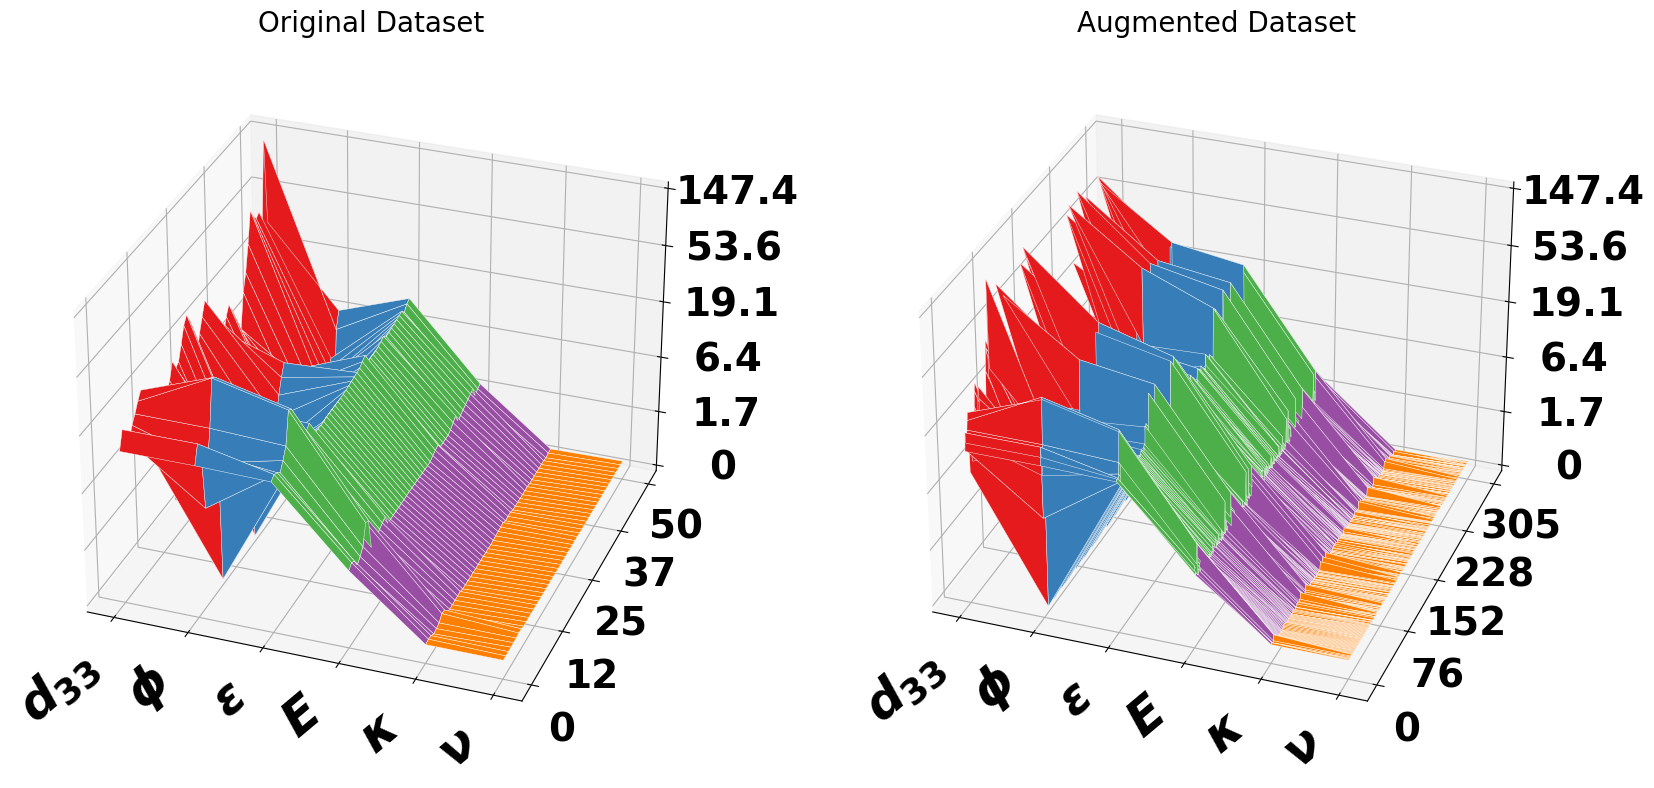

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter, LogFormatter
from matplotlib.ticker import FuncFormatter

# Replace with your actual data loading and preprocessing functions
raw_df = pd.read_csv("dopants_composition.csv").dropna()
original_df = calculate_composite_properties(raw_df, properties)
enhanced_df = add_advanced_features(original_df, properties)
final_df = augment_dataset(enhanced_df, COMPOSITE_FEATURES)

# Tag datasets
original_df = original_df.copy()
original_df['Source'] = 'Original'
augmented_df = final_df.copy()
augmented_df['Source'] = 'Augmented'

# Define feature names and LaTeX labels with units
features = [
    'd33', 
    'Dopants fr',
    'Effective Dielectric Constant', 
    'Effective Youngs Modulus',
    'Effective Thermal Conductivity', 
    'Effective Poissons Ratio',
]
# latex_labels = [
#     r'$d_{33}$ (pm/V)', 
#     r'$\phi$ (vol%)', 
#     r'$\varepsilon$ (F/m)', 
#     r'$E$ (GPa)', 
#     r'$\kappa$ (W/mK)', 
#     r'$\nu$'
# ]


latex_labels = [
    r'$d_{33}$', 
    r'$\phi$', 
    r'$\varepsilon$', 
    r'$E$ ', 
    r'$\kappa$', 
    r'$\nu$'
]

# Extract and transform data
orig_data = original_df[features].to_numpy()
aug_data = augmented_df[features].to_numpy()

# Apply log transformation
Z_orig = np.log1p(orig_data)
Z_aug = np.log1p(aug_data)

n_features = len(features)
n_orig = orig_data.shape[0]
n_aug = aug_data.shape[0]

# Color setup
feature_colors = sns.color_palette("Set1", n_features)
colors_rgba = [(*c, 1.0) for c in feature_colors]

def create_facecolors(X):
    n_rows, n_cols = X.shape
    facecolors = np.empty((n_rows, n_cols, 4))
    for j in range(n_cols):
        facecolors[:, j, :] = colors_rgba[j]
    return facecolors

# Create figure with improved layout
fig = plt.figure(figsize=(20, 10))
plt.rcParams.update({
    'font.size': 16,
    'font.weight': 'semibold',
    'axes.labelpad': 12
})

# Calculate unified z-limits
z_min = min(Z_orig.min(), Z_aug.min())
z_max = max(Z_orig.max(), Z_aug.max())

# # Create custom z-tick formatter
# class Log1pFormatter(LogFormatter):
#     def __call__(self, x, pos=None):
#         return f"{np.expm1(x):.1e}"



# Define a custom formatter function
def log1p_formatter(x, pos):
    """Format log1p-transformed values into human-readable numbers."""
    value = np.expm1(x)  # Reverse log1p
    
    # Handle zero values
    if np.isclose(value, 0.0, atol=1e-12):
        return "0"
    
    # Check if value is effectively an integer
    if np.isclose(value, round(value), atol=1e-6):
        return f"{round(value):,}"  # Format integers with commas
    else:
        return f"{value:,.1f}"  # Format decimals with 1 place


# ===== Original Data Plot =====
ax1 = fig.add_subplot(121, projection='3d')
X_orig = np.tile(np.arange(n_features), (n_orig, 1))
Y_orig = np.tile(np.arange(n_orig), (n_features, 1)).T

ax1.plot_surface(
    X_orig, Y_orig, Z_orig,
    rstride=1, cstride=1,
    facecolors=create_facecolors(X_orig),
    linewidth=0.3, edgecolor='w',
    antialiased=True, shade=False
)

# Axis configuration
ax1.set_title("Original Dataset", fontsize=20, pad=15)
ax1.set_xticks(np.arange(n_features))
ax1.set_xticklabels(latex_labels, fontsize=36, rotation=40, ha='right', va='top')
ax1.set_yticks(np.linspace(0, n_orig-1, 5))
ax1.set_yticklabels([f"{int(x):,}" for x in np.linspace(0, n_orig-1, 5)], fontsize=28)
ax1.tick_params(axis='y', pad=10)

ax1.set_zlim(z_min, z_max)

# Z-axis formatting
# ax1.zaxis.set_major_formatter(Log1pFormatter())
ax1.zaxis.set_major_formatter(FuncFormatter(log1p_formatter))
ax1.tick_params(axis='z', which='major', pad=25, labelsize=28)
ax1.view_init(elev=30, azim=-70)

# ===== Augmented Data Plot =====
ax2 = fig.add_subplot(122, projection='3d')
X_aug = np.tile(np.arange(n_features), (n_aug, 1))
Y_aug = np.tile(np.arange(n_aug), (n_features, 1)).T

ax2.plot_surface(
    X_aug, Y_aug, Z_aug,
    rstride=1, cstride=1,
    facecolors=create_facecolors(X_aug),
    linewidth=0.3, edgecolor='w',
    antialiased=True, shade=False
)

ax2.set_title("Augmented Dataset", fontsize=20, pad=15)
ax2.set_xticks(np.arange(n_features))
ax2.set_xticklabels(latex_labels, fontsize=36, rotation=40, ha='right', va='top')
ax2.set_yticks(np.linspace(0, n_aug-1, 5))
ax2.set_yticklabels([f"{int(x):,}" for x in np.linspace(0, n_aug-1, 5)], fontsize=28)
ax2.tick_params(axis='y', pad=10) 

ax2.set_zlim(z_min, z_max)

# Z-axis formatting
# ax2.zaxis.set_major_formatter(Log1pFormatter())
ax2.zaxis.set_major_formatter(FuncFormatter(log1p_formatter))
ax2.tick_params(axis='z', which='major', pad=25, labelsize=28)
ax2.view_init(elev=30, azim=-70)


plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.savefig("plots/org_aug.png", dpi=600, bbox_inches='tight')
plt.show()

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patheffects as pe
from matplotlib.lines import Line2D
from sklearn.preprocessing import StandardScaler
from sklearn.covariance import GraphicalLassoCV
from matplotlib.patches import Ellipse


def plot_physics_network(final_df, threshold_percentile=10, layout_scale=10):
    # === Configuration Constants ===
    NODE_CONFIG = {
        'target':    {'color': '#FFD700', 'size': 9000},
        'effective': {'color': '#8fbcd4', 'size_base': 6000},   # #36454F   #8fbcd4
        'other':     {'color': '#98FB98', 'size_base': 4000}
    }
    EDGE_CONFIG = {
        'd33':   {'width_scale': 12, 'alpha': 1},
        'other': {'width_scale': 6,  'alpha': 0.5}
    }
    TYPO = {
        'font_family':     'DejaVu Sans',
        'base_font_size':  40,
        'title_font_size': 36,
        'label_stroke':    pe.withStroke(linewidth=6, foreground='black')
    }

    # === Prepare Data ===
    model_groups = {
        'Yamada Model': ['Effective Dielectric Constant'],
        'Halpin-Tsai Model': ['Effective Youngs Modulus'],
        'Maxwell-Eucken': ['Effective Thermal Conductivity'],
        'Composite Properties': ['Effective Density', 'Effective Specific Heat Capacity'],
        'Interfacial Effects': ['Thermal_Electronic', 'Mech_Compat'],
        'Processing': ['Stiffness_Impact']
    }
    target = 'd33'
    features = [f for grp in model_groups.values() for f in grp] + [target]

    latex_labels = {
        'd33': r'$d_{33}$', 'Dopants fr': r'$φ$',
        'Effective Dielectric Constant': r'$\varepsilon$', 'Effective Youngs Modulus': r'$E$',
        'Effective Thermal Conductivity': r'$\kappa$', 'Thermal_Electronic': r'$\Gamma_{TE}$',
        'Mech_Compat': r'$\chi_{m}$', 'Effective Density': r'$\rho$',
        'Effective Specific Heat Capacity': r'$c_p$', 'Stiffness_Impact': r'$S_{m}$'
    }

    # Standardize data
    X = StandardScaler().fit_transform(final_df[features])

    # Estimate precision
    gl = GraphicalLassoCV()
    gl.fit(X)
    prec = gl.precision_

    # Threshold
    off_diag = np.abs(prec[np.triu_indices_from(prec, k=1)])
    thresh = np.percentile(off_diag, threshold_percentile)

    # === Build Graph ===
    G = nx.Graph()
    G.add_nodes_from(features)
    for i, u in enumerate(features):
        for j, v in enumerate(features[i+1:], start=i+1):
            w = prec[i, j]
            if abs(w) >= thresh:
                G.add_edge(u, v, weight=w)

    # Separate edges
    d33_edges = [(u, v, d) for u, v, d in G.edges(data=True) if target in (u, v)]
    other_edges = [(u, v, d) for u, v, d in G.edges(data=True) if target not in (u, v)]

    # === Node Colors & Sizes ===
    weights_to_target = {f: prec[i, features.index(target)] for i, f in enumerate(features) if f != target}
    max_w = max(abs(w) for w in weights_to_target.values()) if weights_to_target else 1

    colors, sizes = [], []
    for n in G.nodes():
        if n == target:
            colors.append(NODE_CONFIG['target']['color'])
            sizes.append(NODE_CONFIG['target']['size'])
        elif 'Effective' in n:
            colors.append(NODE_CONFIG['effective']['color'])
            sizes.append(NODE_CONFIG['effective']['size_base'] + (abs(weights_to_target.get(n, 0)) / max_w) * 12000)
        else:
            colors.append(NODE_CONFIG['other']['color'])
            sizes.append(NODE_CONFIG['other']['size_base']+ (abs(weights_to_target.get(n, 0)) / max_w) * 12000)

    # === Edge Colors & Widths ===
    cmap = plt.get_cmap('RdBu')
    if d33_edges:
        d33_w = [d['weight'] for *_, d in d33_edges]
        m = max(abs(min(d33_w)), abs(max(d33_w)))
        norm = mcolors.Normalize(vmin=-m, vmax=m)
        d33_edge_colors = [cmap(norm(w)) for w in d33_w]

    # === Radial Layout ===
    pos = {target: np.array([0.0, 0.0])}
    others = [n for n in G.nodes() if n != target]
    num = len(others)
    angle_step = 2 * np.pi / num if num else 0
    radius = layout_scale
    for i, n in enumerate(others):
        angle = i * angle_step
        pos[n] = np.array([0.1*radius * np.cos(angle), 0.1*radius * np.sin(angle)])

    # === Plotting ===
    plt.style.use('seaborn-white')
    fig, ax = plt.subplots(figsize=(12, 9), facecolor='#FAFAFA')
    ax.set_facecolor('#FAFAFA')

    # Draw edges
    nx.draw_networkx_edges(
        G, pos, edgelist=other_edges,
        edge_color='#666666',
        width=[abs(d['weight']) * EDGE_CONFIG['other']['width_scale'] for *_, d in other_edges],
        style=['solid' if d['weight'] > 0 else 'dotted' for *_, d in other_edges],
        alpha=EDGE_CONFIG['other']['alpha']
    )
    if d33_edges:
        nx.draw_networkx_edges(
            G, pos, edgelist=d33_edges,
            edge_color=d33_edge_colors,
            width=[abs(d['weight']) * EDGE_CONFIG['d33']['width_scale'] for *_, d in d33_edges],
            alpha=EDGE_CONFIG['d33']['alpha']
        )

    # Draw nodes
    nx.draw_networkx_nodes(
        G, pos,
        node_size=sizes,
        node_color=colors,
        edgecolors='#333333',
        linewidths=3,
        alpha=0.97
    )




#     for idx, n in enumerate(G.nodes()):
#         x, y = pos[n]
#         width = sizes[idx] / 1200  # Adjust as needed
#         height = sizes[idx] / 2400  # Height is smaller to create oval
#         ellipse = Ellipse(
#             (x, y),
#             width=width,
#             height=height,
#             edgecolor='#333333',
#             facecolor=colors[idx],
#             linewidth=3,
#             alpha=0.97
#         )
#         ax.add_patch(ellipse)
    
    

    # Draw labels
    for idx, n in enumerate(G.nodes()):
        x, y = pos[n]
        fsize = TYPO['base_font_size'] + sizes[idx] / 500
        label_color = (
            'red' if 'Effective' in n else
            'white' if n == target else
            'blue'
        )
        ax.text(
            x, y, latex_labels.get(n, n),
            fontsize=fsize,
            fontfamily=TYPO['font_family'],
            fontweight='bold',
            color=label_color,
            ha='center', va='center',
            path_effects=[TYPO['label_stroke']]
        )


    # Colorbar (horizontal, bottom)
    if d33_edges:
        cax = fig.add_axes([0.05, 0.05, 0.4, 0.03])
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array(d33_w)
        cbar = fig.colorbar(sm, cax=cax, orientation='horizontal')
        cbar.set_label(
            'Associated Strength with $d_{33}$',
            fontsize=28, labelpad=-80, fontweight = 'bold'
        )
        cbar.ax.tick_params(
            labelsize=28,
            size=0
        )
        cbar.outline.set_visible(False)

    # Legend
    legend_elems = [
#         Line2D([0], [0], marker='o', color='w', label='$d_{33}$',
#                markersize=28, markerfacecolor=NODE_CONFIG['target']['color'], markeredgewidth=3),
        Line2D([0], [0], marker='o', color='w', label='$F_{P}$',
               markersize=28, markerfacecolor=NODE_CONFIG['effective']['color'], markeredgewidth=3),
        Line2D([0], [0], marker='o', color='w', label='$F_{\zeta}$',
               markersize=28, markerfacecolor=NODE_CONFIG['other']['color'], markeredgewidth=3)
    ]
    ax.legend(
        handles=legend_elems,
        loc='upper right',
        bbox_to_anchor=(1.0, 0.16),
#         title='Node Categories',
        title_fontsize=26,
        fontsize=40,
        frameon=True,
        framealpha=0.4,
        edgecolor='#333333'
    )

    # Title
#     ax.set_title(
# #         f'Multiphysics Feature Interaction Network\n(Threshold ≥ {thresh:.3f}, {threshold_percentile}th percentile)',
#         fontsize=TYPO['title_font_size'], fontweight='bold', pad=30, color='#2a2a2a'
#     )
    ax.axis('off')
    plt.tight_layout()
    plt.savefig("plots/network.png", dpi=600, bbox_inches='tight')

    plt.show()

# Example usage:
plot_physics_network(final_df, threshold_percentile=10,layout_scale=1)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# -----------------------------------------------------------------------------
# Enhanced Visualization Settings
# -----------------------------------------------------------------------------
plt.style.use('seaborn-paper')
sns.set_palette("colorblind")
plt.rcParams.update({
    'font.size': 10,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'font.family': 'DejaVu Sans',
    'figure.dpi': 300,
    'figure.autolayout': True
})

# -----------------------------------------------------------------------------
# Physics-Model Aware Visualization Functions
# -----------------------------------------------------------------------------

def plot_physics_model_comparisons(original_df, final_df):
    """Compare original vs augmented data distributions with physics model annotations"""
    fig, axs = plt.subplots(2, 3, figsize=(15, 10))
    
    # Yamada Model: Dielectric Constant
    sns.kdeplot(original_df['Effective Dielectric Constant'], ax=axs[0,0], 
                label='Original', fill=True, linewidth=2)
    sns.kdeplot(final_df['Effective Dielectric Constant'], ax=axs[0,0], 
                label='Augmented', fill=True, linewidth=2)
    axs[0,0].set_title('Dielectric Constant\n(Yamada Model)')
    axs[0,0].set_xlabel('Effective Dielectric Constant')
    
    # Halpin-Tsai Model: Young's Modulus
    sns.kdeplot(original_df['Effective Youngs Modulus'], ax=axs[0,1], 
                label='Original', fill=True)
    sns.kdeplot(final_df['Effective Youngs Modulus'], ax=axs[0,1], 
                label='Augmented', fill=True)
    axs[0,1].set_title("Young's Modulus\n(Halpin-Tsai Model)")
    axs[0,1].set_xlabel('Effective Youngs Modulus (GPa)')
    
    # Maxwell-Eucken Model: Thermal Conductivity
    sns.kdeplot(original_df['Effective Thermal Conductivity'], ax=axs[0,2], 
                label='Original', fill=True)
    sns.kdeplot(final_df['Effective Thermal Conductivity'], ax=axs[0,2], 
                label='Augmented', fill=True)
    axs[0,2].set_title('Thermal Conductivity\n(Maxwell-Eucken Model)')
    axs[0,2].set_xlabel('Effective Thermal Conductivity (W/mK)')
    
    # Modified ROM: Poisson's Ratio
    sns.kdeplot(original_df['Effective Poissons Ratio'], ax=axs[1,0], 
                label='Original', fill=True)
    sns.kdeplot(final_df['Effective Poissons Ratio'], ax=axs[1,0], 
                label='Augmented', fill=True)
    axs[1,0].set_title("Poisson's Ratio\n(Modified ROM)")
    axs[1,0].set_xlabel('Effective Poissons Ratio')
    
    # Interfacial Enhancement: d33 Distribution
    sns.kdeplot(original_df['d33'], ax=axs[1,1], label='Original', fill=True)
    sns.kdeplot(final_df['d33'], ax=axs[1,1], label='Augmented', fill=True)
    axs[1,1].set_title('Piezoelectric Coefficient\n(Interfacial Enhanced d33)')
    axs[1,1].set_xlabel('d33 (pC/N)')
    
    # Dopant Fraction Distribution
    sns.kdeplot(original_df['Dopants fr'], ax=axs[1,2], label='Original', fill=True)
    sns.kdeplot(final_df['Dopants fr'], ax=axs[1,2], label='Augmented', fill=True)
    axs[1,2].set_title('Dopant Fraction Distribution')
    axs[1,2].set_xlabel('Dopant Fraction (%)')
    
    plt.tight_layout()
    plt.savefig('physics_model_comparisons.pdf', bbox_inches='tight')
    plt.show()

def plot_enhanced_3d_interaction(final_df):
    """3D plot with physics model annotations and augmented data visualization"""
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    sc = ax.scatter(
        final_df['Effective Dielectric Constant'],
        final_df['Effective Youngs Modulus'],
        final_df['d33'],
        c=final_df['Dopants fr'],
        cmap='viridis',
        s=50*(final_df['Stiffness_Impact']/final_df['Stiffness_Impact'].max()),
        edgecolor='k',
        linewidth=0.5,
        alpha=0.8
    )
    
    ax.set_xlabel('Dielectric Constant\n(Yamada Model)', linespacing=1.5)
    ax.set_ylabel("Young's Modulus\n(Halpin-Tsai Model)", linespacing=1.5)
    ax.set_zlabel('d33 (pC/N)\n(Interfacial Enhanced)', linespacing=1.5)
    
    cbar = fig.colorbar(sc, pad=0.1)
    cbar.set_label('Dopant Fraction (%)', rotation=270, labelpad=15)
    
    # Add size legend for Stiffness Impact
    handles = [
        plt.Line2D([0], [0], marker='o', color='w', 
                  markersize=np.sqrt(50*s), 
                  markerfacecolor='gray', alpha=0.6)
        for s in [0.2, 0.5, 0.8]
    ]
    labels = ['Low', 'Medium', 'High']
    ax.legend(handles, labels, title='Stiffness Impact', 
             bbox_to_anchor=(1.15, 0.8))
    
    plt.title('3D Feature Space: Physics Model Interactions\n(Color: Dopant Fraction, Size: Stiffness Impact)')
    plt.savefig('enhanced_3d_interaction.pdf', bbox_inches='tight')
    plt.show()

def plot_physics_correlations(final_df):
    """Enhanced correlation matrix with physics model groupings"""
    # Group features by physics model
    model_groups = {
        'Yamada Model': ['Effective Dielectric Constant'],
        'Halpin-Tsai Model': ['Effective Youngs Modulus'],
        'Maxwell-Eucken': ['Effective Thermal Conductivity'],
        'Composite Properties': ['Effective Density', 'Effective Specific Heat Capacity'],
        'Interfacial Effects': ['d33', 'Thermal_Electronic', 'Mech_Compat'],
        'Processing': ['Dopants fr', 'Stiffness_Impact']
    }
    
    # Create ordered feature list
    ordered_features = []
    for group in model_groups.values():
        ordered_features += group
        
    # Calculate correlations
    corr_matrix = final_df[ordered_features].corr()
    
    # Create annotation mask
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', center=0,
                annot=True, fmt=".2f", linewidths=0.5,
                cbar_kws={'label': 'Correlation Coefficient'})
    
    # Add physics model annotations
    ypos = -0.5
    for group_name, features in model_groups.items():
        xpos = ordered_features.index(features[0])
        plt.text(xpos, ypos, group_name, rotation=45,
                ha='left', va='center', fontsize=12, color='darkblue')
        ypos -= 0.8
    
    plt.title('Physics-Aware Feature Correlation Matrix')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.savefig('physics_correlation_matrix.pdf', bbox_inches='tight')
    plt.show()

# -----------------------------------------------------------------------------
# Main Visualization Pipeline
# -----------------------------------------------------------------------------
if __name__ == "__main__":
    # Load and process data
    raw_df = pd.read_csv("dopants_composition.csv").dropna()
    
    # Feature engineering
    original_df = calculate_composite_properties(raw_df, properties)
    enhanced_df = add_advanced_features(original_df, properties)
    final_df = augment_dataset(enhanced_df, COMPOSITE_FEATURES)
    
    # Generate plots
    plot_physics_model_comparisons(original_df, final_df)
    plot_enhanced_3d_interaction(final_df)
    plot_physics_correlations(final_df)

In [ ]:

# -*- coding: utf-8 -*-
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
import random
import os# -*- coding: utf-8 -*-
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score

###############################################################################
# 3) Hybrid Neural Network for d33 Prediction (PyTorch)
###############################################################################
class PhysicsConstrainedNN(nn.Module):
    def __init__(self, input_dim, feature_indices, properties):
        super(PhysicsConstrainedNN, self).__init__()
        self.feature_indices = feature_indices
        self.properties = properties
        self.base_d33_pvdf = abs(properties['PVDF']['Piezoelectric Coefficient (d33)'])
        
        # Enhanced network architecture
        self.dense = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.GELU(),
            nn.LayerNorm(256),
            nn.Dropout(0.4),
            nn.Linear(256, 128),
            nn.GELU(),
            nn.LayerNorm(128),
            nn.Dropout(0.3)
        )
                
        # Attention mechanism
        self.attention = nn.MultiheadAttention(embed_dim=128, num_heads=4)
        
        # Enhanced piezoelectric branch
        self.piezo_branch = nn.Sequential(
            nn.Linear(2, 64),
            nn.SiLU(),
            nn.Linear(64, 32)
        )
        
        # Physics-guided residual connections
        self.res_layer = nn.Sequential(
            nn.Linear(128 + 32, 128+32),
            nn.GELU()
        )
        
        # Output layer
        self.output = nn.Linear(128+32, 1)

    def forward(self, x):
        # Extract piezoelectric features
        piezo_feats = x[:, [
            self.feature_indices['Dopant_Piezoelectric Coefficient (d33)'],
            self.feature_indices['Stiffness_Impact']
        ]]
        
        # Main network with attention
        x_main = self.dense(x)
        x_main = x_main.unsqueeze(0)  # Add sequence dimension for attention
        x_attn, _ = self.attention(x_main, x_main, x_main)
        x_main = x_main + x_attn  # Residual connection
        x_main = x_main.squeeze(0)
        
        # Piezoelectric branch processing
        x_piezo = self.piezo_branch(piezo_feats)
        
        # Combine and residual
        x_combined = torch.cat([x_main, x_piezo], dim=1)
        x_res = self.res_layer(x_combined)
        return self.output(x_combined + x_res)  # Final output

    def physics_loss(self, inputs, outputs):
        inputs_np = inputs.detach().numpy()
        outputs_np = outputs.detach().numpy()
        
        # Volume fraction (Dopants fr, given in %)
        vol_frac = inputs_np[:, self.feature_indices['Dopants fr']] / 100
        phi_m = 1 - vol_frac  # PVDF matrix volume fraction
        phi_f = vol_frac      # Dopant volume fraction
        
        # Dielectric constraint using Yamada model
        eps_pvdf = self.properties['PVDF']['Dielectric Constant']
        eps_dopant = inputs_np[:, self.feature_indices['Effective Dielectric Constant']]
        pred_eps = yamada_dielectric(eps_pvdf, eps_dopant, vol_frac)
        dielectric_loss = torch.mean((inputs[:, self.feature_indices['Effective Dielectric Constant']] - 
                                        torch.tensor(pred_eps, dtype=torch.float32))**2) * 0.1
        
        # D33 baseline constraint with interfacial enhancement
        # d33^m (matrix PVDF coefficient) is negative by convention (e.g., -25 pC/N)
        gamma = 0.5  # Empirical interfacial coupling constant
        # eps_dopant is used as eps_f
        eps_f = eps_dopant  
        # Compute base d33 using the integrated formula:
        # d33_eff = phi_m*d33^m + phi_f*d33^f + gamma*(phi_f*(eps_f-eps_m)/(eps_f+2*eps_m))*d33^m
        base_d33 = (phi_m * (-self.base_d33_pvdf) + 
                    phi_f * inputs_np[:, self.feature_indices['Dopant_Piezoelectric Coefficient (d33)']] +
                    gamma * (phi_f * (eps_f - eps_pvdf) / (eps_f + 2 * eps_pvdf)) * (-self.base_d33_pvdf))
        # Convert to tensor for loss computation
        base_d33_tensor = torch.tensor(base_d33, dtype=torch.float32, device=outputs.device)
        d33_loss = torch.mean((outputs - base_d33_tensor)**2) * 0.3
        
        # Mechanical compatibility
        youngs_pvdf = self.properties['PVDF']["Youngs Modulus"]
        mech_ratio = inputs[:, self.feature_indices['Mech_Compat']]
        mech_loss = torch.mean((mech_ratio - 1.0)**2) * 0.2
        
        # Thermal-electronic coupling
        k_pvdf = self.properties['PVDF']['Thermal Conductivity']
        thermal_electronic = inputs[:, self.feature_indices['Thermal_Electronic']]
        coupling_loss = torch.mean((thermal_electronic - (eps_pvdf * k_pvdf))**2) * 0.15
        
        # Fabrication method constraint
        fabrication_mask = torch.stack([
            inputs[:, idx] for idx in [
                v for k, v in self.feature_indices.items() 
                if 'Fabrication Method' in k
            ]
        ], dim=1)
        fab_boost = 1 + fabrication_mask.max(dim=1)[0]
        fab_loss = torch.mean((outputs * fab_boost - outputs)**2) * 0.1

        return dielectric_loss + d33_loss + mech_loss + coupling_loss + fab_loss

class CompositeDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]


# Okish Training Model

In [1]:
#!/usr/bin/env python3
"""
train_residual_monotonic_furukawa_margin_improved_with_plots.py
Enhanced training script (fixed + plotting + publication-ready parity plots):
- Cosine annealing with warmup
- Mixed precision training
- Gradient accumulation
- EMA (Exponential Moving Average) with shadow saved
- Better initialization
- Enhanced data augmentation
- Improved regularization
- Better loss scheduling
- Vectorized Fourier features (freqs as buffer)
- Learning-curve plot (training + validation)
- Publication-ready parity plot (bold + larger fonts + bold ticks)
- Print training metrics/status every N epochs (configurable via CFG['print_every'])
"""
import os, math, random, json, importlib.util
from copy import deepcopy
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_absolute_error, r2_score
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch.cuda.amp import GradScaler, autocast
from tqdm import tqdm

# ---------------- CONFIG ----------------
CFG = {
    "csv_path": "dopants_composition.csv",
    "device": "cuda" if torch.cuda.is_available() else "cpu",
    "seeds": [42,150,220],
    "use_kfold": False,
    "kfold_splits": 5,
    "batch_size": 16,
    "accumulation_steps": 2,
    "num_epochs": 500,
    "fine_tune_epochs": 100,
    "lr": 5e-4,
    "warmup_epochs": 10,
    "fine_tune_lr": 1e-5,
    "weight_decay": 1e-4,
    "augmentation_factor": 3,
    "original_repeat": 3,
    "phys_resid_weight_init": 0.01,
    "phys_resid_weight_max": 0.20,
    "phys_anneal_epochs": 100,
    "early_stop_patience": 50,
    "dropout": 0.25,
    "emb_dim": 64,
    "reduce_lr_patience": 15,
    "reduce_lr_factor": 0.7,
    "small_sample_weight": 0.2,
    "target_clip_lower_pct": 0.5,
    "target_clip_upper_pct": 99.5,
    "max_grad_norm": 2.0,
    "save_path": "best_phys_resid_monotonic_improved_v2.pt",
    "monotonic_weight": 1.5,
    "monotonic_margin": 0.01,
    "phys_consistency_weight": 3.0,
    "phys_consistency_tol": 0.5,
    "learned_anchor_weight": 0.8,
    "penalize_negative_learned": True,
    "neg_learn_penalty": 5.0,
    "USE_LEARNED_D33": True,
    "USE_NUCLEATION": False,
    "fraction_weight": 1.0,
    "enforce_base_when_beta_gt_method_ref": True,
    "method_beta_ref_map": {
        "Electrospinning": 0.5496,
        "Solution casting": 0.5,
        "Poling": 0.5,
        "Sol-gel": 0.5,
        "default": 0.5
    },
    "beta_margin_scale": 200.0,
    "min_increase_when_beta_gt": 0.5,
    "beta_enforce_weight": 20.0,
    "use_ema": True,
    "ema_decay": 0.999,
    "use_mixup": True,
    "mixup_alpha": 0.2,
    "mixup_prob": 0.5,
    "label_smoothing": 0.05,
    "use_cosine_annealing": True,
    "min_lr": 1e-7,
    "num_workers": 4,
    "pin_memory": True,
    "print_every": 20  # print training/validation status every N epochs
}

pvdf_baseline_by_method = {
    "Electrospinning": 18.0,
    "Solution casting": 6.0,
    "Poling": 6.0,
    "Sol-gel": 6.0
}

# ---------------- Load properties dict ----------------
def load_properties():
    if os.path.exists('materials_properties.py'):
        spec = importlib.util.spec_from_file_location("materials_properties", "materials_properties.py")
        mod = importlib.util.module_from_spec(spec)
        spec.loader.exec_module(mod)
        if hasattr(mod, 'properties'):
            return mod.properties
        raise RuntimeError("materials_properties.py found but contains no `properties` dict.")
    if os.path.exists('properties.json'):
        with open('properties.json','r') as f:
            props = json.load(f)
        if isinstance(props, dict):
            return props
    raise FileNotFoundError("Please provide materials_properties.py or properties.json with `properties` dict.")

properties = load_properties()
pvdf_beta_ref = float(properties['PVDF'].get('Beta', 0.5496))
pvdf_baseline_default = float(properties['PVDF'].get('Piezoelectric Coefficient (d33)', 6.0))

# ---------------- Composite helpers ----------------
def composite_property(a, b, frac):
    return a * (1 - frac) + b * frac

def yamada_dielectric(epsilon_pvdf, epsilon_dopant, vol_frac):
    num = 1 + 3 * vol_frac * (epsilon_dopant - epsilon_pvdf)
    den = 3 * epsilon_pvdf + (epsilon_dopant - epsilon_pvdf) * (1 - vol_frac) + 1e-9
    return epsilon_pvdf * (num / den)

def maxwell_eucken(k_pvdf, k_dopant, vol_frac):
    den = (2 * k_pvdf + k_dopant - vol_frac * (k_dopant - k_pvdf) + 1e-9)
    return k_pvdf * (2 * k_pvdf + k_dopant + 2 * vol_frac * (k_dopant - k_pvdf)) / den

def halpin_tsai(E_pvdf, E_dopant, vol_frac, aspect_ratio=1):
    ratio = (E_dopant / (E_pvdf + 1e-12))
    eta = (ratio - 1) / (ratio + aspect_ratio + 1e-9)
    den = (1 - eta * vol_frac + 1e-9)
    return E_pvdf * (1 + aspect_ratio * eta * vol_frac) / den

def modified_rom(nu_pvdf, nu_dopant, vol_frac):
    return 0.9 * (nu_pvdf * (1 - vol_frac) + nu_dopant * vol_frac)

def estimate_sample_beta(dopant, vol_frac_pct):
    beta0 = pvdf_beta_ref
    try:
        if dopant in properties and 'Beta_at_1p5pct' in properties[dopant]:
            beta_1p5 = float(properties[dopant]['Beta_at_1p5pct'])
            if vol_frac_pct <= 0:
                return beta0
            scale = vol_frac_pct / 1.5
            est = beta0 + scale * (beta_1p5 - beta0)
            lo = min(beta0, beta_1p5) - 0.05
            hi = max(beta0, beta_1p5) + 0.05
            return float(np.clip(est, lo, hi))
    except Exception:
        pass
    return beta0

def calculate_composite_properties(df):
    df = df.copy()
    method_map = CFG.get('method_beta_ref_map', {})
    for idx, row in df.iterrows():
        dopant = row['Dopants']
        vol_frac = float(row['Dopants fr'])/100.0
        eps_pvdf = properties['PVDF'].get('Dielectric Constant', 10.0)
        eps_dopant = properties.get(dopant, {}).get('Dielectric Constant', eps_pvdf)
        df.at[idx, 'Effective Dielectric Constant'] = yamada_dielectric(eps_pvdf, eps_dopant, vol_frac)
        k_pvdf = properties['PVDF'].get('Thermal Conductivity', 0.2)
        k_dopant = properties.get(dopant, {}).get('Thermal Conductivity', k_pvdf)
        df.at[idx, 'Effective Thermal Conductivity'] = maxwell_eucken(k_pvdf, k_dopant, vol_frac)
        E_pvdf = properties['PVDF'].get("Youngs Modulus", 2e9)
        E_dopant = properties.get(dopant, {}).get('Youngs Modulus', E_pvdf)
        aspect = 10 if dopant in ['CNT','GO','G','Nfs','MXenes'] else 1
        df.at[idx, "Effective Youngs Modulus"] = halpin_tsai(E_pvdf, E_dopant, vol_frac, aspect)
        nu_pvdf = properties['PVDF'].get("Poissons Ratio", 0.3)
        nu_dopant = properties.get(dopant, {}).get('Poissons Ratio', nu_pvdf)
        df.at[idx, "Effective Poissons Ratio"] = modified_rom(nu_pvdf, nu_dopant, vol_frac)
        rho_pvdf = properties['PVDF'].get("Density", 1780.0)
        rho_dopant = properties.get(dopant, {}).get('Density', rho_pvdf)
        df.at[idx, "Effective Density"] = composite_property(rho_pvdf, rho_dopant, vol_frac)
        sp_heat_pvdf = properties['PVDF'].get("Specific Heat Capacity", 1000.0)
        sp_heat_dopant = properties.get(dopant, {}).get('Specific Heat Capacity', sp_heat_pvdf)
        df.at[idx, "Effective Specific Heat Capacity"] = composite_property(sp_heat_pvdf, sp_heat_dopant, vol_frac)
        df.at[idx, "PVDF_Beta_Fraction"] = estimate_sample_beta(dopant, float(row['Dopants fr']))
        method = row.get('Fabrication Method', None)
        method_key = method if pd.notna(method) and method is not None else 'default'
        method_ref = method_map.get(method_key, method_map.get('default', pvdf_beta_ref))
        df.at[idx, 'PVDF_Beta_Method_Ref'] = float(method_ref)
        df.at[idx, 'PVDF_Beta_HigherThanMethodRef'] = float(df.at[idx, "PVDF_Beta_Fraction"] > method_ref)
    return df

def add_advanced_features(df, fraction_weight=1.0):
    df = df.copy()
    df['Dopant_Piezoelectric Coefficient (d33)'] = df['Dopants'].apply(lambda x: properties.get(x, {}).get('Piezoelectric Coefficient (d33)', 0.0))
    df['Dopant_Dielectric Constant'] = df['Dopants'].apply(lambda x: properties.get(x, {}).get('Dielectric Constant', properties['PVDF'].get('Dielectric Constant', 10.0)))
    df['Dopant_Youngs Modulus'] = df['Dopants'].apply(lambda x: properties.get(x, {}).get('Youngs Modulus', properties['PVDF'].get('Youngs Modulus', 2e9)))
    df['Thermal_Electronic'] = df['Effective Thermal Conductivity'] * df['Effective Dielectric Constant']
    df['Mech_Compat'] = df["Effective Youngs Modulus"] / properties['PVDF'].get("Youngs Modulus", 2e9)
    df['Dopants fr'] = df['Dopants fr'].astype(float) * float(fraction_weight)
    df['Stiffness_Impact'] = df['Dopants fr'] * df["Dopant_Youngs Modulus"]
    df['PZT_Interaction'] = df.apply(lambda x: x['Dopant_Piezoelectric Coefficient (d33)'] * x['Dopants fr'] if x['Dopants'] == 'PZT' else 0.0, axis=1)
    df['GO_Interaction'] = df.apply(lambda x: x['Dopant_Dielectric Constant'] * x['Dopants fr'] if x['Dopants'] == 'GO' else 0.0, axis=1)
    df['BaTiO3_Interaction'] = df.apply(lambda x: x['Dopant_Piezoelectric Coefficient (d33)'] * x['Dopants fr'] if x['Dopants'] == 'BaTiO3' else 0.0, axis=1)
    def pvdf_base_for_row(r):
        meth = r.get('Fabrication Method', None)
        if pd.isna(meth) or meth is None:
            return pvdf_baseline_default
        return pvdf_baseline_by_method.get(meth, pvdf_baseline_default)
    df['PVDF_d33_baseline'] = df.apply(pvdf_base_for_row, axis=1).astype(float)
    df['Filler_Category'] = df['Dopants'].apply(lambda x: properties.get(x, {}).get('Filler_Category', 'Unknown'))
    if 'PVDF_Beta_Method_Ref' not in df.columns or 'PVDF_Beta_HigherThanMethodRef' not in df.columns:
        df = calculate_composite_properties(df)
    return df

# ---------------- Dataset & Model ----------------
class CompositeDataset(Dataset):
    def __init__(self, X_pre, X_orig_numeric, dop_idx, cat_idx, y):
        self.X = X_pre.astype(np.float32)
        self.X_orig = X_orig_numeric.astype(np.float32)
        self.dop_idx = np.array(dop_idx, dtype=np.int64)
        self.cat_idx = np.array(cat_idx, dtype=np.int64)
        self.y = y.astype(np.float32)
    def __len__(self): return len(self.X)
    def __getitem__(self, idx):
        return (torch.from_numpy(self.X[idx]).clone(),
                torch.from_numpy(self.X_orig[idx]).clone(),
                torch.tensor(self.dop_idx[idx], dtype=torch.long),
                torch.tensor(self.cat_idx[idx], dtype=torch.long),
                torch.tensor(self.y[idx], dtype=torch.float32))

class EnhancedAttention(nn.Module):
    def __init__(self, dim, num_heads=4):
        super().__init__()
        self.num_heads = num_heads
        self.head_dim = dim // num_heads
        assert dim % num_heads == 0
        self.qkv = nn.Linear(dim, dim * 3)
        self.proj = nn.Linear(dim, dim)
        self.scale = self.head_dim ** -0.5
    def forward(self, x):
        B, N, C = x.shape
        qkv = self.qkv(x).reshape(B, N, 3, self.num_heads, self.head_dim).permute(2, 0, 3, 1, 4)
        q, k, v = qkv[0], qkv[1], qkv[2]
        attn = (q @ k.transpose(-2, -1)) * self.scale
        attn = attn.softmax(dim=-1)
        x = (attn @ v).transpose(1, 2).reshape(B, N, C)
        x = self.proj(x)
        return x

class ResidualBlock(nn.Module):
    def __init__(self, dim, dropout=0.1):
        super().__init__()
        self.fc1 = nn.Linear(dim, dim)
        self.fc2 = nn.Linear(dim, dim)
        self.norm1 = nn.LayerNorm(dim)
        self.norm2 = nn.LayerNorm(dim)
        self.dropout = nn.Dropout(dropout)
        self.activation = nn.GELU()
    def forward(self, x):
        residual = x
        x = self.norm1(x)
        x = self.activation(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.dropout(x)
        return self.norm2(x + residual)

class PhysicsConstrainedNN(nn.Module):
    def __init__(self, input_dim, numeric_cols, feature_indices, properties, num_dopants, emb_dim=64, dropout=0.2, use_learned_d33=True):
        super().__init__()
        self.feature_indices = dict(feature_indices)
        self.numeric_cols = list(numeric_cols)
        self.numeric_idx = {name:i for i,name in enumerate(self.numeric_cols)}
        self.properties = properties
        self.base_d33_pvdf = abs(properties['PVDF'].get('Piezoelectric Coefficient (d33)', pvdf_baseline_default))

        self.dopant_embedding = nn.Embedding(num_dopants, emb_dim)
        nn.init.normal_(self.dopant_embedding.weight, mean=0, std=0.02)

        self.use_learned_d33 = use_learned_d33
        if use_learned_d33:
            self.learned_d33 = nn.Embedding(num_dopants, 1)
            nn.init.xavier_uniform_(self.learned_d33.weight)
        else:
            self.learned_d33 = None

        # freqs as buffer
        freqs = torch.tensor([1,2,4,8,16,32,64], dtype=torch.float32)
        self.register_buffer('freqs', freqs)
        fourier_dim = len(self.freqs) * 2

        total_input_dim = input_dim + emb_dim + fourier_dim
        self.input_proj = nn.Linear(total_input_dim, 256)
        self.res_blocks = nn.ModuleList([ResidualBlock(256, dropout) for _ in range(3)])

        self.piezo_in_dim = 5
        self.piezo_branch = nn.Sequential(
            nn.Linear(self.piezo_in_dim, 128), nn.LayerNorm(128), nn.GELU(), nn.Dropout(dropout),
            nn.Linear(128, 128), nn.LayerNorm(128), nn.GELU()
        )

        self.attention = EnhancedAttention(128, num_heads=4)
        self.fusion = nn.Sequential(
            nn.Linear(256 + 128, 256), nn.LayerNorm(256), nn.GELU(), nn.Dropout(dropout),
            nn.Linear(256, 128), nn.LayerNorm(128), nn.GELU()
        )
        self.output = nn.Linear(128, 1)
        self._init_weights()

        self.register_buffer('y_mean', torch.tensor(0.0))
        self.register_buffer('y_std', torch.tensor(1.0))
    def _init_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.xavier_uniform_(m.weight)
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.LayerNorm):
                nn.init.constant_(m.bias, 0)
                nn.init.constant_(m.weight, 1.0)
    def set_target_scaler(self, mean, std, device='cpu'):
        self.y_mean = torch.tensor(float(mean), device=device)
        self.y_std = torch.tensor(float(std), device=device)
    def forward(self, x_std, X_orig_numeric, dop_idx):
        x = x_std.clone()
        fr_idx = int(self.numeric_idx['Dopants fr'])
        fr = x[:, fr_idx:fr_idx+1]
        device = x.device
        freqs = self.freqs.to(device)
        angles = 2.0 * math.pi * fr * freqs.unsqueeze(0)
        sins = torch.sin(angles)
        coss = torch.cos(angles)
        fourier = torch.cat([sins, coss], dim=1)

        emb = self.dopant_embedding(dop_idx)
        piezo_idxs = [
            int(self.numeric_idx['Dopant_Piezoelectric Coefficient (d33)']),
            int(self.numeric_idx['Stiffness_Impact']),
            int(self.numeric_idx['PZT_Interaction']),
            int(self.numeric_idx['GO_Interaction']),
            int(self.numeric_idx['BaTiO3_Interaction'])
        ]
        piezo_feats = x[:, piezo_idxs]
        x_in = torch.cat([x, emb, fourier], dim=1)
        x = self.input_proj(x_in)
        for block in self.res_blocks:
            x = block(x)
        h_piezo = self.piezo_branch(piezo_feats).unsqueeze(1)
        h_piezo = self.attention(h_piezo).squeeze(1)
        h_comb = torch.cat([x, h_piezo], dim=1)
        h_fused = self.fusion(h_comb)
        delta_scaled = self.output(h_fused).squeeze(1)
        if self.use_learned_d33 and (self.learned_d33 is not None):
            learned_raw = self.learned_d33(dop_idx).squeeze(1)
            learned_pos = F.softplus(learned_raw)
            delta_scaled = delta_scaled + learned_pos
        return delta_scaled
    def compute_base_d33_tensor(self, X_orig_numeric_tensor, use_nucleation=False):
        device = X_orig_numeric_tensor.device
        idx_vol = int(self.numeric_idx['Dopants fr'])
        vol_frac = X_orig_numeric_tensor[:, idx_vol] / (100.0 * CFG.get('fraction_weight', 1.0) + 1e-12)
        phi_m = 1.0 - vol_frac; phi_f = vol_frac
        d_dopant_input = X_orig_numeric_tensor[:, int(self.numeric_idx['Dopant_Piezoelectric Coefficient (d33)'])]
        if 'PVDF_d33_baseline' in self.numeric_idx:
            pvdf_baseline = X_orig_numeric_tensor[:, int(self.numeric_idx['PVDF_d33_baseline'])]
        else:
            pvdf_baseline = torch.full_like(phi_m, fill_value=float(self.base_d33_pvdf), device=device)
        if 'PVDF_Beta_Fraction' in self.numeric_idx:
            beta_vals = X_orig_numeric_tensor[:, int(self.numeric_idx['PVDF_Beta_Fraction'])]
            pvdf_baseline_scaled = pvdf_baseline * (beta_vals / (pvdf_beta_ref + 1e-12))
        else:
            pvdf_baseline_scaled = pvdf_baseline
        eps_f = X_orig_numeric_tensor[:, int(self.numeric_idx['Dopant_Dielectric Constant'])]
        eps_m = float(self.properties['PVDF'].get('Dielectric Constant', 10.0))
        L = 3.0 * eps_m / (eps_f + 2.0 * eps_m + 1e-9)
        L = torch.clamp(L, min=0.0, max=3.0)
        gamma = 0.5
        interfacial = gamma * (phi_f * (eps_f - eps_m) / (eps_f + 2.0 * eps_m + 1e-9)) * pvdf_baseline_scaled
        nucleation_term = torch.zeros_like(phi_f, device=device)
        filler_term = L * phi_f * d_dopant_input
        base_d33 = torch.abs(phi_m * pvdf_baseline_scaled + filler_term + interfacial + nucleation_term)
        base_scaled = (base_d33 - self.y_mean.to(device)) / (self.y_std.to(device) + 1e-9)
        return base_d33, base_scaled
    def scaled_to_orig(self, out_scaled):
        out_orig = out_scaled * self.y_std + self.y_mean
        return F.softplus(out_orig)

# ---------------- EMA ----------------
class EMA:
    def __init__(self, model, decay=0.999):
        self.model = model
        self.decay = decay
        self.shadow = {}
        self.backup = {}
        self.register()
    def register(self):
        for name, param in self.model.named_parameters():
            if param.requires_grad:
                self.shadow[name] = param.data.clone()
    def update(self):
        for name, param in self.model.named_parameters():
            if param.requires_grad:
                self.shadow[name] = self.decay * self.shadow[name] + (1 - self.decay) * param.data
    def apply_shadow(self):
        for name, param in self.model.named_parameters():
            if param.requires_grad:
                self.backup[name] = param.data.clone()
                param.data = self.shadow[name].clone()
    def restore(self):
        for name, param in self.model.named_parameters():
            if param.requires_grad and name in self.backup:
                param.data = self.backup[name].clone()
        self.backup = {}

# ---------------- Mixup ----------------
def mixup_data(x, y, alpha=0.2):
    if alpha > 0:
        lam = np.random.beta(alpha, alpha)
    else:
        lam = 1.0
    batch_size = x.size(0)
    index = torch.randperm(batch_size).to(x.device)
    mixed_x = lam * x + (1 - lam) * x[index]
    y_a, y_b = y, y[index]
    return mixed_x, y_a, y_b, lam

def mixup_criterion(criterion, pred, y_a, y_b, lam):
    return lam * criterion(pred, y_a) + (1 - lam) * criterion(pred, y_b)

# ---------------- Utilities & plotting ----------------
def set_seed(seed=42):
    torch.manual_seed(seed); np.random.seed(seed); random.seed(seed)
    if torch.cuda.is_available(): torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True; torch.backends.cudnn.benchmark = False
    os.environ['PYTHONHASHSEED'] = str(seed)

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

def plot_parity(true_vals, pred_vals, outpath='parity.png', title='Parity', fontsize=18):
    if len(true_vals) == 0: return
    r2 = r2_score(true_vals, pred_vals)
    plt.figure(figsize=(6,6))
    ax = plt.gca()
    # scatter with publication aesthetics
    plt.scatter(true_vals, pred_vals, alpha=0.8, s=60, edgecolors='k', linewidth=0.6)
    mn = min(min(true_vals), min(pred_vals)); mx = max(max(true_vals), max(pred_vals))
    pad = 0.04 * (mx - mn) if mx>mn else 0.1
    plt.plot([mn-pad,mx+pad],[mn-pad,mx+pad],'--',linewidth=2)
    # Labels bold & larger
    plt.xlabel('True d33 (pC/N)', fontsize=fontsize, fontweight='bold')
    plt.ylabel('Predicted d33 (pC/N)', fontsize=fontsize, fontweight='bold')
    plt.title(f'{title} (R² = {r2:.4f})', fontsize=fontsize+2, fontweight='bold')
    # Tick labels bold
    ax.tick_params(axis='both', which='major', labelsize=fontsize-4)
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontweight('bold')
    ax.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.savefig(outpath, dpi=300, bbox_inches='tight')
    plt.close()

def plot_learning_curve(train_losses, val_losses, outpath='learning_curve.png', fontsize=16):
    plt.figure(figsize=(8,6))
    ax = plt.gca()
    epochs = np.arange(1, len(train_losses)+1)
    plt.plot(epochs, train_losses, label='Train Loss', linewidth=2)
    plt.plot(epochs, val_losses, label='Val MAE', linewidth=2)
    plt.xlabel('Epoch', fontsize=fontsize, fontweight='bold')
    plt.ylabel('Loss / MAE', fontsize=fontsize, fontweight='bold')
    plt.title('Learning Curve', fontsize=fontsize+2, fontweight='bold')
    ax.legend(fontsize=fontsize-2)
    ax.tick_params(axis='both', which='major', labelsize=fontsize-4)
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontweight('bold')
    ax.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.savefig(outpath, dpi=300, bbox_inches='tight')
    plt.close()

# ---------------- Augmentation ----------------
def augment_raw_dataset(raw_df, augmentation_factor=1):
    if augmentation_factor <= 0: return raw_df.copy()
    synthetic = []
    all_fillers = [k for k in properties.keys() if k != 'PVDF']
    methods = list(pvdf_baseline_by_method.keys())

    for _ in range(augmentation_factor * len(raw_df)):
        base = raw_df.sample(1).iloc[0].copy()
        dopant = random.choice(all_fillers)
        base['Dopants'] = dopant

        if random.random() < 0.3 and 'Fabrication Method' in base:
            base['Fabrication Method'] = random.choice(methods)

        cat = properties.get(dopant, {}).get('Filler_Category', '')
        if cat in ['Carbonaceous/Conductive','2D Materials/MXenes']:
            max_frac = 1.5
        elif cat == 'Ferroelectric/Ceramic':
            max_frac = 40.0
        else:
            max_frac = 8.0

        if dopant not in ['PZT','GO','BaTiO3']:
            noise_level = 0.03
        else:
            noise_level = 0.015

        raw_frac = float(np.clip(
            base.get('Dopants fr', 0.0) * np.random.normal(1.0, noise_level),
            0.0, max_frac
        ))
        base['Dopants fr'] = raw_frac

        vol = raw_frac / 100.0
        d_pvdf = pvdf_baseline_by_method.get(base.get('Fabrication Method', None), pvdf_baseline_default)
        beta_est = estimate_sample_beta(dopant, raw_frac)
        d_pvdf_scaled = float(d_pvdf) * (beta_est / (pvdf_beta_ref + 1e-12))
        d_dopant = properties[dopant].get('Piezoelectric Coefficient (d33)', 0.0)

        eps_m = properties['PVDF'].get('Dielectric Constant', 10.0)
        eps_f = properties.get(dopant, {}).get('Dielectric Constant', eps_m)

        interfacial_term = 0.0
        if (eps_f + 2*eps_m) != 0:
            interfacial_term = 0.5 * (vol * (eps_f - eps_m) / (eps_f + 2*eps_m)) * d_pvdf_scaled

        nucleation_term = 0.0
        base_d33 = abs((1-vol)*d_pvdf_scaled + vol*d_dopant + interfacial_term + nucleation_term)

        noise_factor = np.random.normal(1.0, 0.08)
        base['d33'] = max(0.1, base_d33 * noise_factor)
        synthetic.append(base)

    return pd.concat([raw_df.reset_index(drop=True), pd.DataFrame(synthetic)], ignore_index=True)

# ---------------- Training Pipeline ----------------
def train_model(seed, cfg, raw_df, device):
    set_seed(seed)
    raw_df = raw_df.copy()
    print(f"train_model (seed {seed}): raw rows = {len(raw_df)}")

    # Augmentation + repeat
    if cfg['augmentation_factor'] > 0:
        df_aug_raw = augment_raw_dataset(raw_df, augmentation_factor=cfg['augmentation_factor'])
        df_orig_repeated = pd.concat([raw_df] * cfg['original_repeat'], ignore_index=True)
        raw_full = pd.concat([df_aug_raw, df_orig_repeated], ignore_index=True).reset_index(drop=True)
    else:
        raw_full = raw_df.copy().reset_index(drop=True)

    df_with_composite = calculate_composite_properties(raw_full.copy())
    df = add_advanced_features(df_with_composite, fraction_weight=cfg.get('fraction_weight', 1.0))
    df_orig_composite = calculate_composite_properties(raw_df.copy())
    df_orig = add_advanced_features(df_orig_composite, fraction_weight=cfg.get('fraction_weight', 1.0))

    # build dopant and filler indices (no walrus operator)
    dopants_list = sorted(list(set(df['Dopants'].values.tolist() + list(properties.keys())) - {'PVDF'}))
    dopant_to_idx = {d: i for i, d in enumerate(dopants_list)}
    df['dopant_idx'] = df['Dopants'].map(lambda x: dopant_to_idx.get(x, 0))
    df_orig['dopant_idx'] = df_orig['Dopants'].map(lambda x: dopant_to_idx.get(x, 0))

    cats = sorted({properties.get(k,{}).get('Filler_Category','Unknown') for k in properties.keys()} | set(df['Filler_Category'].unique()))
    filler_to_idx = {c:i for i,c in enumerate(cats)}
    df['filler_cat_idx'] = df['Filler_Category'].map(lambda x: filler_to_idx.get(x, filler_to_idx['Unknown']))
    df_orig['filler_cat_idx'] = df_orig['Filler_Category'].map(lambda x: filler_to_idx.get(x, filler_to_idx['Unknown']))

    numeric_cols = [
        'Effective Dielectric Constant',
        'Effective Thermal Conductivity',
        'Effective Youngs Modulus',
        'Effective Poissons Ratio',
        'Dopant_Piezoelectric Coefficient (d33)',
        'Dopant_Dielectric Constant',
        'Thermal_Electronic',
        'Mech_Compat',
        'Stiffness_Impact',
        'PZT_Interaction',
        'GO_Interaction',
        'BaTiO3_Interaction',
        'Dopants fr',
        'PVDF_d33_baseline',
        'PVDF_Beta_Fraction',
        'PVDF_Beta_Method_Ref',
        'PVDF_Beta_HigherThanMethodRef'
    ]

    base_features = numeric_cols.copy()
    if 'Fabrication Method' in df.columns:
        base_features += ['Fabrication Method']

    onehot_kwargs = {'sparse_output': False, 'handle_unknown': 'ignore'} if 'sparse_output' in OneHotEncoder().get_params() else {'sparse': False, 'handle_unknown': 'ignore'}

    if 'Fabrication Method' in df.columns:
        preprocessor = ColumnTransformer([
            ('num', StandardScaler(), numeric_cols),
            ('cat', OneHotEncoder(**onehot_kwargs), ['Fabrication Method'])
        ], remainder='drop')
    else:
        preprocessor = ColumnTransformer([('num', StandardScaler(), numeric_cols)], remainder='drop')

    X_pre = preprocessor.fit_transform(df[base_features])
    X_orig_numeric = df[numeric_cols].values.astype(float)
    X_pre_orig = preprocessor.transform(df_orig[base_features])
    X_orig_numeric_orig = df_orig[numeric_cols].values.astype(float)

    num_names = preprocessor.named_transformers_['num'].get_feature_names_out(numeric_cols).tolist()
    feature_indices = {name:i for i,name in enumerate(num_names)}

    y_all = df['d33'].values.astype(float)
    lowp = np.percentile(y_all, cfg['target_clip_lower_pct'])
    highp = np.percentile(y_all, cfg['target_clip_upper_pct'])
    y_clipped_all = np.clip(y_all, lowp, highp)

    stratify_col = df['dopant_idx'].values if len(np.unique(df['dopant_idx'])) > 1 else None
    X_train_pre, X_test_pre, X_train_orig, X_test_orig, dop_train, dop_test, cat_train, cat_test, y_train, y_test = train_test_split(
        X_pre, X_orig_numeric, df['dopant_idx'].values, df['filler_cat_idx'].values, y_clipped_all,
        test_size=0.15, random_state=seed, stratify=stratify_col
    )

    y_scaler = StandardScaler()
    y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1,1)).flatten()
    y_mean = float(y_scaler.mean_[0]); y_std = float(y_scaler.scale_[0])

    train_ds = CompositeDataset(X_train_pre, X_train_orig, dop_train, cat_train, y_train)
    test_ds = CompositeDataset(X_test_pre, X_test_orig, dop_test, cat_test, y_test)
    orig_ds = CompositeDataset(X_pre_orig, X_orig_numeric_orig, df_orig['dopant_idx'].values, df_orig['filler_cat_idx'].values, df_orig['d33'].values.astype(float))

    train_loader = DataLoader(train_ds, batch_size=cfg['batch_size'], shuffle=True, drop_last=True,
                              num_workers=cfg.get('num_workers', 0), pin_memory=cfg.get('pin_memory', False))
    test_loader = DataLoader(test_ds, batch_size=cfg['batch_size'], shuffle=False,
                             num_workers=max(0, cfg.get('num_workers', 0)), pin_memory=cfg.get('pin_memory', False))
    orig_loader = DataLoader(orig_ds, batch_size=cfg['batch_size'], shuffle=False,
                             num_workers=max(0, cfg.get('num_workers', 0)), pin_memory=cfg.get('pin_memory', False))

    small_sample_loader = DataLoader(orig_ds, batch_size=min(len(orig_ds), max(4, cfg['batch_size']//4)), shuffle=True,
                                     num_workers=0, pin_memory=False)

    device = torch.device(cfg['device'])
    input_dim = X_train_pre.shape[1]

    model = PhysicsConstrainedNN(
        input_dim=input_dim,
        numeric_cols=numeric_cols,
        feature_indices=feature_indices,
        properties=properties,
        num_dopants=len(dopant_to_idx),
        emb_dim=cfg['emb_dim'],
        dropout=cfg['dropout'],
        use_learned_d33=cfg.get('USE_LEARNED_D33', True)
    ).to(device)

    model.set_target_scaler(y_mean, y_std, device=device)

    # Initialize learned_d33
    learned_init_weight = None
    if cfg.get('USE_LEARNED_D33', True) and (model.learned_d33 is not None):
        init_vals = np.zeros((len(dopant_to_idx),1), dtype=float)
        min_pos = 1e-6
        for dname, idx in dopant_to_idx.items():
            raw_init = properties.get(dname, {}).get('Piezoelectric Coefficient (d33)', None)
            if raw_init is None:
                mask = (df['Dopants'] == dname)
                raw_init = float(df.loc[mask, 'd33'].mean()) if mask.any() else 0.0
            raw_init = 0.0 if raw_init is None or np.isnan(raw_init) else float(raw_init)
            subset = df.loc[df['Dopants'] == dname]
            rep_method = subset['Fabrication Method'].mode().iloc[0] if (not subset.empty and 'Fabrication Method' in subset.columns and subset['Fabrication Method'].mode().size>0) else 'Electrospinning'
            base_val = pvdf_baseline_by_method.get(rep_method, pvdf_baseline_default)
            desired_init_orig = max(raw_init - base_val, min_pos)
            scaled_init = y_scaler.transform(np.array([[desired_init_orig]]))[0,0]
            init_vals[idx,0] = float(scaled_init)
        with torch.no_grad():
            model.learned_d33.weight.data.copy_(torch.tensor(init_vals, dtype=torch.float32, device=model.learned_d33.weight.device))
        learned_init_weight = model.learned_d33.weight.detach().clone()

    optimizer = optim.AdamW(model.parameters(), lr=cfg['lr'], weight_decay=cfg['weight_decay'], betas=(0.9, 0.999))

    if cfg.get('use_cosine_annealing', True):
        scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=cfg['num_epochs'], eta_min=cfg.get('min_lr', 1e-7))
    else:
        scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=cfg['reduce_lr_factor'],
                                                         patience=cfg['reduce_lr_patience'], min_lr=cfg.get('min_lr', 1e-7))

    scaler = GradScaler() if device.type == 'cuda' else None

    ema = EMA(model, decay=cfg.get('ema_decay', 0.999)) if cfg.get('use_ema', True) else None

    mae_loss = nn.L1Loss()
    huber_loss = nn.HuberLoss(delta=2.0)
    mse_loss = nn.MSELoss()

    best_val_mae = float('inf')
    best_val_r2 = -float('inf')
    best_state = None
    patience_counter = 0
    train_losses = []
    val_losses = []

    beta_idx = numeric_cols.index('PVDF_Beta_Fraction')
    method_ref_idx = numeric_cols.index('PVDF_Beta_Method_Ref')
    beta_higher_idx = numeric_cols.index('PVDF_Beta_HigherThanMethodRef')

    def warmup_lr(epoch):
        if epoch <= cfg['warmup_epochs']:
            frac = epoch / max(1, cfg['warmup_epochs'])
            for g in optimizer.param_groups:
                g['lr'] = cfg['lr'] * float(frac if frac>0 else 1e-6)

    print_every = int(cfg.get('print_every', 20))

    for epoch in range(1, cfg['num_epochs']+1):
        model.train()
        warmup_lr(epoch)
        running_total = running_data = running_phys = running_mae = 0.0
        n_batches = 0

        frac_anneal = min(1.0, epoch / max(1, cfg['phys_anneal_epochs']))
        phys_w = cfg['phys_resid_weight_init'] * (1.0 - frac_anneal) + cfg['phys_resid_weight_max'] * frac_anneal

        optimizer.zero_grad()
        pbar = tqdm(enumerate(train_loader), total=len(train_loader), desc=f"Epoch {epoch}", leave=False)
        for batch_idx, (X_std_batch, X_orig_batch, dop_idx_batch, cat_idx_batch, y_batch) in pbar:
            X_std_batch = X_std_batch.to(device).float()
            X_orig_batch = X_orig_batch.to(device).float()
            dop_idx_batch = dop_idx_batch.to(device)
            y_batch = y_batch.to(device).float()

            # Mixup decision
            do_mixup = cfg.get('use_mixup', True) and (random.random() < cfg.get('mixup_prob', 0.5))
            if do_mixup:
                X_mixed, y_a, y_b, lam = mixup_data(X_std_batch, y_batch, cfg.get('mixup_alpha', 0.2))
                X_input = X_mixed
            else:
                X_input = X_std_batch

            with autocast(enabled=(scaler is not None)):
                delta_scaled = model(X_input, X_orig_batch, dop_idx_batch)
                base_d33_orig, base_scaled = model.compute_base_d33_tensor(X_orig_batch, use_nucleation=cfg.get('USE_NUCLEATION', False))
                out_scaled = base_scaled + delta_scaled
                out_pre_activation = out_scaled * model.y_std.to(device) + model.y_mean.to(device)

                # Clamp enforcement for beta > method ref
                if cfg.get('enforce_base_when_beta_gt_method_ref', True):
                    mask_indicator = (X_orig_batch[:, beta_higher_idx] > 0.5).to(device)
                    if mask_indicator.any():
                        candidate_max = torch.max(out_pre_activation, base_d33_orig + float(cfg.get('phys_consistency_tol', 0.0)))
                        out_pre_activation = torch.where(mask_indicator, candidate_max, out_pre_activation)
                        out_scaled = (out_pre_activation - model.y_mean.to(device)) / (model.y_std.to(device) + 1e-9)

                # scaled targets
                yb_scaled = (y_batch - model.y_mean) / (model.y_std + 1e-9)

                # Compute data_loss
                if do_mixup:
                    y_a_scaled = (y_a - model.y_mean) / (model.y_std + 1e-9)
                    y_b_scaled = (y_b - model.y_mean) / (model.y_std + 1e-9)
                    data_loss = mixup_criterion(mae_loss, out_scaled, y_a_scaled, y_b_scaled, lam)
                    # For logging MAE: compute mixed target in original space
                    y_mixed_orig = (lam * y_a + (1.0 - lam) * y_b).detach().cpu().numpy()
                else:
                    data_loss = 0.6 * mae_loss(out_scaled, yb_scaled) + 0.3 * huber_loss(out_scaled, yb_scaled) + 0.1 * mse_loss(out_scaled, yb_scaled)
                    y_mixed_orig = None

                # Physics residual
                phys_loss = torch.mean(delta_scaled**2) / (model.y_std**2 + 1e-9)

                # Small-sample anchoring (once per batch)
                small_loss_val = 0.0
                if batch_idx == 0 and cfg.get('small_sample_weight', 0.0) > 0.0:
                    try:
                        small_batch = next(iter(small_sample_loader))
                        Xs, Xorig_s, dop_s, cat_s, y_s = small_batch
                        Xs = Xs.to(device).float(); Xorig_s = Xorig_s.to(device).float(); dop_s = dop_s.to(device)
                        y_s = y_s.to(device).float()
                        with autocast(enabled=(scaler is not None)):
                            delta_small = model(Xs, Xorig_s, dop_s)
                            _, base_small = model.compute_base_d33_tensor(Xorig_s, use_nucleation=cfg.get('USE_NUCLEATION', False))
                            out_small_scaled = base_small + delta_small
                            y_s_scaled = (y_s - model.y_mean) / (model.y_std + 1e-9)
                            small_loss_val = torch.mean((out_small_scaled - y_s_scaled)**2)
                    except Exception:
                        small_loss_val = 0.0

                # Monotonic penalty (w.r.t. PVDF_Beta_Fraction)
                mono_loss_val = torch.tensor(0.0, device=device)
                mono_w = float(cfg.get('monotonic_weight', 0.0))
                if mono_w > 0.0 and 'PVDF_Beta_Fraction' in model.numeric_idx:
                    beta_idx_local = int(model.numeric_idx['PVDF_Beta_Fraction'])
                    X_std_batch_req = X_std_batch.clone().detach().requires_grad_(True)
                    with autocast(enabled=(scaler is not None)):
                        delta_scaled_for_mono = model(X_std_batch_req, X_orig_batch, dop_idx_batch)
                        _, base_scaled_for_mono = model.compute_base_d33_tensor(X_orig_batch, use_nucleation=cfg.get('USE_NUCLEATION', False))
                        out_scaled_for_mono = base_scaled_for_mono + delta_scaled_for_mono
                    grads = torch.autograd.grad(outputs=out_scaled_for_mono.sum(), inputs=X_std_batch_req, create_graph=True, retain_graph=True)[0][:, beta_idx_local]
                    mono_loss_val = torch.mean(F.relu(float(cfg.get('monotonic_margin', 0.0)) - grads))
                    del X_std_batch_req

                # Physics-consistency loss
                phys_consistency_loss = torch.tensor(0.0, device=device)
                mask_indicator = (X_orig_batch[:, beta_higher_idx] > 0.5).to(device)
                if mask_indicator.any():
                    diff = base_d33_orig - out_pre_activation
                    phys_consistency_loss = torch.mean(F.relu(diff[mask_indicator]))

                # Beta margin hinge loss
                beta_diff = X_orig_batch[:, beta_idx] - X_orig_batch[:, method_ref_idx]
                scale = float(cfg.get('beta_margin_scale', 200.0))
                min_inc = float(cfg.get('min_increase_when_beta_gt', 0.5))
                margin_pc = torch.clamp(scale * beta_diff, min=0.0)
                min_tensor = torch.full_like(margin_pc, fill_value=min_inc, device=device)
                margin_pc = torch.where(margin_pc > 0.0, torch.maximum(margin_pc, min_tensor), margin_pc)
                beta_hinge_loss = torch.tensor(0.0, device=device)
                if mask_indicator.any():
                    hinge_terms = F.relu((base_d33_orig + margin_pc) - out_pre_activation)
                    beta_hinge_loss = torch.mean(hinge_terms[mask_indicator])

                # Anchor learned offsets
                anchor_loss = torch.tensor(0.0, device=device)
                if cfg.get('USE_LEARNED_D33', True) and (model.learned_d33 is not None) and (learned_init_weight is not None):
                    learned_curr_raw = model.learned_d33(dop_idx_batch).squeeze(1)
                    learned_curr_pos = F.softplus(learned_curr_raw)
                    init_outs = F.softplus(learned_init_weight[dop_idx_batch].squeeze(1).to(device))
                    anchor_loss = torch.mean((learned_curr_pos - init_outs)**2)
                    if cfg.get('penalize_negative_learned', False):
                        learned_orig = learned_curr_pos * model.y_std.to(device)
                        neg_pen = torch.mean(F.relu(-learned_orig))
                        anchor_loss = anchor_loss + float(cfg.get('neg_learn_penalty', 1.0)) * neg_pen

                total_loss = data_loss + phys_w * phys_loss + cfg.get('small_sample_weight', 0.0) * small_loss_val + \
                            mono_w * mono_loss_val + float(cfg.get('phys_consistency_weight', 0.0)) * phys_consistency_loss + \
                            float(cfg.get('learned_anchor_weight', 0.0)) * anchor_loss + \
                            float(cfg.get('beta_enforce_weight', 0.0)) * beta_hinge_loss

                # gradient accumulation
                total_loss = total_loss / cfg['accumulation_steps']

            # backward
            if scaler is not None:
                scaler.scale(total_loss).backward()
            else:
                total_loss.backward()

            # step when accumulation boundary reached
            if (batch_idx + 1) % cfg['accumulation_steps'] == 0:
                if scaler is not None:
                    scaler.unscale_(optimizer)
                    torch.nn.utils.clip_grad_norm_(model.parameters(), cfg.get('max_grad_norm', 2.0))
                    scaler.step(optimizer)
                    scaler.update()
                else:
                    torch.nn.utils.clip_grad_norm_(model.parameters(), cfg.get('max_grad_norm', 2.0))
                    optimizer.step()
                optimizer.zero_grad()

                if ema is not None:
                    ema.update()

            running_total += float(total_loss.item() * cfg['accumulation_steps'])
            running_data += float(data_loss.item())
            running_phys += float(phys_loss.item())

            # training MAE logging: convert predictions to original scale
            with torch.no_grad():
                preds_orig = model.scaled_to_orig(out_scaled).detach().cpu().numpy()
                if do_mixup:
                    # compare to mixed target
                    batch_mae = float(mean_absolute_error(y_mixed_orig, preds_orig))
                else:
                    batch_mae = float(mean_absolute_error(y_batch.detach().cpu().numpy().tolist(), preds_orig.tolist()))
                running_mae += batch_mae

            n_batches += 1
            pbar.set_postfix({'t_loss': f"{running_total/max(1,n_batches):.4f}", 't_MAE': f"{running_mae/max(1,n_batches):.4f}"})

        epoch_data = running_data / max(1, n_batches)
        epoch_phys = running_phys / max(1, n_batches)
        epoch_total = running_total / max(1, n_batches)
        epoch_train_mae = running_mae / max(1, n_batches)
        train_losses.append(epoch_total)

        # Validation (use EMA shadow if available)
        model.eval()
        if ema is not None:
            ema.apply_shadow()

        val_preds = []; val_trues = []
        with torch.no_grad():
            for Xs, Xorig, dop_s, cat_s, y_s in test_loader:
                Xs = Xs.to(device).float(); Xorig = Xorig.to(device).float(); dop_s = dop_s.to(device)
                with autocast(enabled=(scaler is not None)):
                    delta = model(Xs, Xorig, dop_s)
                    base_s, base_scaled = model.compute_base_d33_tensor(Xorig, use_nucleation=cfg.get('USE_NUCLEATION', False))
                    out_scaled_v = base_scaled + delta
                    out_pre_v = out_scaled_v * model.y_std.to(device) + model.y_mean.to(device)

                    if cfg.get('enforce_base_when_beta_gt_method_ref', True):
                        mask_v = (Xorig[:, beta_higher_idx] > 0.5).to(device)
                        if mask_v.any():
                            beta_diff_v = Xorig[:, beta_idx] - Xorig[:, method_ref_idx]
                            margin_v = torch.clamp(float(cfg.get('beta_margin_scale',200.0)) * beta_diff_v, min=0.0)
                            min_tensor_v = torch.full_like(margin_v, fill_value=float(cfg.get('min_increase_when_beta_gt',0.5)), device=device)
                            margin_v = torch.where(margin_v > 0.0, torch.maximum(margin_v, min_tensor_v), margin_v)
                            out_pre_v = torch.where(mask_v, torch.max(out_pre_v, base_s + margin_v), out_pre_v)
                            out_scaled_v = (out_pre_v - model.y_mean.to(device)) / (model.y_std.to(device) + 1e-9)

                    out_s = model.scaled_to_orig(out_scaled_v)

                val_preds.extend(out_s.cpu().numpy().tolist())
                val_trues.extend(y_s.numpy().tolist())

        val_mae = mean_absolute_error(val_trues, val_preds) if len(val_preds)>0 else float('nan')
        val_r2 = r2_score(val_trues, val_preds) if len(val_preds)>0 else float('nan')
        val_losses.append(val_mae)

        if ema is not None:
            ema.restore()

        # print only every print_every epochs
        if (epoch % print_every == 0) or (epoch == 1) or (epoch == cfg['num_epochs']):
            current_lr = optimizer.param_groups[0]['lr']
            print(f"Epoch {epoch:3d}: lr={current_lr:.3e}, train_loss={epoch_total:.4f}, train_MAE={epoch_train_mae:.4f}, val_MAE={val_mae:.4f}, val_R²={val_r2:.4f}")

        if cfg.get('use_cosine_annealing', True):
            scheduler.step()
        else:
            scheduler.step(val_mae)

        # Save best model
        if val_mae < best_val_mae - 1e-6 and not np.isnan(val_mae):
            best_val_mae = val_mae
            best_val_r2 = val_r2
            best_state = {
                'model': {k:v.cpu() for k,v in model.state_dict().items()},
                'preprocessor': preprocessor,
                'y_mean': float(model.y_mean.cpu().numpy()),
                'y_std': float(model.y_std.cpu().numpy()),
                'dopant_to_idx': dopant_to_idx,
                'filler_to_idx': filler_to_idx,
                'feature_indices': feature_indices,
                'numeric_cols': numeric_cols,
                'input_dim': input_dim,
                'base_features': base_features,
                'pvdf_baseline_by_method': pvdf_baseline_by_method,
                'fraction_weight': float(cfg.get('fraction_weight', 1.0)),
                'test_true': val_trues, 'test_pred': val_preds,
                'train_losses': train_losses, 'val_losses': val_losses,
                'best_val_r2': val_r2
            }
            if ema is not None:
                best_state['ema_shadow'] = {k: v.cpu() for k, v in ema.shadow.items()}
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= cfg['early_stop_patience']:
                print("Early stopping.")
                break

    # after main training save learning curve plot
    try:
        plot_learning_curve(train_losses, val_losses, outpath='learning_curve.png')
    except Exception as e:
        print('Error plotting learning curve:', e)

    # Fine-tune phase
    if best_state is None:
        best_state = {}

    model.train()
    optimizer = optim.AdamW(model.parameters(), lr=cfg['fine_tune_lr'], weight_decay=cfg['weight_decay'])
    if cfg.get('use_cosine_annealing', True):
        scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=cfg['fine_tune_epochs'], eta_min=cfg.get('min_lr', 1e-7))
    else:
        scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=cfg['reduce_lr_factor'],
                                                         patience=cfg['reduce_lr_patience'], min_lr=cfg.get('min_lr', 1e-7))

    ft_train_losses = []; ft_val_losses = []

    for epoch in range(1, cfg['fine_tune_epochs']+1):
        model.train()
        running_total = 0.0; n_batches = 0

        for Xs, Xorig, dop_s, cat_s, y_s in DataLoader(orig_ds, batch_size=cfg['batch_size'], shuffle=True,
                                                       num_workers=max(0,cfg.get('num_workers',0)), pin_memory=cfg.get('pin_memory', False)):
            Xs = Xs.to(device).float(); Xorig = Xorig.to(device).float(); dop_s = dop_s.to(device); y_s = y_s.to(device).float()

            with autocast(enabled=(scaler is not None)):
                delta = model(Xs, Xorig, dop_s)
                base_d33_orig, base_scaled = model.compute_base_d33_tensor(Xorig, use_nucleation=cfg.get('USE_NUCLEATION', False))
                out_scaled = base_scaled + delta
                out_pre_activation = out_scaled * model.y_std.to(device) + model.y_mean.to(device)

                if cfg.get('enforce_base_when_beta_gt_method_ref', True):
                    mask_indicator = (Xorig[:, beta_higher_idx] > 0.5).to(device)
                    if mask_indicator.any():
                        beta_diff = Xorig[:, beta_idx] - Xorig[:, method_ref_idx]
                        margin_pc = torch.clamp(float(cfg.get('beta_margin_scale',200.0)) * beta_diff, min=0.0)
                        min_tensor = torch.full_like(margin_pc, fill_value=float(cfg.get('min_increase_when_beta_gt',0.5)), device=device)
                        margin_pc = torch.where(margin_pc>0.0, torch.maximum(margin_pc, min_tensor), margin_pc)
                        candidate = torch.max(out_pre_activation, base_d33_orig + margin_pc)
                        out_pre_activation = torch.where(mask_indicator, candidate, out_pre_activation)
                        out_scaled = (out_pre_activation - model.y_mean.to(device)) / (model.y_std.to(device) + 1e-9)

                yb_scaled = (y_s - model.y_mean) / (model.y_std + 1e-9)
                data_loss = 0.6 * mae_loss(out_scaled, yb_scaled) + 0.3 * huber_loss(out_scaled, yb_scaled) + 0.1 * mse_loss(out_scaled, yb_scaled)
                phys_loss = torch.mean(delta**2) / (model.y_std**2 + 1e-9)
                phys_w = min(cfg['phys_resid_weight_max'],
                            cfg['phys_resid_weight_init'] + (cfg['phys_resid_weight_max'] - cfg['phys_resid_weight_init']) * (epoch / max(1, cfg['fine_tune_epochs'])))

                total_loss = data_loss + phys_w * phys_loss

            if scaler is not None:
                scaler.scale(total_loss).backward()
                scaler.unscale_(optimizer)
                torch.nn.utils.clip_grad_norm_(model.parameters(), cfg.get('max_grad_norm', 2.0))
                scaler.step(optimizer)
                scaler.update()
                optimizer.zero_grad()
            else:
                total_loss.backward()
                torch.nn.utils.clip_grad_norm_(model.parameters(), cfg.get('max_grad_norm', 2.0))
                optimizer.step()
                optimizer.zero_grad()

            if ema is not None:
                ema.update()

            running_total += float(total_loss.item()); n_batches += 1

        ft_train_losses.append(running_total / max(1, n_batches))
        model.eval()
        if ema is not None:
            ema.apply_shadow()

        val_preds = []; val_trues = []
        with torch.no_grad():
            for Xs, Xorig, dop_s, cat_s, y_s in test_loader:
                Xs = Xs.to(device).float(); Xorig = Xorig.to(device).float(); dop_s = dop_s.to(device)
                with autocast(enabled=(scaler is not None)):
                    delta = model(Xs, Xorig, dop_s)
                    _, base_s = model.compute_base_d33_tensor(Xorig, use_nucleation=cfg.get('USE_NUCLEATION', False))
                    out_s = model.scaled_to_orig(base_s + delta)
                val_preds.extend(out_s.cpu().numpy().tolist())
                val_trues.extend(y_s.numpy().tolist())

        val_mae = mean_absolute_error(val_trues, val_preds) if len(val_preds)>0 else float('nan')
        val_r2 = r2_score(val_trues, val_preds) if len(val_preds)>0 else float('nan')
        ft_val_losses.append(val_mae)

        if ema is not None:
            ema.restore()

        if (epoch % print_every == 0) or (epoch == cfg['fine_tune_epochs']):
            print(f"Fine-tune epoch {epoch}: val_MAE={val_mae:.4f}, val_R²={val_r2:.4f}")

        if cfg.get('use_cosine_annealing', True):
            scheduler.step()
        else:
            scheduler.step(val_mae)

        if val_mae < best_val_mae - 1e-6:
            best_val_mae = val_mae
            best_val_r2 = val_r2
            best_state['model'] = {k:v.cpu() for k,v in model.state_dict().items()}
            best_state['test_true'] = val_trues; best_state['test_pred'] = val_preds
            best_state['ft_train_losses'] = ft_train_losses
            best_state['ft_val_losses'] = ft_val_losses
            best_state['best_val_r2'] = val_r2
            if ema is not None:
                best_state['ema_shadow'] = {k: v.cpu() for k, v in ema.shadow.items()}

    # Final evaluation on original dataset
    model.eval()
    if ema is not None:
        ema.apply_shadow()

    orig_preds = []; orig_trues = []
    with torch.no_grad():
        for Xs, Xorig, dop_s, cat_s, y_s in orig_loader:
            Xs = Xs.to(device).float(); Xorig = Xorig.to(device).float(); dop_s = dop_s.to(device)
            with autocast(enabled=(scaler is not None)):
                delta = model(Xs, Xorig, dop_s)
                _, base_s = model.compute_base_d33_tensor(Xorig, use_nucleation=cfg.get('USE_NUCLEATION', False))
                out_s = model.scaled_to_orig(base_s + delta)
            orig_preds.extend(out_s.cpu().numpy().tolist())
            orig_trues.extend(y_s.numpy().tolist())

    if ema is not None:
        ema.restore()

    if best_state is not None:
        best_state['orig_true'] = orig_trues; best_state['orig_pred'] = orig_preds
        best_state['orig_r2'] = r2_score(orig_trues, orig_preds) if len(orig_trues)>0 else float('nan')

    # plot parity figures (publication style)
    try:
        if best_state is not None:
            plot_parity(best_state.get('test_true', []), best_state.get('test_pred', []), outpath='parity_test_enhanced_pub.png', title='Test Parity (Enhanced)')
            plot_parity(best_state.get('orig_true', []), best_state.get('orig_pred', []), outpath='parity_orig_enhanced_pub.png', title='Original Parity (Enhanced)')
    except Exception as e:
        print('Error plotting parity:', e)

    return best_state, best_val_mae, best_val_r2

# ---------------- Main ----------------
def main():
    cfg = CFG
    if not os.path.exists(cfg['csv_path']):
        raise FileNotFoundError(f"CSV missing: {cfg['csv_path']}")
    raw = pd.read_csv(cfg['csv_path'])
    raw = raw.dropna(subset=['Dopants','Dopants fr','d33']).reset_index(drop=True)
    raw['d33'] = raw['d33'].abs()
    if 'Fabrication Method' not in raw.columns:
        raw['Fabrication Method'] = np.nan
    results = []
    best_states = []
    r2_scores = []
    seeds_to_run = cfg['seeds']
    if cfg.get('use_kfold', False):
        kf = KFold(n_splits=cfg['kfold_splits'], shuffle=True, random_state=cfg['seeds'][0])
        fold = 0
        for train_idx, test_idx in kf.split(raw):
            fold += 1
            train_df = raw.iloc[train_idx].reset_index(drop=True)
            test_df = raw.iloc[test_idx].reset_index(drop=True)
            seed = cfg['seeds'][0]
            print(f"Running fold {fold}/{cfg['kfold_splits']} with seed {seed}")
            best_state, best_val, best_r2 = train_model(seed, cfg, pd.concat([train_df, test_df]), cfg['device'])
            if best_state is None:
                continue
            save_path_seed = cfg['save_path'].replace('.pt', f'_fold{fold}.pt')
            torch.save(best_state, save_path_seed)
            best_states.append(best_state)
            results.append(best_val)
            r2_scores.append(best_r2)
    else:
        for seed in seeds_to_run:
            print(f"Training with seed {seed}")
            best_state, best_val, best_r2 = train_model(seed, cfg, raw, cfg['device'])
            if best_state is None:
                print(f"Training failed for seed {seed}")
                continue
            save_path_seed = cfg['save_path'].replace('.pt', f'_{seed}.pt')
            torch.save(best_state, save_path_seed)
            print(f"Saved model for seed {seed} to {save_path_seed}. Best val MAE: {best_val:.4f}, Best val R²: {best_r2:.4f}")
            best_states.append(best_state)
            results.append(best_val)
            r2_scores.append(best_r2)
    if results:
        avg_val = float(np.mean(results))
        avg_r2 = float(np.mean(r2_scores))
        print(f"Average best val MAE across runs: {avg_val:.4f}")
        print(f"Average best val R² across runs: {avg_r2:.4f}")
    if best_states:
        best_idx = int(np.argmin(results))
        torch.save(best_states[best_idx], cfg['save_path'])
        print(f"Saved overall best model to {cfg['save_path']}")
        try:
            best_state = best_states[best_idx]
            test_r2 = best_state.get('best_val_r2', r2_score(best_state['test_true'], best_state['test_pred'])) if len(best_state.get('test_true', []))>0 else float('nan')
            orig_r2 = best_state.get('orig_r2', r2_score(best_state['orig_true'], best_state['orig_pred'])) if len(best_state.get('orig_true', []))>0 else float('nan')
            print(f"Final metrics: Test R²={test_r2:.4f}, Orig R²={orig_r2:.4f}")
            # save learning curve combining main + fine-tune losses if present
            train_losses = best_state.get('train_losses', [])
            val_losses = best_state.get('val_losses', [])
            try:
                plot_learning_curve(train_losses, val_losses, outpath='learning_curve_combined.png')
            except Exception as e:
                print('Error plotting combined learning curve:', e)
            plot_parity(best_state['test_true'], best_state['test_pred'], outpath='parity_test_enhanced_pub.png', title='Test Parity (Enhanced)')
            plot_parity(best_state['orig_true'], best_state['orig_pred'], outpath='parity_orig_enhanced_pub.png', title='Original Parity (Enhanced)')
        except Exception as e:
            print("Error plotting:", e)

if __name__ == "__main__":
    main()


Training with seed 42
train_model (seed 42): raw rows = 51


Epoch   1: lr=5.000e-05, train_loss=10.2225, train_MAE=70.8691, val_MAE=69.3230, val_R²=-33.6244


Epoch  20: lr=4.986e-04, train_loss=15.9998, train_MAE=35.4919, val_MAE=62.3889, val_R²=-27.2740


Epoch  40: lr=4.929e-04, train_loss=10.6207, train_MAE=29.2560, val_MAE=50.7230, val_R²=-17.1114


Epoch  60: lr=4.834e-04, train_loss=5.1028, train_MAE=14.8588, val_MAE=39.2176, val_R²=-9.4298


Epoch  80: lr=4.702e-04, train_loss=1.2028, train_MAE=12.2358, val_MAE=31.6640, val_R²=-5.9944


Epoch 100: lr=4.535e-04, train_loss=0.7549, train_MAE=10.9447, val_MAE=25.9701, val_R²=-3.2815


Epoch 120: lr=4.337e-04, train_loss=0.5569, train_MAE=9.9614, val_MAE=21.4951, val_R²=-1.5589


Epoch 140: lr=4.109e-04, train_loss=1.0971, train_MAE=9.7432, val_MAE=18.8245, val_R²=-0.9145


Epoch 160: lr=3.856e-04, train_loss=1.3260, train_MAE=8.8342, val_MAE=17.3271, val_R²=-0.7145


Epoch 180: lr=3.582e-04, train_loss=0.5922, train_MAE=9.3376, val_MAE=16.5954, val_R²=-0.6729


Epoch 200: lr=3.290e-04, train_loss=0.6108, train_MAE=9.2584, val_MAE=16.1519, val_R²=-0.6945


Epoch 220: lr=2.987e-04, train_loss=0.6412, train_MAE=9.6828, val_MAE=15.6346, val_R²=-0.6692


Epoch 240: lr=2.675e-04, train_loss=0.5484, train_MAE=9.9405, val_MAE=15.1530, val_R²=-0.6444


Epoch 260: lr=2.361e-04, train_loss=0.7736, train_MAE=9.0651, val_MAE=14.7183, val_R²=-0.6362


Epoch 280: lr=2.049e-04, train_loss=0.7266, train_MAE=8.2717, val_MAE=14.3696, val_R²=-0.6317


Epoch 300: lr=1.744e-04, train_loss=0.5828, train_MAE=9.7263, val_MAE=14.0908, val_R²=-0.6337


Epoch 320: lr=1.452e-04, train_loss=0.9072, train_MAE=8.9936, val_MAE=13.8917, val_R²=-0.6366


Epoch 340: lr=1.175e-04, train_loss=0.4980, train_MAE=8.4680, val_MAE=13.6967, val_R²=-0.6404


Epoch 360: lr=9.201e-05, train_loss=0.4696, train_MAE=9.3189, val_MAE=13.5824, val_R²=-0.6561


Epoch 380: lr=6.898e-05, train_loss=0.6006, train_MAE=9.1200, val_MAE=13.5155, val_R²=-0.6632


Epoch 400: lr=4.880e-05, train_loss=0.8943, train_MAE=9.3206, val_MAE=13.4773, val_R²=-0.6671


Epoch 420: lr=3.180e-05, train_loss=0.4615, train_MAE=8.1233, val_MAE=13.4482, val_R²=-0.6706


Epoch 440: lr=1.825e-05, train_loss=0.4836, train_MAE=8.3435, val_MAE=13.4121, val_R²=-0.6719


Epoch 460: lr=8.355e-06, train_loss=1.2129, train_MAE=8.3117, val_MAE=13.3637, val_R²=-0.6716


Epoch 480: lr=2.274e-06, train_loss=0.4278, train_MAE=8.5533, val_MAE=13.3242, val_R²=-0.6731


Epoch 500: lr=1.049e-07, train_loss=0.5020, train_MAE=8.5512, val_MAE=13.2934, val_R²=-0.6739
Fine-tune epoch 20: val_MAE=13.2493, val_R²=-0.6725
Fine-tune epoch 40: val_MAE=13.2111, val_R²=-0.6716
Fine-tune epoch 60: val_MAE=13.1650, val_R²=-0.6699
Fine-tune epoch 80: val_MAE=13.1163, val_R²=-0.6681
Fine-tune epoch 100: val_MAE=13.0696, val_R²=-0.6663
Saved model for seed 42 to best_phys_resid_monotonic_improved_v2_42.pt. Best val MAE: 13.0696, Best val R²: -0.6663
Training with seed 150
train_model (seed 150): raw rows = 51


Epoch   1: lr=5.000e-05, train_loss=105.0697, train_MAE=48.2631, val_MAE=48.8737, val_R²=-78.4220


Epoch  20: lr=4.986e-04, train_loss=7.0233, train_MAE=30.1917, val_MAE=46.7505, val_R²=-67.3357


Epoch  40: lr=4.929e-04, train_loss=4.2921, train_MAE=24.4206, val_MAE=39.9527, val_R²=-42.0122


Epoch  60: lr=4.834e-04, train_loss=12.8222, train_MAE=25.0840, val_MAE=31.0194, val_R²=-22.8271


Epoch  80: lr=4.702e-04, train_loss=12.4739, train_MAE=19.7199, val_MAE=24.7913, val_R²=-14.4549


Epoch 100: lr=4.535e-04, train_loss=4.8306, train_MAE=14.6276, val_MAE=20.9751, val_R²=-10.5880


Epoch 120: lr=4.337e-04, train_loss=15.1633, train_MAE=19.2762, val_MAE=18.4731, val_R²=-8.5428


Epoch 140: lr=4.109e-04, train_loss=12.5501, train_MAE=18.9377, val_MAE=16.7575, val_R²=-7.4457


Epoch 160: lr=3.856e-04, train_loss=10.3607, train_MAE=18.0937, val_MAE=15.5189, val_R²=-6.8335


Epoch 180: lr=3.582e-04, train_loss=6.1187, train_MAE=16.5188, val_MAE=14.5404, val_R²=-6.4616


Epoch 200: lr=3.290e-04, train_loss=5.4844, train_MAE=12.7185, val_MAE=13.8083, val_R²=-6.2489


Epoch 220: lr=2.987e-04, train_loss=10.2850, train_MAE=15.6227, val_MAE=13.2485, val_R²=-6.1216


Epoch 240: lr=2.675e-04, train_loss=0.7948, train_MAE=9.0156, val_MAE=12.8667, val_R²=-6.0053


Epoch 260: lr=2.361e-04, train_loss=2.0939, train_MAE=9.1677, val_MAE=12.6058, val_R²=-5.7707


Epoch 280: lr=2.049e-04, train_loss=1.5956, train_MAE=9.6625, val_MAE=11.7600, val_R²=-4.0157


Epoch 300: lr=1.744e-04, train_loss=1.3449, train_MAE=8.2817, val_MAE=9.9148, val_R²=-0.8532


Epoch 320: lr=1.452e-04, train_loss=1.9104, train_MAE=8.4565, val_MAE=9.0149, val_R²=-0.2164


Epoch 340: lr=1.175e-04, train_loss=0.5854, train_MAE=8.3311, val_MAE=8.7593, val_R²=-0.1266


Epoch 360: lr=9.201e-05, train_loss=0.5880, train_MAE=7.8930, val_MAE=8.6250, val_R²=-0.0974


Epoch 380: lr=6.898e-05, train_loss=0.4381, train_MAE=8.0003, val_MAE=8.5466, val_R²=-0.0825


Epoch 400: lr=4.880e-05, train_loss=0.5295, train_MAE=7.7775, val_MAE=8.5090, val_R²=-0.0750


Epoch 420: lr=3.180e-05, train_loss=0.4482, train_MAE=7.8727, val_MAE=8.5268, val_R²=-0.0696


Epoch 440: lr=1.825e-05, train_loss=0.4461, train_MAE=8.1027, val_MAE=8.5532, val_R²=-0.0689


Early stopping.
Fine-tune epoch 20: val_MAE=8.5663, val_R²=-0.0677
Fine-tune epoch 40: val_MAE=8.5634, val_R²=-0.0670
Fine-tune epoch 60: val_MAE=8.5555, val_R²=-0.0661
Fine-tune epoch 80: val_MAE=8.5519, val_R²=-0.0656
Fine-tune epoch 100: val_MAE=8.5522, val_R²=-0.0657
Saved model for seed 150 to best_phys_resid_monotonic_improved_v2_150.pt. Best val MAE: 8.5022, Best val R²: -0.0737
Training with seed 220
train_model (seed 220): raw rows = 51


Epoch   1: lr=5.000e-05, train_loss=43.3139, train_MAE=62.9648, val_MAE=59.6628, val_R²=-26.2771


Epoch  20: lr=4.986e-04, train_loss=13.5877, train_MAE=34.7450, val_MAE=57.6689, val_R²=-22.5118


Epoch  40: lr=4.929e-04, train_loss=10.3138, train_MAE=30.5323, val_MAE=47.2000, val_R²=-13.4991


Epoch  60: lr=4.834e-04, train_loss=14.6213, train_MAE=23.7829, val_MAE=35.8080, val_R²=-6.6091


Epoch  80: lr=4.702e-04, train_loss=7.3492, train_MAE=18.0200, val_MAE=26.9618, val_R²=-2.8376


Epoch 100: lr=4.535e-04, train_loss=10.0727, train_MAE=11.8825, val_MAE=22.1363, val_R²=-1.2984


Epoch 120: lr=4.337e-04, train_loss=4.1438, train_MAE=11.2086, val_MAE=19.5890, val_R²=-0.6176


Epoch 140: lr=4.109e-04, train_loss=0.9369, train_MAE=9.8583, val_MAE=17.8746, val_R²=-0.2788


Epoch 160: lr=3.856e-04, train_loss=0.6213, train_MAE=8.6280, val_MAE=16.2359, val_R²=-0.0125


Epoch 180: lr=3.582e-04, train_loss=1.1035, train_MAE=9.4876, val_MAE=14.7870, val_R²=0.1937


Epoch 200: lr=3.290e-04, train_loss=0.4968, train_MAE=9.5422, val_MAE=13.4724, val_R²=0.3584


Epoch 220: lr=2.987e-04, train_loss=0.7509, train_MAE=9.0261, val_MAE=12.3839, val_R²=0.4753


Epoch 240: lr=2.675e-04, train_loss=0.5231, train_MAE=8.4646, val_MAE=11.5886, val_R²=0.5540


Epoch 260: lr=2.361e-04, train_loss=0.5552, train_MAE=8.4180, val_MAE=10.9895, val_R²=0.5978


Epoch 280: lr=2.049e-04, train_loss=0.9222, train_MAE=8.5339, val_MAE=10.4838, val_R²=0.6249


Epoch 300: lr=1.744e-04, train_loss=0.5453, train_MAE=8.5070, val_MAE=10.1065, val_R²=0.6422


Epoch 320: lr=1.452e-04, train_loss=0.4614, train_MAE=8.7966, val_MAE=9.8602, val_R²=0.6544


Epoch 340: lr=1.175e-04, train_loss=0.6591, train_MAE=8.3585, val_MAE=9.6558, val_R²=0.6618


Epoch 360: lr=9.201e-05, train_loss=0.4913, train_MAE=8.4552, val_MAE=9.5030, val_R²=0.6671


Epoch 380: lr=6.898e-05, train_loss=0.9005, train_MAE=8.5822, val_MAE=9.3627, val_R²=0.6690


Epoch 400: lr=4.880e-05, train_loss=0.5845, train_MAE=8.4854, val_MAE=9.2814, val_R²=0.6704


Epoch 420: lr=3.180e-05, train_loss=0.5022, train_MAE=9.5407, val_MAE=9.2472, val_R²=0.6712


Epoch 440: lr=1.825e-05, train_loss=0.4149, train_MAE=7.8516, val_MAE=9.2169, val_R²=0.6708


Epoch 460: lr=8.355e-06, train_loss=0.4289, train_MAE=8.1418, val_MAE=9.1865, val_R²=0.6707


Epoch 480: lr=2.274e-06, train_loss=0.4806, train_MAE=8.2055, val_MAE=9.1766, val_R²=0.6701


Epoch 500: lr=1.049e-07, train_loss=0.5327, train_MAE=8.5806, val_MAE=9.1972, val_R²=0.6692
Fine-tune epoch 20: val_MAE=9.1999, val_R²=0.6691
Fine-tune epoch 40: val_MAE=9.2063, val_R²=0.6693
Fine-tune epoch 60: val_MAE=9.2144, val_R²=0.6696
Fine-tune epoch 80: val_MAE=9.2224, val_R²=0.6699
Fine-tune epoch 100: val_MAE=9.2298, val_R²=0.6701
Saved model for seed 220 to best_phys_resid_monotonic_improved_v2_220.pt. Best val MAE: 9.1729, Best val R²: 0.6702
Average best val MAE across runs: 10.2482
Average best val R² across runs: -0.0233
Saved overall best model to best_phys_resid_monotonic_improved_v2.pt
Final metrics: Test R²=-0.0737, Orig R²=0.8497


In [2]:
#!/usr/bin/env python3
"""
predict_d33_margin_enhanced_updated.py

Prediction script consistent with the enhanced training file:
- Vectorized Fourier features using freqs registered as buffer
- Loads model state and optional EMA shadow saved in checkpoint ('ema_shadow')
- Applies the same base + margin clamp when PVDF_Beta_Fraction > method ref
- Robust loading of preprocessor and model tensors
"""

import os
import math
import json
import importlib.util
from copy import deepcopy
from typing import Union, Dict, Any

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F

# ---------------- Config (match training defaults where relevant) ----------------
CFG = {
    "beta_margin_scale": 200.0,
    "min_increase_when_beta_gt": 0.5,
    "enforce_base_when_beta_gt_method_ref": True,
    "method_beta_ref_map": {
        "Electrospinning": 0.5496,
        "Solution casting": 0.5,
        "Poling": 0.5,
        "Sol-gel": 0.5,
        "default": 0.5
    }
}

# ---------------- Load properties ----------------
def load_properties():
    if os.path.exists('materials_properties.py'):
        spec = importlib.util.spec_from_file_location("materials_properties", "materials_properties.py")
        mod = importlib.util.module_from_spec(spec)
        spec.loader.exec_module(mod)
        if hasattr(mod, 'properties'):
            return mod.properties
        raise RuntimeError("materials_properties.py found but contains no `properties` dict.")
    if os.path.exists('properties.json'):
        with open('properties.json', 'r') as f:
            props = json.load(f)
        if isinstance(props, dict):
            return props
    raise FileNotFoundError("Please provide materials_properties.py or properties.json")

properties = load_properties()
pvdf_beta_ref = float(properties['PVDF'].get('Beta', 0.5496))
pvdf_baseline_default = float(properties['PVDF'].get('Piezoelectric Coefficient (d33)', 6.0))
pvdf_baseline_by_method = {
    "Electrospinning": 18.0,
    "Solution casting": 6.0,
    "Poling": 6.0,
    "Sol-gel": 6.0
}

METHOD_BETA_REF_MAP = CFG["method_beta_ref_map"]

# ---------------- Helpers (same physics formulas as training) ----------------
def estimate_sample_beta(dopant, vol_frac_pct):
    beta0 = pvdf_beta_ref
    try:
        if dopant in properties and 'Beta_at_1p5pct' in properties[dopant]:
            beta_1p5 = float(properties[dopant]['Beta_at_1p5pct'])
            if vol_frac_pct <= 0:
                return beta0
            scale = vol_frac_pct / 1.5
            est = beta0 + scale * (beta_1p5 - beta0)
            lo = min(beta0, beta_1p5) - 0.05
            hi = max(beta0, beta_1p5) + 0.05
            return float(np.clip(est, lo, hi))
    except Exception:
        pass
    return beta0

def yamada_dielectric(epsilon_pvdf, epsilon_dopant, vol_frac):
    num = 1 + 3 * vol_frac * (epsilon_dopant - epsilon_pvdf)
    den = 3 * epsilon_pvdf + (epsilon_dopant - epsilon_pvdf) * (1 - vol_frac) + 1e-9
    return epsilon_pvdf * (num / den)

def maxwell_eucken(k_pvdf, k_dopant, vol_frac):
    den = (2 * k_pvdf + k_dopant - vol_frac * (k_dopant - k_pvdf) + 1e-9)
    return k_pvdf * (2 * k_pvdf + k_dopant + 2 * vol_frac * (k_dopant - k_pvdf)) / den

def halpin_tsai(E_pvdf, E_dopant, vol_frac, aspect_ratio=1):
    ratio = (E_dopant / (E_pvdf + 1e-12))
    eta = (ratio - 1) / (ratio + aspect_ratio + 1e-9)
    den = (1 - eta * vol_frac + 1e-9)
    return E_pvdf * (1 + aspect_ratio * eta * vol_frac) / den

def modified_rom(nu_pvdf, nu_dopant, vol_frac):
    return 0.9 * (nu_pvdf * (1 - vol_frac) + nu_dopant * vol_frac)

def calculate_composite_properties(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    method_map = CFG.get('method_beta_ref_map', {})
    for idx, row in df.iterrows():
        dopant = row['Dopants']
        vol_frac = float(row['Dopants fr'])/100.0
        eps_pvdf = properties['PVDF'].get('Dielectric Constant', 10.0)
        eps_dopant = properties.get(dopant, {}).get('Dielectric Constant', eps_pvdf)
        df.at[idx, 'Effective Dielectric Constant'] = yamada_dielectric(eps_pvdf, eps_dopant, vol_frac)
        k_pvdf = properties['PVDF'].get('Thermal Conductivity', 0.2)
        k_dopant = properties.get(dopant, {}).get('Thermal Conductivity', k_pvdf)
        df.at[idx, 'Effective Thermal Conductivity'] = maxwell_eucken(k_pvdf, k_dopant, vol_frac)
        E_pvdf = properties['PVDF'].get("Youngs Modulus", 2e9)
        E_dopant = properties.get(dopant, {}).get('Youngs Modulus', E_pvdf)
        aspect = 10 if dopant in ['CNT','GO','G','Nfs','MXenes'] else 1
        df.at[idx, "Effective Youngs Modulus"] = halpin_tsai(E_pvdf, E_dopant, vol_frac, aspect)
        nu_pvdf = properties['PVDF'].get("Poissons Ratio", 0.3)
        nu_dopant = properties.get(dopant, {}).get('Poissons Ratio', nu_pvdf)
        df.at[idx, "Effective Poissons Ratio"] = modified_rom(nu_pvdf, nu_dopant, vol_frac)
        rho_pvdf = properties['PVDF'].get("Density", 1780.0)
        rho_dopant = properties.get(dopant, {}).get('Density', rho_pvdf)
        df.at[idx, "Effective Density"] = rho_pvdf * (1 - vol_frac) + rho_dopant * vol_frac
        sp_heat_pvdf = properties['PVDF'].get("Specific Heat Capacity", 1000.0)
        sp_heat_dopant = properties.get(dopant, {}).get('Specific Heat Capacity', sp_heat_pvdf)
        df.at[idx, "Effective Specific Heat Capacity"] = sp_heat_pvdf * (1 - vol_frac) + sp_heat_dopant * vol_frac
        df.at[idx, "PVDF_Beta_Fraction"] = estimate_sample_beta(dopant, float(row['Dopants fr']))
        method = row.get('Fabrication Method', None)
        method_key = method if (pd.notna(method) and method is not None) else 'default'
        method_ref = method_map.get(method_key, method_map.get('default', pvdf_beta_ref))
        df.at[idx, 'PVDF_Beta_Method_Ref'] = float(method_ref)
        df.at[idx, 'PVDF_Beta_HigherThanMethodRef'] = float(df.at[idx, "PVDF_Beta_Fraction"] > method_ref)
    return df

def add_advanced_features(df: pd.DataFrame, fraction_weight=1.0) -> pd.DataFrame:
    df = df.copy()
    df['Dopant_Piezoelectric Coefficient (d33)'] = df['Dopants'].apply(lambda x: properties.get(x, {}).get('Piezoelectric Coefficient (d33)', 0.0))
    df['Dopant_Dielectric Constant'] = df['Dopants'].apply(lambda x: properties.get(x, {}).get('Dielectric Constant', properties['PVDF'].get('Dielectric Constant', 10.0)))
    df['Dopant_Youngs Modulus'] = df['Dopants'].apply(lambda x: properties.get(x, {}).get('Youngs Modulus', properties['PVDF'].get('Youngs Modulus', 2e9)))
    df['Thermal_Electronic'] = df['Effective Thermal Conductivity'] * df['Effective Dielectric Constant']
    df['Mech_Compat'] = df["Effective Youngs Modulus"] / properties['PVDF'].get("Youngs Modulus", 2e9)
    df['Dopants fr'] = df['Dopants fr'].astype(float) * float(fraction_weight)
    df['Stiffness_Impact'] = df['Dopants fr'] * df["Dopant_Youngs Modulus"]
    df['PZT_Interaction'] = df.apply(lambda x: x['Dopant_Piezoelectric Coefficient (d33)'] * x['Dopants fr'] if x['Dopants'] == 'PZT' else 0.0, axis=1)
    df['GO_Interaction'] = df.apply(lambda x: x['Dopant_Dielectric Constant'] * x['Dopants fr'] if x['Dopants'] == 'GO' else 0.0, axis=1)
    df['BaTiO3_Interaction'] = df.apply(lambda x: x['Dopant_Piezoelectric Coefficient (d33)'] * x['Dopants fr'] if x['Dopants'] == 'BaTiO3' else 0.0, axis=1)
    def pvdf_base_for_row(r):
        meth = r.get('Fabrication Method', None)
        if pd.isna(meth) or meth is None:
            return pvdf_baseline_default
        return pvdf_baseline_by_method.get(meth, pvdf_baseline_default)
    df['PVDF_d33_baseline'] = df.apply(pvdf_base_for_row, axis=1).astype(float)
    df['Filler_Category'] = df['Dopants'].apply(lambda x: properties.get(x, {}).get('Filler_Category', 'Unknown'))
    if 'PVDF_Beta_Method_Ref' not in df.columns:
        df = calculate_composite_properties(df)
    return df

# ---------------- Model classes consistent with training ----------------
class EnhancedAttention(nn.Module):
    def __init__(self, dim, num_heads=4):
        super().__init__()
        self.num_heads = num_heads
        self.head_dim = dim // num_heads
        assert dim % num_heads == 0
        self.qkv = nn.Linear(dim, dim * 3)
        self.proj = nn.Linear(dim, dim)
        self.scale = self.head_dim ** -0.5
    def forward(self, x):
        B, N, C = x.shape
        qkv = self.qkv(x).reshape(B, N, 3, self.num_heads, self.head_dim).permute(2, 0, 3, 1, 4)
        q, k, v = qkv[0], qkv[1], qkv[2]
        attn = (q @ k.transpose(-2, -1)) * self.scale
        attn = attn.softmax(dim=-1)
        x = (attn @ v).transpose(1, 2).reshape(B, N, C)
        x = self.proj(x)
        return x

class ResidualBlock(nn.Module):
    def __init__(self, dim, dropout=0.1):
        super().__init__()
        self.fc1 = nn.Linear(dim, dim)
        self.fc2 = nn.Linear(dim, dim)
        self.norm1 = nn.LayerNorm(dim)
        self.norm2 = nn.LayerNorm(dim)
        self.dropout = nn.Dropout(dropout)
        self.activation = nn.GELU()
    def forward(self, x):
        residual = x
        x = self.norm1(x)
        x = self.activation(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.dropout(x)
        return self.norm2(x + residual)

class PhysicsConstrainedNN(nn.Module):
    def __init__(self, input_dim, numeric_cols, feature_indices, properties, num_dopants, emb_dim=64, dropout=0.2, use_learned_d33=True):
        super().__init__()
        self.feature_indices = dict(feature_indices)
        self.numeric_cols = list(numeric_cols)
        self.numeric_idx = {name:i for i,name in enumerate(self.numeric_cols)}
        self.properties = properties
        self.base_d33_pvdf = abs(properties['PVDF'].get('Piezoelectric Coefficient (d33)', pvdf_baseline_default))

        self.dopant_embedding = nn.Embedding(num_dopants, emb_dim)
        nn.init.normal_(self.dopant_embedding.weight, mean=0, std=0.02)

        self.use_learned_d33 = use_learned_d33
        if use_learned_d33:
            self.learned_d33 = nn.Embedding(num_dopants, 1)
            nn.init.xavier_uniform_(self.learned_d33.weight)
        else:
            self.learned_d33 = None

        # freqs as buffer and vectorized Fourier dimension
        freqs = torch.tensor([1,2,4,8,16,32,64], dtype=torch.float32)
        self.register_buffer('freqs', freqs)
        fourier_dim = len(freqs) * 2

        total_input_dim = input_dim + emb_dim + fourier_dim
        self.input_proj = nn.Linear(total_input_dim, 256)
        self.res_blocks = nn.ModuleList([ResidualBlock(256, dropout) for _ in range(3)])

        self.piezo_in_dim = 5
        self.piezo_branch = nn.Sequential(
            nn.Linear(self.piezo_in_dim, 128), nn.LayerNorm(128), nn.GELU(), nn.Dropout(dropout),
            nn.Linear(128, 128), nn.LayerNorm(128), nn.GELU()
        )
        self.attention = EnhancedAttention(128, num_heads=4)

        self.fusion = nn.Sequential(
            nn.Linear(256 + 128, 256), nn.LayerNorm(256), nn.GELU(), nn.Dropout(dropout),
            nn.Linear(256, 128), nn.LayerNorm(128), nn.GELU()
        )
        self.output = nn.Linear(128, 1)
        self.register_buffer('y_mean', torch.tensor(0.0))
        self.register_buffer('y_std', torch.tensor(1.0))

    def set_target_scaler(self, mean, std, device='cpu'):
        # store as tensors on device
        self.y_mean = torch.tensor(float(mean), device=device)
        self.y_std = torch.tensor(float(std), device=device)

    def forward(self, x_std, X_orig_numeric, dop_idx):
        x = x_std.clone()
        fr_idx = int(self.numeric_idx['Dopants fr'])
        fr = x[:, fr_idx:fr_idx+1]  # (B,1)
        device = x.device
        freqs = self.freqs.to(device)  # (F,)
        # vectorized fourier
        angles = 2.0 * math.pi * fr * freqs.unsqueeze(0)  # (B,F)
        sins = torch.sin(angles)
        coss = torch.cos(angles)
        fourier = torch.cat([sins, coss], dim=1)  # (B, 2F)

        emb = self.dopant_embedding(dop_idx)
        piezo_idxs = [
            int(self.numeric_idx['Dopant_Piezoelectric Coefficient (d33)']),
            int(self.numeric_idx['Stiffness_Impact']),
            int(self.numeric_idx['PZT_Interaction']),
            int(self.numeric_idx['GO_Interaction']),
            int(self.numeric_idx['BaTiO3_Interaction'])
        ]
        piezo_feats = x[:, piezo_idxs]

        x_in = torch.cat([x, emb, fourier], dim=1)
        x = self.input_proj(x_in)

        for block in self.res_blocks:
            x = block(x)

        h_piezo = self.piezo_branch(piezo_feats).unsqueeze(1)
        h_piezo = self.attention(h_piezo).squeeze(1)

        h_comb = torch.cat([x, h_piezo], dim=1)
        h_fused = self.fusion(h_comb)

        delta_scaled = self.output(h_fused).squeeze(1)
        if self.use_learned_d33 and (self.learned_d33 is not None):
            learned_raw = self.learned_d33(dop_idx).squeeze(1)
            learned_pos = F.softplus(learned_raw)
            delta_scaled = delta_scaled + learned_pos
        return delta_scaled

    def compute_base_d33_tensor(self, X_orig_numeric_tensor, use_nucleation=False):
        device = X_orig_numeric_tensor.device
        idx_vol = int(self.numeric_idx['Dopants fr'])
        vol_frac = X_orig_numeric_tensor[:, idx_vol] / (100.0 * 1.0 + 1e-12)  # fraction_weight assumed 1.0 in checkpoint metadata
        phi_m = 1.0 - vol_frac; phi_f = vol_frac
        d_dopant_input = X_orig_numeric_tensor[:, int(self.numeric_idx['Dopant_Piezoelectric Coefficient (d33)'])]
        if 'PVDF_d33_baseline' in self.numeric_idx:
            pvdf_baseline = X_orig_numeric_tensor[:, int(self.numeric_idx['PVDF_d33_baseline'])]
        else:
            pvdf_baseline = torch.full_like(phi_m, fill_value=float(self.base_d33_pvdf), device=device)
        if 'PVDF_Beta_Fraction' in self.numeric_idx:
            beta_vals = X_orig_numeric_tensor[:, int(self.numeric_idx['PVDF_Beta_Fraction'])]
            pvdf_baseline_scaled = pvdf_baseline * (beta_vals / (pvdf_beta_ref + 1e-12))
        else:
            pvdf_baseline_scaled = pvdf_baseline
        eps_f = X_orig_numeric_tensor[:, int(self.numeric_idx['Dopant_Dielectric Constant'])]
        eps_m = float(self.properties['PVDF'].get('Dielectric Constant', 10.0))
        L = 3.0 * eps_m / (eps_f + 2.0 * eps_m + 1e-9)
        L = torch.clamp(L, min=0.0, max=3.0)
        gamma = 0.5
        interfacial = gamma * (phi_f * (eps_f - eps_m) / (eps_f + 2.0 * eps_m + 1e-9)) * pvdf_baseline_scaled
        nucleation_term = torch.zeros_like(phi_f, device=device)
        filler_term = L * phi_f * d_dopant_input
        base_d33 = torch.abs(phi_m * pvdf_baseline_scaled + filler_term + interfacial + nucleation_term)
        base_scaled = (base_d33 - self.y_mean.to(device)) / (self.y_std.to(device) + 1e-9)
        return base_d33, base_scaled

    def scaled_to_orig(self, out_scaled):
        out_orig = out_scaled * self.y_std + self.y_mean
        return F.softplus(out_orig)

# ---------------- Utilities for checkpoint handling ----------------
def infer_model_shape_from_state(state_dict: Dict[str, Any]):
    # find embedding weight key
    cand_keys = [k for k in state_dict.keys() if 'dopant_embedding' in k and 'weight' in k]
    if not cand_keys:
        raise RuntimeError("Couldn't find dopant_embedding.weight in state dict.")
    emb_w = state_dict[cand_keys[0]]
    if isinstance(emb_w, torch.Tensor):
        emb_shape = tuple(emb_w.shape)
    else:
        emb_shape = tuple(np.array(emb_w).shape)
    num_dopants, emb_dim = int(emb_shape[0]), int(emb_shape[1])
    learned_present = any(['learned_d33.weight' in k for k in state_dict.keys()])
    return num_dopants, emb_dim, learned_present

def load_state_to_model(model: nn.Module, state_dict: Dict[str, Any], device: Union[str, torch.device] = 'cpu'):
    # convert any numpy arrays to tensors and move to device
    converted = {}
    for k, v in state_dict.items():
        if isinstance(v, torch.Tensor):
            converted[k] = v.to(device)
        else:
            try:
                converted[k] = torch.tensor(v, device=device)
            except Exception:
                # leave as-is if not convertible (rare)
                converted[k] = v
    # load with strict=False to allow slight mismatch (e.g., if checkpoint saved buffers differently)
    model.load_state_dict({k: converted[k] for k in converted.keys() if k in model.state_dict().keys()}, strict=False)
    return model

def apply_ema_shadow_if_present(model: nn.Module, ckpt: Dict[str, Any], device: Union[str, torch.device] = 'cpu'):
    if 'ema_shadow' not in ckpt:
        return model
    ema_shadow = ckpt['ema_shadow']
    # ema_shadow keys should match parameter names; copy them into model
    with torch.no_grad():
        for name, param in model.named_parameters():
            if name in ema_shadow:
                v = ema_shadow[name]
                if not isinstance(v, torch.Tensor):
                    v = torch.tensor(v, device=device)
                else:
                    v = v.to(device)
                param.data.copy_(v)
    return model

# ---------------- Main prediction function ----------------
def predict_dataframe(checkpoint_path: str, df_input: Union[pd.DataFrame, Dict[str, Any]], device: str = 'cpu', beta_override: float = None):
    if isinstance(df_input, dict):
        df = pd.DataFrame([df_input])
    else:
        df = df_input.copy().reset_index(drop=True)

    if 'Dopants' not in df.columns or 'Dopants fr' not in df.columns:
        raise ValueError("Input must include 'Dopants' and 'Dopants fr' columns.")

    # load checkpoint
    ckpt = torch.load(checkpoint_path, map_location='cpu')
    if 'model' not in ckpt:
        raise KeyError("Checkpoint missing 'model' key (expected a dict under key 'model').")
    state_dict = ckpt['model']

    # infer embedding size, learned flag
    num_dopants_ckpt, emb_dim_ckpt, learned_present = infer_model_shape_from_state(state_dict)

    preprocessor = ckpt.get('preprocessor', None)
    dopant_to_idx = ckpt.get('dopant_to_idx', {})
    numeric_cols = ckpt.get('numeric_cols', None)
    feature_indices = ckpt.get('feature_indices', {})
    input_dim = ckpt.get('input_dim', None)
    base_features = ckpt.get('base_features', None)
    fraction_weight = ckpt.get('fraction_weight', 1.0)
    y_mean = ckpt.get('y_mean', 0.0)
    y_std = ckpt.get('y_std', 1.0)

    if numeric_cols is None or base_features is None or input_dim is None:
        raise RuntimeError("Checkpoint missing required metadata (numeric_cols / base_features / input_dim).")

    # compute derived features
    df = calculate_composite_properties(df)
    df = add_advanced_features(df, fraction_weight=fraction_weight)

    # optionally override beta values (useful for hypothetical predictions)
    if beta_override is not None:
        df['PVDF_Beta_Fraction'] = float(beta_override)
        method = df.at[0, 'Fabrication Method'] if 'Fabrication Method' in df.columns else None
        method_key = method if (pd.notna(method) and method is not None) else 'default'
        method_ref = METHOD_BETA_REF_MAP.get(method_key, METHOD_BETA_REF_MAP.get('default', pvdf_beta_ref))
        df['PVDF_Beta_Method_Ref'] = method_ref
        df['PVDF_Beta_HigherThanMethodRef'] = (df['PVDF_Beta_Fraction'] > method_ref).astype(float)
        base_val = pvdf_baseline_by_method.get(method_key, pvdf_baseline_default)
        df['PVDF_d33_baseline'] = base_val * (df['PVDF_Beta_Fraction'] / pvdf_beta_ref)

    # dopant indices
    df['dopant_idx'] = df['Dopants'].map(lambda x: dopant_to_idx.get(x, 0))

    if preprocessor is None:
        raise RuntimeError("Checkpoint preprocessor missing; cannot scale features for model input.")

    # prepare inputs
    X_pre = preprocessor.transform(df[base_features])
    X_orig_numeric = df[numeric_cols].values.astype(float)

    # instantiate model
    model = PhysicsConstrainedNN(
        input_dim=input_dim,
        numeric_cols=numeric_cols,
        feature_indices=feature_indices,
        properties=properties,
        num_dopants=num_dopants_ckpt,
        emb_dim=emb_dim_ckpt,
        dropout=0.0,
        use_learned_d33=learned_present
    )

    # load weights into model (robust)
    model = load_state_to_model(model, state_dict, device='cpu')

    # If EMA shadow exists, replace parameters with EMA weights
    if 'ema_shadow' in ckpt:
        # ckpt['ema_shadow'] likely stored as CPU tensors/dicts; copy values into model
        apply_ema_shadow_if_present(model, ckpt, device='cpu')

    # move model to device and set scaler
    model = model.to(device)
    model.set_target_scaler(y_mean, y_std, device=device)
    model.eval()

    X_std_t = torch.tensor(X_pre, dtype=torch.float32, device=device)
    X_orig_t = torch.tensor(X_orig_numeric, dtype=torch.float32, device=device)
    dop_idx_t = torch.tensor(df['dopant_idx'].values.astype(int), dtype=torch.long, device=device)

    with torch.no_grad():
        delta_scaled = model(X_std_t, X_orig_t, dop_idx_t)  # scaled residual
        base_d33, base_scaled = model.compute_base_d33_tensor(X_orig_t)
        out_scaled = base_scaled + delta_scaled
        out_pre_activation = out_scaled * model.y_std.to(device) + model.y_mean.to(device)

        # compute per-sample margin the same way training did
        beta_idx = numeric_cols.index('PVDF_Beta_Fraction')
        method_ref_idx = numeric_cols.index('PVDF_Beta_Method_Ref')
        beta_diff = X_orig_t[:, beta_idx] - X_orig_t[:, method_ref_idx]

        scale = float(CFG.get('beta_margin_scale', 200.0))
        min_inc = float(CFG.get('min_increase_when_beta_gt', 0.5))

        margin_pc = torch.clamp(scale * beta_diff, min=0.0)
        min_tensor = torch.full_like(margin_pc, fill_value=min_inc, device=device)
        margin_pc = torch.where(margin_pc > 0.0, torch.maximum(margin_pc, min_tensor), margin_pc)

        # enforce clamp to base+margin for samples where PVDF_Beta_HigherThanMethodRef = 1
        mask = (X_orig_t[:, numeric_cols.index('PVDF_Beta_HigherThanMethodRef')] > 0.5).to(device)
        if mask.any() and CFG.get('enforce_base_when_beta_gt_method_ref', True):
            out_pre_activation = torch.where(mask, torch.max(out_pre_activation, base_d33 + margin_pc), out_pre_activation)
            out_scaled = (out_pre_activation - model.y_mean.to(device)) / (model.y_std.to(device) + 1e-9)

        out_orig = model.scaled_to_orig(out_scaled)  # apply softplus
        delta_orig = (delta_scaled * model.y_std.to(device)).cpu().numpy()
        base_d33_np = base_d33.cpu().numpy()
        pred_np = out_orig.cpu().numpy().flatten()

    # assemble results
    df_out = df.copy().reset_index(drop=True)
    df_out['PVDF_Beta_Fraction_used'] = df_out['PVDF_Beta_Fraction']
    df_out['physics_base_d33'] = base_d33_np
    df_out['learned_delta_d33'] = delta_orig.flatten()
    df_out['predicted_d33'] = pred_np.flatten()

    pd.set_option('display.float_format', '{:,.4f}'.format)
    cols_to_print = ['Dopants', 'Dopants fr', 'Fabrication Method', 'PVDF_Beta_Fraction_used', 'physics_base_d33', 'learned_delta_d33', 'predicted_d33']
    print("\nPrediction results:")
    print(df_out[cols_to_print].to_string(index=False))
    return df_out

# convenience wrapper for single-sample predict
def predict_sample(checkpoint_path: str = 'best_phys_resid_monotonic_improved_v2.pt',
                   dopant: str = 'SnO2',
                   frac: float = 1.5,
                   method: str = 'Electrospinning',
                   beta_fraction: float = None,
                   device: str = 'cpu'):
    df = pd.DataFrame({'Dopants':[dopant], 'Dopants fr':[frac], 'Fabrication Method':[method]})
    return predict_dataframe(checkpoint_path, df, device=device, beta_override=beta_fraction)

# ---------------- CLI example ----------------
if __name__ == "__main__":
    checkpoint = 'best_phys_resid_monotonic_improved_v2.pt'
    if not os.path.exists(checkpoint):
        raise FileNotFoundError(f"Checkpoint not found: {checkpoint}")
    # example usage
    res = predict_sample(checkpoint_path=checkpoint,
                         dopant='SnO2',
                         frac=1.5,
                         method='Electrospinning',
                         beta_fraction=0.5725,
                         device='cpu')



Prediction results:
Dopants  Dopants fr Fabrication Method  PVDF_Beta_Fraction_used  physics_base_d33  learned_delta_d33  predicted_d33
   SnO2      1.5000    Electrospinning                   0.5725           19.2373             9.6775        28.9148


In [3]:
#!/usr/bin/env python3
"""
predict_d33_margin_enhanced_updated.py
Prediction script consistent with the enhanced training file:
- Vectorized Fourier features using freqs registered as buffer
- Loads model state and optional EMA shadow saved in checkpoint ('ema_shadow')
- Applies the same base + margin clamp when PVDF_Beta_Fraction > method ref
- Robust loading of preprocessor and model tensors
- Improved piezoelectric tensor estimation using empirical relations and component-specific contributions
"""
import os
import math
import json
import importlib.util
from copy import deepcopy
from typing import Union, Dict, Any
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F

# ---------------- Config (match training defaults where relevant) ----------------
CFG = {
    "beta_margin_scale": 200.0,
    "min_increase_when_beta_gt": 0.5,
    "enforce_base_when_beta_gt_method_ref": True,
    "method_beta_ref_map": {
        "Electrospinning": 0.5496,
        "Solution casting": 0.5,
        "Poling": 0.5,
        "Sol-gel": 0.5,
        "default": 0.5
    }
}

# ---------------- Load properties ----------------
def load_properties():
    if os.path.exists('materials_properties.py'):
        spec = importlib.util.spec_from_file_location("materials_properties", "materials_properties.py")
        mod = importlib.util.module_from_spec(spec)
        spec.loader.exec_module(mod)
        if hasattr(mod, 'properties'):
            return mod.properties
        raise RuntimeError("materials_properties.py found but contains no `properties` dict.")
    if os.path.exists('properties.json'):
        with open('properties.json', 'r') as f:
            props = json.load(f)
        if isinstance(props, dict):
            return props
    raise FileNotFoundError("Please provide materials_properties.py or properties.json")
properties = load_properties()
pvdf_beta_ref = float(properties['PVDF'].get('Beta', 0.5496))
pvdf_baseline_default = float(properties['PVDF'].get('Piezoelectric Coefficient (d33)', 6.0))
pvdf_baseline_by_method = {
    "Electrospinning": 18.0,
    "Solution casting": 6.0,
    "Poling": 6.0,
    "Sol-gel": 6.0
}
METHOD_BETA_REF_MAP = CFG["method_beta_ref_map"]

# Empirical ratios from literature (absolute values, normalized to d33)
# PVDF ratios based on typical values: |d33|=33, |d31|=23, |d32|=3, |d15|=27, |d24|=23 pC/N
PVDF_TENSOR_RATIOS = {
    'd15': 27.0 / 32.0,
    'd24': 23.0 / 32.0,
    'd31': 20.0 / 32.0,
    'd32': 1.50 / 32.0,
    'd33': 1.0
}

# Typical ratios for ferroelectric/ceramic fillers (absolute): |d31|/d33 ~0.4, |d15|/d33 ~1.5
# Assuming d32 ~ d31, d24 ~ d15 for approximation
CERAMIC_FILLER_RATIOS = {
    'd15': 1.5,
    'd24': 1.5,
    'd31': 0.4,
    'd32': 0.4,
    'd33': 1.0
}

# ---------------- Helpers (same physics formulas as training) ----------------
def estimate_sample_beta(dopant, vol_frac_pct):
    beta0 = pvdf_beta_ref
    try:
        if dopant in properties and 'Beta_at_1p5pct' in properties[dopant]:
            beta_1p5 = float(properties[dopant]['Beta_at_1p5pct'])
            if vol_frac_pct <= 0:
                return beta0
            scale = vol_frac_pct / 1.5
            est = beta0 + scale * (beta_1p5 - beta0)
            lo = min(beta0, beta_1p5) - 0.05
            hi = max(beta0, beta_1p5) + 0.05
            return float(np.clip(est, lo, hi))
    except Exception:
        pass
    return beta0

def yamada_dielectric(epsilon_pvdf, epsilon_dopant, vol_frac):
    num = 1 + 3 * vol_frac * (epsilon_dopant - epsilon_pvdf)
    den = 3 * epsilon_pvdf + (epsilon_dopant - epsilon_pvdf) * (1 - vol_frac) + 1e-9
    return epsilon_pvdf * (num / den)

def maxwell_eucken(k_pvdf, k_dopant, vol_frac):
    den = (2 * k_pvdf + k_dopant - vol_frac * (k_dopant - k_pvdf) + 1e-9)
    return k_pvdf * (2 * k_pvdf + k_dopant + 2 * vol_frac * (k_dopant - k_pvdf)) / den

def halpin_tsai(E_pvdf, E_dopant, vol_frac, aspect_ratio=1):
    ratio = (E_dopant / (E_pvdf + 1e-12))
    eta = (ratio - 1) / (ratio + aspect_ratio + 1e-9)
    den = (1 - eta * vol_frac + 1e-9)
    return E_pvdf * (1 + aspect_ratio * eta * vol_frac) / den

def modified_rom(nu_pvdf, nu_dopant, vol_frac):
    return 0.9 * (nu_pvdf * (1 - vol_frac) + nu_dopant * vol_frac)

def calculate_composite_properties(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    method_map = CFG.get('method_beta_ref_map', {})
    for idx, row in df.iterrows():
        dopant = row['Dopants']
        vol_frac = float(row['Dopants fr'])/100.0
        eps_pvdf = properties['PVDF'].get('Dielectric Constant', 10.0)
        eps_dopant = properties.get(dopant, {}).get('Dielectric Constant', eps_pvdf)
        df.at[idx, 'Effective Dielectric Constant'] = yamada_dielectric(eps_pvdf, eps_dopant, vol_frac)
        k_pvdf = properties['PVDF'].get('Thermal Conductivity', 0.2)
        k_dopant = properties.get(dopant, {}).get('Thermal Conductivity', k_pvdf)
        df.at[idx, 'Effective Thermal Conductivity'] = maxwell_eucken(k_pvdf, k_dopant, vol_frac)
        E_pvdf = properties['PVDF'].get("Youngs Modulus", 2e9)
        E_dopant = properties.get(dopant, {}).get('Youngs Modulus', E_pvdf)
        aspect = 10 if dopant in ['CNT','GO','G','Nfs','MXenes'] else 1
        df.at[idx, "Effective Youngs Modulus"] = halpin_tsai(E_pvdf, E_dopant, vol_frac, aspect)
        nu_pvdf = properties['PVDF'].get("Poissons Ratio", 0.3)
        nu_dopant = properties.get(dopant, {}).get('Poissons Ratio', nu_pvdf)
        df.at[idx, "Effective Poissons Ratio"] = modified_rom(nu_pvdf, nu_dopant, vol_frac)
        rho_pvdf = properties['PVDF'].get("Density", 1780.0)
        rho_dopant = properties.get(dopant, {}).get('Density', rho_pvdf)
        df.at[idx, "Effective Density"] = rho_pvdf * (1 - vol_frac) + rho_dopant * vol_frac
        sp_heat_pvdf = properties['PVDF'].get("Specific Heat Capacity", 1000.0)
        sp_heat_dopant = properties.get(dopant, {}).get('Specific Heat Capacity', sp_heat_pvdf)
        df.at[idx, "Effective Specific Heat Capacity"] = sp_heat_pvdf * (1 - vol_frac) + sp_heat_dopant * vol_frac
        df.at[idx, "PVDF_Beta_Fraction"] = estimate_sample_beta(dopant, float(row['Dopants fr']))
        method = row.get('Fabrication Method', None)
        method_key = method if (pd.notna(method) and method is not None) else 'default'
        method_ref = method_map.get(method_key, method_map.get('default', pvdf_beta_ref))
        df.at[idx, 'PVDF_Beta_Method_Ref'] = float(method_ref)
        df.at[idx, 'PVDF_Beta_HigherThanMethodRef'] = float(df.at[idx, "PVDF_Beta_Fraction"] > method_ref)
    return df

def add_advanced_features(df: pd.DataFrame, fraction_weight=1.0) -> pd.DataFrame:
    df = df.copy()
    df['Dopant_Piezoelectric Coefficient (d33)'] = df['Dopants'].apply(lambda x: properties.get(x, {}).get('Piezoelectric Coefficient (d33)', 0.0))
    df['Dopant_Dielectric Constant'] = df['Dopants'].apply(lambda x: properties.get(x, {}).get('Dielectric Constant', properties['PVDF'].get('Dielectric Constant', 10.0)))
    df['Dopant_Youngs Modulus'] = df['Dopants'].apply(lambda x: properties.get(x, {}).get('Youngs Modulus', properties['PVDF'].get('Youngs Modulus', 2e9)))
    df['Thermal_Electronic'] = df['Effective Thermal Conductivity'] * df['Effective Dielectric Constant']
    df['Mech_Compat'] = df["Effective Youngs Modulus"] / properties['PVDF'].get("Youngs Modulus", 2e9)
    df['Dopants fr'] = df['Dopants fr'].astype(float) * float(fraction_weight)
    df['Stiffness_Impact'] = df['Dopants fr'] * df["Dopant_Youngs Modulus"]
    df['PZT_Interaction'] = df.apply(lambda x: x['Dopant_Piezoelectric Coefficient (d33)'] * x['Dopants fr'] if x['Dopants'] == 'PZT' else 0.0, axis=1)
    df['GO_Interaction'] = df.apply(lambda x: x['Dopant_Dielectric Constant'] * x['Dopants fr'] if x['Dopants'] == 'GO' else 0.0, axis=1)
    df['BaTiO3_Interaction'] = df.apply(lambda x: x['Dopant_Piezoelectric Coefficient (d33)'] * x['Dopants fr'] if x['Dopants'] == 'BaTiO3' else 0.0, axis=1)
    def pvdf_base_for_row(r):
        meth = r.get('Fabrication Method', None)
        if pd.isna(meth) or meth is None:
            return pvdf_baseline_default
        return pvdf_baseline_by_method.get(meth, pvdf_baseline_default)
    df['PVDF_d33_baseline'] = df.apply(pvdf_base_for_row, axis=1).astype(float)
    df['Filler_Category'] = df['Dopants'].apply(lambda x: properties.get(x, {}).get('Filler_Category', 'Unknown'))
    if 'PVDF_Beta_Method_Ref' not in df.columns:
        df = calculate_composite_properties(df)
    return df

# Improved tensor component calculation using empirical contributions
def get_base_tensor_components(row, properties):
    dopant = row['Dopants']
    vol_frac = row['Dopants fr'] / 100.0
    phi_m = 1 - vol_frac
    phi_f = vol_frac
    d_dopant = row['Dopant_Piezoelectric Coefficient (d33)']
    pvdf_baseline = row['PVDF_d33_baseline']
    beta_val = row['PVDF_Beta_Fraction']
    beta_ref = row['PVDF_Beta_Method_Ref']
    pvdf_baseline_scaled = pvdf_baseline * (beta_val / beta_ref if beta_ref > 0 else 1.0)
    eps_f = row['Dopant_Dielectric Constant']
    eps_m = properties['PVDF']['Dielectric Constant']
    L = 3.0 * eps_m / (eps_f + 2.0 * eps_m + 1e-9)
    L = np.clip(L, 0, 3)
    gamma = 0.5
    interfacial = gamma * (phi_f * (eps_f - eps_m) / (eps_f + 2.0 * eps_m + 1e-9)) * pvdf_baseline_scaled
    nucleation = 0.0  # As per model, no nucleation term variation
    # Compute for d33 to verify
    pvdf_part_d33 = phi_m * pvdf_baseline_scaled
    filler_part_d33 = L * phi_f * d_dopant
    interfacial_d33 = interfacial
    nucleation_d33 = nucleation
    base_d33 = np.abs(pvdf_part_d33 + filler_part_d33 + interfacial_d33 + nucleation_d33)
    # Filler ratios
    filler_cat = row['Filler_Category']
    if 'Ferroelectric' in filler_cat or 'Ceramic' in filler_cat:
        filler_ratios = CERAMIC_FILLER_RATIOS
    else:
        filler_ratios = {k: 0.0 for k in PVDF_TENSOR_RATIOS}
    # Compute components
    base_components = {}
    for comp in PVDF_TENSOR_RATIOS:
        pvdf_part_comp = pvdf_part_d33 * PVDF_TENSOR_RATIOS[comp]
        filler_part_comp = filler_part_d33 * filler_ratios[comp]
        interfacial_comp = interfacial_d33 * PVDF_TENSOR_RATIOS[comp]
        nucleation_comp = nucleation_d33 * PVDF_TENSOR_RATIOS[comp]
        base_components[comp] = np.abs(pvdf_part_comp + filler_part_comp + interfacial_comp + nucleation_comp)
    return base_components, base_d33

def format_piezoelectric_tensor(tensor_components):
    matrix = [
        [0.0, 0.0, 0.0, 0.0, tensor_components.get('d15', 0.0), 0.0],
        [0.0, 0.0, 0.0, tensor_components.get('d24', 0.0), 0.0, 0.0],
        [tensor_components.get('d31', 0.0), tensor_components.get('d32', 0.0), tensor_components.get('d33', 0.0), 0.0, 0.0, 0.0]
    ]
    return matrix

# ---------------- Model classes consistent with training ----------------
class EnhancedAttention(nn.Module):
    def __init__(self, dim, num_heads=4):
        super().__init__()
        self.num_heads = num_heads
        self.head_dim = dim // num_heads
        assert dim % num_heads == 0
        self.qkv = nn.Linear(dim, dim * 3)
        self.proj = nn.Linear(dim, dim)
        self.scale = self.head_dim ** -0.5

    def forward(self, x):
        B, N, C = x.shape
        qkv = self.qkv(x).reshape(B, N, 3, self.num_heads, self.head_dim).permute(2, 0, 3, 1, 4)
        q, k, v = qkv[0], qkv[1], qkv[2]
        attn = (q @ k.transpose(-2, -1)) * self.scale
        attn = attn.softmax(dim=-1)
        x = (attn @ v).transpose(1, 2).reshape(B, N, C)
        x = self.proj(x)
        return x

class ResidualBlock(nn.Module):
    def __init__(self, dim, dropout=0.1):
        super().__init__()
        self.fc1 = nn.Linear(dim, dim)
        self.fc2 = nn.Linear(dim, dim)
        self.norm1 = nn.LayerNorm(dim)
        self.norm2 = nn.LayerNorm(dim)
        self.dropout = nn.Dropout(dropout)
        self.activation = nn.GELU()

    def forward(self, x):
        residual = x
        x = self.norm1(x)
        x = self.activation(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.dropout(x)
        return self.norm2(x + residual)

class PhysicsConstrainedNN(nn.Module):
    def __init__(self, input_dim, numeric_cols, feature_indices, properties, num_dopants, emb_dim=64, dropout=0.2, use_learned_d33=True):
        super().__init__()
        self.feature_indices = dict(feature_indices)
        self.numeric_cols = list(numeric_cols)
        self.numeric_idx = {name:i for i,name in enumerate(self.numeric_cols)}
        self.properties = properties
        self.base_d33_pvdf = abs(properties['PVDF'].get('Piezoelectric Coefficient (d33)', pvdf_baseline_default))
        self.dopant_embedding = nn.Embedding(num_dopants, emb_dim)
        nn.init.normal_(self.dopant_embedding.weight, mean=0, std=0.02)
        self.use_learned_d33 = use_learned_d33
        if use_learned_d33:
            self.learned_d33 = nn.Embedding(num_dopants, 1)
            nn.init.xavier_uniform_(self.learned_d33.weight)
        else:
            self.learned_d33 = None
        # freqs as buffer and vectorized Fourier dimension
        freqs = torch.tensor([1,2,4,8,16,32,64], dtype=torch.float32)
        self.register_buffer('freqs', freqs)
        fourier_dim = len(freqs) * 2
        total_input_dim = input_dim + emb_dim + fourier_dim
        self.input_proj = nn.Linear(total_input_dim, 256)
        self.res_blocks = nn.ModuleList([ResidualBlock(256, dropout) for _ in range(3)])
        self.piezo_in_dim = 5
        self.piezo_branch = nn.Sequential(
            nn.Linear(self.piezo_in_dim, 128), nn.LayerNorm(128), nn.GELU(), nn.Dropout(dropout),
            nn.Linear(128, 128), nn.LayerNorm(128), nn.GELU()
        )
        self.attention = EnhancedAttention(128, num_heads=4)
        self.fusion = nn.Sequential(
            nn.Linear(256 + 128, 256), nn.LayerNorm(256), nn.GELU(), nn.Dropout(dropout),
            nn.Linear(256, 128), nn.LayerNorm(128), nn.GELU()
        )
        self.output = nn.Linear(128, 1)
        self.register_buffer('y_mean', torch.tensor(0.0))
        self.register_buffer('y_std', torch.tensor(1.0))

    def set_target_scaler(self, mean, std, device='cpu'):
        self.y_mean = torch.tensor(float(mean), device=device)
        self.y_std = torch.tensor(float(std), device=device)

    def forward(self, x_std, X_orig_numeric, dop_idx):
        x = x_std.clone()
        fr_idx = int(self.numeric_idx['Dopants fr'])
        fr = x[:, fr_idx:fr_idx+1] # (B,1)
        device = x.device
        freqs = self.freqs.to(device) # (F,)
        angles = 2.0 * math.pi * fr * freqs.unsqueeze(0) # (B,F)
        sins = torch.sin(angles)
        coss = torch.cos(angles)
        fourier = torch.cat([sins, coss], dim=1) # (B, 2F)
        emb = self.dopant_embedding(dop_idx)
        piezo_idxs = [
            int(self.numeric_idx['Dopant_Piezoelectric Coefficient (d33)']),
            int(self.numeric_idx['Stiffness_Impact']),
            int(self.numeric_idx['PZT_Interaction']),
            int(self.numeric_idx['GO_Interaction']),
            int(self.numeric_idx['BaTiO3_Interaction'])
        ]
        piezo_feats = x[:, piezo_idxs]
        x_in = torch.cat([x, emb, fourier], dim=1)
        x = self.input_proj(x_in)
        for block in self.res_blocks:
            x = block(x)
        h_piezo = self.piezo_branch(piezo_feats).unsqueeze(1)
        h_piezo = self.attention(h_piezo).squeeze(1)
        h_comb = torch.cat([x, h_piezo], dim=1)
        h_fused = self.fusion(h_comb)
        delta_scaled = self.output(h_fused).squeeze(1)
        if self.use_learned_d33 and (self.learned_d33 is not None):
            learned_raw = self.learned_d33(dop_idx).squeeze(1)
            learned_pos = F.softplus(learned_raw)
            delta_scaled = delta_scaled + learned_pos
        return delta_scaled

    def compute_base_d33_tensor(self, X_orig_numeric_tensor, use_nucleation=False):
        device = X_orig_numeric_tensor.device
        idx_vol = int(self.numeric_idx['Dopants fr'])
        vol_frac = X_orig_numeric_tensor[:, idx_vol] / (100.0 * 1.0 + 1e-12)
        phi_m = 1.0 - vol_frac; phi_f = vol_frac
        d_dopant_input = X_orig_numeric_tensor[:, int(self.numeric_idx['Dopant_Piezoelectric Coefficient (d33)'])]
        if 'PVDF_d33_baseline' in self.numeric_idx:
            pvdf_baseline = X_orig_numeric_tensor[:, int(self.numeric_idx['PVDF_d33_baseline'])]
        else:
            pvdf_baseline = torch.full_like(phi_m, fill_value=float(self.base_d33_pvdf), device=device)
        if 'PVDF_Beta_Fraction' in self.numeric_idx:
            beta_vals = X_orig_numeric_tensor[:, int(self.numeric_idx['PVDF_Beta_Fraction'])]
            pvdf_baseline_scaled = pvdf_baseline * (beta_vals / (pvdf_beta_ref + 1e-12))
        else:
            pvdf_baseline_scaled = pvdf_baseline
        eps_f = X_orig_numeric_tensor[:, int(self.numeric_idx['Dopant_Dielectric Constant'])]
        eps_m = float(self.properties['PVDF'].get('Dielectric Constant', 10.0))
        L = 3.0 * eps_m / (eps_f + 2.0 * eps_m + 1e-9)
        L = torch.clamp(L, min=0.0, max=3.0)
        gamma = 0.5
        interfacial = gamma * (phi_f * (eps_f - eps_m) / (eps_f + 2.0 * eps_m + 1e-9)) * pvdf_baseline_scaled
        nucleation_term = torch.zeros_like(phi_f, device=device)
        filler_term = L * phi_f * d_dopant_input
        base_d33 = torch.abs(phi_m * pvdf_baseline_scaled + filler_term + interfacial + nucleation_term)
        base_scaled = (base_d33 - self.y_mean.to(device)) / (self.y_std.to(device) + 1e-9)
        return base_d33, base_scaled

    def scaled_to_orig(self, out_scaled):
        out_orig = out_scaled * self.y_std + self.y_mean
        return F.softplus(out_orig)

# ---------------- Utilities for checkpoint handling ----------------
def infer_model_shape_from_state(state_dict: Dict[str, Any]):
    cand_keys = [k for k in state_dict.keys() if 'dopant_embedding' in k and 'weight' in k]
    if not cand_keys:
        raise RuntimeError("Couldn't find dopant_embedding.weight in state dict.")
    emb_w = state_dict[cand_keys[0]]
    if isinstance(emb_w, torch.Tensor):
        emb_shape = tuple(emb_w.shape)
    else:
        emb_shape = tuple(np.array(emb_w).shape)
    num_dopants, emb_dim = int(emb_shape[0]), int(emb_shape[1])
    learned_present = any(['learned_d33.weight' in k for k in state_dict.keys()])
    return num_dopants, emb_dim, learned_present

def load_state_to_model(model: nn.Module, state_dict: Dict[str, Any], device: Union[str, torch.device] = 'cpu'):
    converted = {}
    for k, v in state_dict.items():
        if isinstance(v, torch.Tensor):
            converted[k] = v.to(device)
        else:
            try:
                converted[k] = torch.tensor(v, device=device)
            except Exception:
                converted[k] = v
    model.load_state_dict({k: converted[k] for k in converted.keys() if k in model.state_dict().keys()}, strict=False)
    return model

def apply_ema_shadow_if_present(model: nn.Module, ckpt: Dict[str, Any], device: Union[str, torch.device] = 'cpu'):
    if 'ema_shadow' not in ckpt:
        return model
    ema_shadow = ckpt['ema_shadow']
    with torch.no_grad():
        for name, param in model.named_parameters():
            if name in ema_shadow:
                v = ema_shadow[name]
                if not isinstance(v, torch.Tensor):
                    v = torch.tensor(v, device=device)
                else:
                    v = v.to(device)
                param.data.copy_(v)
    return model

# ---------------- Main prediction function ----------------
def predict_dataframe(checkpoint_path: str, df_input: Union[pd.DataFrame, Dict[str, Any]], device: str = 'cpu', beta_override: float = None):
    if isinstance(df_input, dict):
        df = pd.DataFrame([df_input])
    else:
        df = df_input.copy().reset_index(drop=True)
    if 'Dopants' not in df.columns or 'Dopants fr' not in df.columns:
        raise ValueError("Input must include 'Dopants' and 'Dopants fr' columns.")
    # load checkpoint
    ckpt = torch.load(checkpoint_path, map_location='cpu')
    if 'model' not in ckpt:
        raise KeyError("Checkpoint missing 'model' key (expected a dict under key 'model').")
    state_dict = ckpt['model']
    # infer embedding size, learned flag
    num_dopants_ckpt, emb_dim_ckpt, learned_present = infer_model_shape_from_state(state_dict)
    preprocessor = ckpt.get('preprocessor', None)
    dopant_to_idx = ckpt.get('dopant_to_idx', {})
    numeric_cols = ckpt.get('numeric_cols', None)
    feature_indices = ckpt.get('feature_indices', {})
    input_dim = ckpt.get('input_dim', None)
    base_features = ckpt.get('base_features', None)
    fraction_weight = ckpt.get('fraction_weight', 1.0)
    y_mean = ckpt.get('y_mean', 0.0)
    y_std = ckpt.get('y_std', 1.0)
    if numeric_cols is None or base_features is None or input_dim is None:
        raise RuntimeError("Checkpoint missing required metadata (numeric_cols / base_features / input_dim).")
    # compute derived features
    df = calculate_composite_properties(df)
    df = add_advanced_features(df, fraction_weight=fraction_weight)
    # optionally override beta values (useful for hypothetical predictions)
    if beta_override is not None:
        df['PVDF_Beta_Fraction'] = float(beta_override)
        for idx in df.index:
            method = df.at[idx, 'Fabrication Method'] if 'Fabrication Method' in df.columns else None
            method_key = method if (pd.notna(method) and method is not None) else 'default'
            method_ref = METHOD_BETA_REF_MAP.get(method_key, METHOD_BETA_REF_MAP.get('default', pvdf_beta_ref))
            df.at[idx, 'PVDF_Beta_Method_Ref'] = method_ref
            df.at[idx, 'PVDF_Beta_HigherThanMethodRef'] = (df.at[idx, 'PVDF_Beta_Fraction'] > method_ref)
            base_val = pvdf_baseline_by_method.get(method_key, pvdf_baseline_default)
            df.at[idx, 'PVDF_d33_baseline'] = base_val * (df.at[idx, 'PVDF_Beta_Fraction'] / pvdf_beta_ref)
    # dopant indices
    df['dopant_idx'] = df['Dopants'].map(lambda x: dopant_to_idx.get(x, 0))
    if preprocessor is None:
        raise RuntimeError("Checkpoint preprocessor missing; cannot scale features for model input.")
    # prepare inputs
    X_pre = preprocessor.transform(df[base_features])
    X_orig_numeric = df[numeric_cols].values.astype(float)
    # instantiate model
    model = PhysicsConstrainedNN(
        input_dim=input_dim,
        numeric_cols=numeric_cols,
        feature_indices=feature_indices,
        properties=properties,
        num_dopants=num_dopants_ckpt,
        emb_dim=emb_dim_ckpt,
        dropout=0.0,
        use_learned_d33=learned_present
    )
    # load weights into model (robust)
    model = load_state_to_model(model, state_dict, device='cpu')
    # If EMA shadow exists, replace parameters with EMA weights
    if 'ema_shadow' in ckpt:
        apply_ema_shadow_if_present(model, ckpt, device='cpu')
    # move model to device and set scaler
    model = model.to(device)
    model.set_target_scaler(y_mean, y_std, device=device)
    model.eval()
    X_std_t = torch.tensor(X_pre, dtype=torch.float32, device=device)
    X_orig_t = torch.tensor(X_orig_numeric, dtype=torch.float32, device=device)
    dop_idx_t = torch.tensor(df['dopant_idx'].values.astype(int), dtype=torch.long, device=device)
    with torch.no_grad():
        delta_scaled = model(X_std_t, X_orig_t, dop_idx_t) # scaled residual
        base_d33, base_scaled = model.compute_base_d33_tensor(X_orig_t)
        out_scaled = base_scaled + delta_scaled
        out_pre_activation = out_scaled * model.y_std.to(device) + model.y_mean.to(device)
        # compute per-sample margin the same way training did
        beta_idx = numeric_cols.index('PVDF_Beta_Fraction')
        method_ref_idx = numeric_cols.index('PVDF_Beta_Method_Ref')
        beta_diff = X_orig_t[:, beta_idx] - X_orig_t[:, method_ref_idx]
        scale = float(CFG.get('beta_margin_scale', 200.0))
        min_inc = float(CFG.get('min_increase_when_beta_gt', 0.5))
        margin_pc = torch.clamp(scale * beta_diff, min=0.0)
        min_tensor = torch.full_like(margin_pc, fill_value=min_inc, device=device)
        margin_pc = torch.where(margin_pc > 0.0, torch.maximum(margin_pc, min_tensor), margin_pc)
        # enforce clamp to base+margin for samples where PVDF_Beta_HigherThanMethodRef = 1
        mask = (X_orig_t[:, numeric_cols.index('PVDF_Beta_HigherThanMethodRef')] > 0.5).to(device)
        if mask.any() and CFG.get('enforce_base_when_beta_gt_method_ref', True):
            out_pre_activation = torch.where(mask, torch.max(out_pre_activation, base_d33 + margin_pc), out_pre_activation)
            out_scaled = (out_pre_activation - model.y_mean.to(device)) / (model.y_std.to(device) + 1e-9)
        out_orig = model.scaled_to_orig(out_scaled) # apply softplus
        delta_orig = (delta_scaled * model.y_std.to(device)).cpu().numpy()
        base_d33_np = base_d33.cpu().numpy()
        pred_np = out_orig.cpu().numpy().flatten()
    # assemble results
    df_out = df.copy().reset_index(drop=True)
    df_out['PVDF_Beta_Fraction_used'] = df_out['PVDF_Beta_Fraction']
    df_out['physics_base_d33'] = base_d33_np
    df_out['learned_delta_d33'] = delta_orig.flatten()
    df_out['predicted_d33'] = pred_np.flatten()
    # Compute tensor components for each sample
    for idx in df_out.index:
        print(f"\n--- Processing sample {idx}: {df_out.at[idx, 'Dopants']} at {df_out.at[idx, 'Dopants fr']:.3f}% (Beta Fraction = {df_out.at[idx, 'PVDF_Beta_Fraction_used']:.4f}) ---")
        print(f"Predicted d33 = {df_out.at[idx, 'predicted_d33']:.4f} pC/N")
        base_components, computed_base_d33 = get_base_tensor_components(df_out.iloc[idx], properties)
        base_d33_this = df_out.at[idx, 'physics_base_d33']
        scale_factor = df_out.at[idx, 'predicted_d33'] / base_d33_this if base_d33_this > 0 else 1.0
        ml_scaled_components = {comp: val * scale_factor for comp, val in base_components.items()}
        # Print results
        print("\nAdjusted base tensor components (pC/N):")
        for comp, val in base_components.items():
            print(f"{comp}: {val:.4f}")
        print("\nML-scaled tensor components (pC/N):")
        for comp, val in ml_scaled_components.items():
            print(f"{comp}: {val:.4f}")
        # Example matrix for ML-scaled
        piezo_matrix = format_piezoelectric_tensor(ml_scaled_components)
        print("\nPiezoelectric tensor matrix (ML-scaled) (pC/N):")
        for r in piezo_matrix:
            print("[ " + " ".join(f"{v:8.4f}" for v in r) + " ]")
        # Add to df_out
        for comp, val in base_components.items():
            df_out.at[idx, f'adjusted_base_{comp}'] = val
        for comp, val in ml_scaled_components.items():
            df_out.at[idx, f'ml_scaled_{comp}'] = val
    pd.set_option('display.float_format', '{:,.4f}'.format)
    cols_to_print = ['Dopants', 'Dopants fr', 'Fabrication Method', 'PVDF_Beta_Fraction_used', 'physics_base_d33', 'learned_delta_d33', 'predicted_d33']
    print("\nPrediction results:")
    print(df_out[cols_to_print].to_string(index=False))
    # Save results
    outname = "prediction_d33_margin_enhanced_with_tensor.csv"
    df_out.to_csv(outname, index=False)
    print(f"\nSaved {outname}")
    return df_out

# convenience wrapper for single-sample predict
def predict_sample(checkpoint_path: str = 'best_phys_resid_monotonic_improved_v2.pt',
                   dopant: str = 'SnO2',
                   frac: float = 1.5,
                   method: str = 'Electrospinning',
                   beta_fraction: float = None,
                   device: str = 'cpu'):
    df = pd.DataFrame({'Dopants':[dopant], 'Dopants fr':[frac], 'Fabrication Method':[method]})
    return predict_dataframe(checkpoint_path, df, device=device, beta_override=beta_fraction)

# ---------------- CLI example ----------------
if __name__ == "__main__":
    checkpoint = 'best_phys_resid_monotonic_improved_v2.pt'
    if not os.path.exists(checkpoint):
        raise FileNotFoundError(f"Checkpoint not found: {checkpoint}")
    # example usage
    res = predict_sample(checkpoint_path=checkpoint,
                         dopant='SnO2',
                         frac=1.5,
                         method='Electrospinning',
                         beta_fraction=0.5725,
                         device='cpu')


--- Processing sample 0: SnO2 at 1.500% (Beta Fraction = 0.5725) ---
Predicted d33 = 28.9148 pC/N

Adjusted base tensor components (pC/N):
d15: 16.2315
d24: 13.8268
d31: 12.0233
d32: 0.9017
d33: 19.2373

ML-scaled tensor components (pC/N):
d15: 24.3968
d24: 20.7825
d31: 18.0717
d32: 1.3554
d33: 28.9148

Piezoelectric tensor matrix (ML-scaled) (pC/N):
[   0.0000   0.0000   0.0000   0.0000  24.3968   0.0000 ]
[   0.0000   0.0000   0.0000  20.7825   0.0000   0.0000 ]
[  18.0717   1.3554  28.9148   0.0000   0.0000   0.0000 ]

Prediction results:
Dopants  Dopants fr Fabrication Method  PVDF_Beta_Fraction_used  physics_base_d33  learned_delta_d33  predicted_d33
   SnO2      1.5000    Electrospinning                   0.5725           19.2373             9.6775        28.9148

Saved prediction_d33_margin_enhanced_with_tensor.csv


In [13]:
#!/usr/bin/env python3
"""
predict_d33_margin_enhanced_updated.py
Prediction script consistent with the enhanced training file:
- Vectorized Fourier features using freqs registered as buffer
- Loads model state and optional EMA shadow saved in checkpoint ('ema_shadow')
- Applies the same base + margin clamp when PVDF_Beta_Fraction > method ref
- Robust loading of preprocessor and model tensors
- Improved piezoelectric tensor estimation using empirical relations and component-specific contributions

Assumed values and defaults used in the script:
- PVDF baseline d33 by method: Electrospinning=18.0, Solution casting=6.0, Poling=6.0, Sol-gel=6.0 pC/N (hardcoded, not in JSON)
- Aspect ratio for dopants: 10 for ['CNT','GO','G','Nfs','MXenes'], else 1 (hardcoded)
- Gamma in interfacial term: 0.5 (hardcoded)
- Nucleation term: 0.0 (hardcoded)
- Fourier frequencies: [1,2,4,8,16,32,64] (hardcoded in model)
- Dropout in model: 0.2 (but set to 0.0 for inference)
- Factor d31: 20.0 / 32.0 ≈0.625 (based on literature ratios)
- Factor d32: 1.50 / 32.0 ≈0.046875 (based on literature ratios)
- Shear factor d15: (27.0 / 32.0) / sqrt(2*(1+nu_pvdf)) ≈0.525 (adjusted for literature ratio and compliance)
- Shear factor d24: (23.0 / 32.0) / sqrt(2*(1+nu_pvdf)) ≈0.448 (adjusted for literature ratio and compliance)
- Enforce signs: True (hardcoded, d33<0, d31>0, d32>0, d15<0, d24<0 to match standard PVDF conventions)
- Default values when properties missing: Use PVDF values (as per code)
- Model dimensions: Inferred from checkpoint
- Fraction weight: 1.0 (from checkpoint if present)
- Y mean/std: 0.0/1.0 (from checkpoint if present)
- Beta at 1.5pct: Not in provided JSON for SnO2, so uses default beta0 (assumes no change if missing)
- Modified ROM factor: 0.9 (hardcoded for Poisson's ratio)
- L depolarization factor: Clamped 0-3 (hardcoded)
- Min E_eff: 1e6 Pa, min eps_r: 1e-6 (safety in estimation)
- For SnO2 specifically: Uses JSON values where present, defaults otherwise
"""
import os
import math
import json
import importlib.util
from copy import deepcopy
from typing import Union, Dict, Any
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F

# ---------------- Config (match training defaults where relevant) ----------------
CFG = {
    "beta_margin_scale": 200.0,
    "min_increase_when_beta_gt": 0.5,
    "enforce_base_when_beta_gt_method_ref": True,
    "method_beta_ref_map": {
        "Electrospinning": 0.5496,
        "Solution casting": 0.5,
        "Poling": 0.5,
        "Sol-gel": 0.5,
        "default": 0.5
    }
}

# ---------------- Load properties ----------------
def load_properties():
    if os.path.exists('materials_properties.py'):
        spec = importlib.util.spec_from_file_location("materials_properties", "materials_properties.py")
        mod = importlib.util.module_from_spec(spec)
        spec.loader.exec_module(mod)
        if hasattr(mod, 'properties'):
            return mod.properties
        raise RuntimeError("materials_properties.py found but contains no `properties` dict.")
    if os.path.exists('properties.json'):
        with open('properties.json', 'r') as f:
            props = json.load(f)
        if isinstance(props, dict):
            return props
    raise FileNotFoundError("Please provide materials_properties.py or properties.json")
properties = load_properties()
pvdf_beta_ref = float(properties['PVDF'].get('Beta'))
pvdf_baseline_default = float(properties['PVDF'].get('Piezoelectric Coefficient (d33)'))
pvdf_baseline_by_method = {
    "Electrospinning": 18.0,
    "Solution casting": 6.0,
    "Poling": 6.0,
    "Sol-gel": 6.0
}
METHOD_BETA_REF_MAP = CFG["method_beta_ref_map"]

# Factors for piezoelectric components based on literature ratios for PVDF
NU_PVDF = properties['PVDF'].get('Poissons Ratio')
SQRT_2_1_NU = math.sqrt(2 * (1 + NU_PVDF))
FACTOR_D31 = 20.0 / 32.0
FACTOR_D32 = 1.50 / 32.0
SHEAR_FACTOR_D15 = (27.0 / 32.0) / SQRT_2_1_NU
SHEAR_FACTOR_D24 = (23.0 / 32.0) / SQRT_2_1_NU

# ---------------- Helpers (same physics formulas as training) ----------------
def estimate_sample_beta(dopant, vol_frac_pct):
    beta0 = pvdf_beta_ref
    try:
        if dopant in properties and 'Beta_at_1p5pct' in properties[dopant]:
            beta_1p5 = float(properties[dopant]['Beta_at_1p5pct'])
            if vol_frac_pct <= 0:
                return beta0
            scale = vol_frac_pct / 1.5
            est = beta0 + scale * (beta_1p5 - beta0)
            lo = min(beta0, beta_1p5) - 0.05
            hi = max(beta0, beta_1p5) + 0.05
            return float(np.clip(est, lo, hi))
    except Exception:
        pass
    return beta0

def yamada_dielectric(epsilon_pvdf, epsilon_dopant, vol_frac):
    num = 1 + 3 * vol_frac * (epsilon_dopant - epsilon_pvdf)
    den = 3 * epsilon_pvdf + (epsilon_dopant - epsilon_pvdf) * (1 - vol_frac) + 1e-9
    return epsilon_pvdf * (num / den)

def maxwell_eucken(k_pvdf, k_dopant, vol_frac):
    den = (2 * k_pvdf + k_dopant - vol_frac * (k_dopant - k_pvdf) + 1e-9)
    return k_pvdf * (2 * k_pvdf + k_dopant + 2 * vol_frac * (k_dopant - k_pvdf)) / den

def halpin_tsai(E_pvdf, E_dopant, vol_frac, aspect_ratio=1):
    ratio = (E_dopant / (E_pvdf + 1e-12))
    eta = (ratio - 1) / (ratio + aspect_ratio + 1e-9)
    den = (1 - eta * vol_frac + 1e-9)
    return E_pvdf * (1 + aspect_ratio * eta * vol_frac) / den

def modified_rom(nu_pvdf, nu_dopant, vol_frac):
    return 0.9 * (nu_pvdf * (1 - vol_frac) + nu_dopant * vol_frac)

def calculate_composite_properties(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    method_map = CFG.get('method_beta_ref_map', {})
    for idx, row in df.iterrows():
        dopant = row['Dopants']
        vol_frac = float(row['Dopants fr'])/100.0
        eps_pvdf = properties['PVDF'].get('Dielectric Constant')
        eps_dopant = properties.get(dopant, {}).get('Dielectric Constant', eps_pvdf)
        df.at[idx, 'Effective Dielectric Constant'] = yamada_dielectric(eps_pvdf, eps_dopant, vol_frac)
        k_pvdf = properties['PVDF'].get('Thermal Conductivity')
        k_dopant = properties.get(dopant, {}).get('Thermal Conductivity', k_pvdf)
        df.at[idx, 'Effective Thermal Conductivity'] = maxwell_eucken(k_pvdf, k_dopant, vol_frac)
        E_pvdf = properties['PVDF'].get("Youngs Modulus")
        E_dopant = properties.get(dopant, {}).get('Youngs Modulus', E_pvdf)
        aspect = 10 if dopant in ['CNT','GO','G','Nfs','MXenes'] else 1
        df.at[idx, "Effective Youngs Modulus"] = halpin_tsai(E_pvdf, E_dopant, vol_frac, aspect)
        nu_pvdf = properties['PVDF'].get("Poissons Ratio")
        nu_dopant = properties.get(dopant, {}).get('Poissons Ratio', nu_pvdf)
        df.at[idx, "Effective Poissons Ratio"] = modified_rom(nu_pvdf, nu_dopant, vol_frac)
        rho_pvdf = properties['PVDF'].get("Density")
        rho_dopant = properties.get(dopant, {}).get('Density', rho_pvdf)
        df.at[idx, "Effective Density"] = rho_pvdf * (1 - vol_frac) + rho_dopant * vol_frac
        sp_heat_pvdf = properties['PVDF'].get("Specific Heat Capacity")
        sp_heat_dopant = properties.get(dopant, {}).get('Specific Heat Capacity', sp_heat_pvdf)
        df.at[idx, "Effective Specific Heat Capacity"] = sp_heat_pvdf * (1 - vol_frac) + sp_heat_dopant * vol_frac
        df.at[idx, "PVDF_Beta_Fraction"] = estimate_sample_beta(dopant, float(row['Dopants fr']))
        method = row.get('Fabrication Method', None)
        method_key = method if (pd.notna(method) and method is not None) else 'default'
        method_ref = method_map.get(method_key, method_map.get('default', pvdf_beta_ref))
        df.at[idx, 'PVDF_Beta_Method_Ref'] = float(method_ref)
        df.at[idx, 'PVDF_Beta_HigherThanMethodRef'] = float(df.at[idx, "PVDF_Beta_Fraction"] > method_ref)
    return df

def add_advanced_features(df: pd.DataFrame, fraction_weight=1.0) -> pd.DataFrame:
    df = df.copy()
    df['Dopant_Piezoelectric Coefficient (d33)'] = df['Dopants'].apply(lambda x: properties.get(x, {}).get('Piezoelectric Coefficient (d33)', 0.0))
    df['Dopant_Dielectric Constant'] = df['Dopants'].apply(lambda x: properties.get(x, {}).get('Dielectric Constant', properties['PVDF'].get('Dielectric Constant')))
    df['Dopant_Youngs Modulus'] = df['Dopants'].apply(lambda x: properties.get(x, {}).get('Youngs Modulus', properties['PVDF'].get('Youngs Modulus')))
    df['Thermal_Electronic'] = df['Effective Thermal Conductivity'] * df['Effective Dielectric Constant']
    df['Mech_Compat'] = df["Effective Youngs Modulus"] / properties['PVDF'].get("Youngs Modulus")
    df['Dopants fr'] = df['Dopants fr'].astype(float) * float(fraction_weight)
    df['Stiffness_Impact'] = df['Dopants fr'] * df["Dopant_Youngs Modulus"]
    df['PZT_Interaction'] = df.apply(lambda x: x['Dopant_Piezoelectric Coefficient (d33)'] * x['Dopants fr'] if x['Dopants'] == 'PZT' else 0.0, axis=1)
    df['GO_Interaction'] = df.apply(lambda x: x['Dopant_Dielectric Constant'] * x['Dopants fr'] if x['Dopants'] == 'GO' else 0.0, axis=1)
    df['BaTiO3_Interaction'] = df.apply(lambda x: x['Dopant_Piezoelectric Coefficient (d33)'] * x['Dopants fr'] if x['Dopants'] == 'BaTiO3' else 0.0, axis=1)
    def pvdf_base_for_row(r):
        meth = r.get('Fabrication Method', None)
        if pd.isna(meth) or meth is None:
            return pvdf_baseline_default
        return pvdf_baseline_by_method.get(meth, pvdf_baseline_default)
    df['PVDF_d33_baseline'] = df.apply(pvdf_base_for_row, axis=1).astype(float)
    df['Filler_Category'] = df['Dopants'].apply(lambda x: properties.get(x, {}).get('Filler_Category', 'Unknown'))
    if 'PVDF_Beta_Method_Ref' not in df.columns:
        df = calculate_composite_properties(df)
    return df

# ---------------- Model classes consistent with training ----------------
class EnhancedAttention(nn.Module):
    def __init__(self, dim, num_heads=4):
        super().__init__()
        self.num_heads = num_heads
        self.head_dim = dim // num_heads
        assert dim % num_heads == 0
        self.qkv = nn.Linear(dim, dim * 3)
        self.proj = nn.Linear(dim, dim)
        self.scale = self.head_dim ** -0.5

    def forward(self, x):
        B, N, C = x.shape
        qkv = self.qkv(x).reshape(B, N, 3, self.num_heads, self.head_dim).permute(2, 0, 3, 1, 4)
        q, k, v = qkv[0], qkv[1], qkv[2]
        attn = (q @ k.transpose(-2, -1)) * self.scale
        attn = attn.softmax(dim=-1)
        x = (attn @ v).transpose(1, 2).reshape(B, N, C)
        x = self.proj(x)
        return x

class ResidualBlock(nn.Module):
    def __init__(self, dim, dropout=0.1):
        super().__init__()
        self.fc1 = nn.Linear(dim, dim)
        self.fc2 = nn.Linear(dim, dim)
        self.norm1 = nn.LayerNorm(dim)
        self.norm2 = nn.LayerNorm(dim)
        self.dropout = nn.Dropout(dropout)
        self.activation = nn.GELU()

    def forward(self, x):
        residual = x
        x = self.norm1(x)
        x = self.activation(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.dropout(x)
        return self.norm2(x + residual)

class PhysicsConstrainedNN(nn.Module):
    def __init__(self, input_dim, numeric_cols, feature_indices, properties, num_dopants, emb_dim=64, dropout=0.2, use_learned_d33=True):
        super().__init__()
        self.feature_indices = dict(feature_indices)
        self.numeric_cols = list(numeric_cols)
        self.numeric_idx = {name:i for i,name in enumerate(self.numeric_cols)}
        self.properties = properties
        self.base_d33_pvdf = abs(properties['PVDF'].get('Piezoelectric Coefficient (d33)'))
        self.dopant_embedding = nn.Embedding(num_dopants, emb_dim)
        nn.init.normal_(self.dopant_embedding.weight, mean=0, std=0.02)
        self.use_learned_d33 = use_learned_d33
        if use_learned_d33:
            self.learned_d33 = nn.Embedding(num_dopants, 1)
            nn.init.xavier_uniform_(self.learned_d33.weight)
        else:
            self.learned_d33 = None
        # freqs as buffer and vectorized Fourier dimension
        freqs = torch.tensor([1,2,4,8,16,32,64], dtype=torch.float32)
        self.register_buffer('freqs', freqs)
        fourier_dim = len(freqs) * 2
        total_input_dim = input_dim + emb_dim + fourier_dim
        self.input_proj = nn.Linear(total_input_dim, 256)
        self.res_blocks = nn.ModuleList([ResidualBlock(256, dropout) for _ in range(3)])
        self.piezo_in_dim = 5
        self.piezo_branch = nn.Sequential(
            nn.Linear(self.piezo_in_dim, 128), nn.LayerNorm(128), nn.GELU(), nn.Dropout(dropout),
            nn.Linear(128, 128), nn.LayerNorm(128), nn.GELU()
        )
        self.attention = EnhancedAttention(128, num_heads=4)
        self.fusion = nn.Sequential(
            nn.Linear(256 + 128, 256), nn.LayerNorm(256), nn.GELU(), nn.Dropout(dropout),
            nn.Linear(256, 128), nn.LayerNorm(128), nn.GELU()
        )
        self.output = nn.Linear(128, 1)
        self.register_buffer('y_mean', torch.tensor(0.0))
        self.register_buffer('y_std', torch.tensor(1.0))

    def set_target_scaler(self, mean, std, device='cpu'):
        self.y_mean = torch.tensor(float(mean), device=device)
        self.y_std = torch.tensor(float(std), device=device)

    def forward(self, x_std, X_orig_numeric, dop_idx):
        x = x_std.clone()
        fr_idx = int(self.numeric_idx['Dopants fr'])
        fr = x[:, fr_idx:fr_idx+1] # (B,1)
        device = x.device
        freqs = self.freqs.to(device) # (F,)
        angles = 2.0 * math.pi * fr * freqs.unsqueeze(0) # (B,F)
        sins = torch.sin(angles)
        coss = torch.cos(angles)
        fourier = torch.cat([sins, coss], dim=1) # (B, 2F)
        emb = self.dopant_embedding(dop_idx)
        piezo_idxs = [
            int(self.numeric_idx['Dopant_Piezoelectric Coefficient (d33)']),
            int(self.numeric_idx['Stiffness_Impact']),
            int(self.numeric_idx['PZT_Interaction']),
            int(self.numeric_idx['GO_Interaction']),
            int(self.numeric_idx['BaTiO3_Interaction'])
        ]
        piezo_feats = x[:, piezo_idxs]
        x_in = torch.cat([x, emb, fourier], dim=1)
        x = self.input_proj(x_in)
        for block in self.res_blocks:
            x = block(x)
        h_piezo = self.piezo_branch(piezo_feats).unsqueeze(1)
        h_piezo = self.attention(h_piezo).squeeze(1)
        h_comb = torch.cat([x, h_piezo], dim=1)
        h_fused = self.fusion(h_comb)
        delta_scaled = self.output(h_fused).squeeze(1)
        if self.use_learned_d33 and (self.learned_d33 is not None):
            learned_raw = self.learned_d33(dop_idx).squeeze(1)
            learned_pos = F.softplus(learned_raw)
            delta_scaled = delta_scaled + learned_pos
        return delta_scaled

    def compute_base_d33_tensor(self, X_orig_numeric_tensor, use_nucleation=False):
        device = X_orig_numeric_tensor.device
        idx_vol = int(self.numeric_idx['Dopants fr'])
        vol_frac = X_orig_numeric_tensor[:, idx_vol] / (100.0 * 1.0 + 1e-12)
        phi_m = 1.0 - vol_frac; phi_f = vol_frac
        d_dopant_input = X_orig_numeric_tensor[:, int(self.numeric_idx['Dopant_Piezoelectric Coefficient (d33)'])]
        if 'PVDF_d33_baseline' in self.numeric_idx:
            pvdf_baseline = X_orig_numeric_tensor[:, int(self.numeric_idx['PVDF_d33_baseline'])]
        else:
            pvdf_baseline = torch.full_like(phi_m, fill_value=float(self.base_d33_pvdf), device=device)
        if 'PVDF_Beta_Fraction' in self.numeric_idx:
            beta_vals = X_orig_numeric_tensor[:, int(self.numeric_idx['PVDF_Beta_Fraction'])]
            pvdf_baseline_scaled = pvdf_baseline * (beta_vals / (pvdf_beta_ref + 1e-12))
        else:
            pvdf_baseline_scaled = pvdf_baseline
        eps_f = X_orig_numeric_tensor[:, int(self.numeric_idx['Dopant_Dielectric Constant'])]
        eps_m = float(self.properties['PVDF'].get('Dielectric Constant'))
        L = 3.0 * eps_m / (eps_f + 2.0 * eps_m + 1e-9)
        L = torch.clamp(L, min=0.0, max=3.0)
        gamma = 0.5
        interfacial = gamma * (phi_f * (eps_f - eps_m) / (eps_f + 2.0 * eps_m + 1e-9)) * pvdf_baseline_scaled
        nucleation_term = torch.zeros_like(phi_f, device=device)
        filler_term = L * phi_f * d_dopant_input
        base_d33 = torch.abs(phi_m * pvdf_baseline_scaled + filler_term + interfacial + nucleation_term)
        base_scaled = (base_d33 - self.y_mean.to(device)) / (self.y_std.to(device) + 1e-9)
        return base_d33, base_scaled

    def scaled_to_orig(self, out_scaled):
        out_orig = out_scaled * self.y_std + self.y_mean
        return F.softplus(out_orig)

# ---------------- Utilities for checkpoint handling ----------------
def infer_model_shape_from_state(state_dict: Dict[str, Any]):
    cand_keys = [k for k in state_dict.keys() if 'dopant_embedding' in k and 'weight' in k]
    if not cand_keys:
        raise RuntimeError("Couldn't find dopant_embedding.weight in state dict.")
    emb_w = state_dict[cand_keys[0]]
    if isinstance(emb_w, torch.Tensor):
        emb_shape = tuple(emb_w.shape)
    else:
        emb_shape = tuple(np.array(emb_w).shape)
    num_dopants, emb_dim = int(emb_shape[0]), int(emb_shape[1])
    learned_present = any(['learned_d33.weight' in k for k in state_dict.keys()])
    return num_dopants, emb_dim, learned_present

def load_state_to_model(model: nn.Module, state_dict: Dict[str, Any], device: Union[str, torch.device] = 'cpu'):
    converted = {}
    for k, v in state_dict.items():
        if isinstance(v, torch.Tensor):
            converted[k] = v.to(device)
        else:
            try:
                converted[k] = torch.tensor(v, device=device)
            except Exception:
                converted[k] = v
    model.load_state_dict({k: converted[k] for k in converted.keys() if k in model.state_dict().keys()}, strict=False)
    return model

def apply_ema_shadow_if_present(model: nn.Module, ckpt: Dict[str, Any], device: Union[str, torch.device] = 'cpu'):
    if 'ema_shadow' not in ckpt:
        return model
    ema_shadow = ckpt['ema_shadow']
    with torch.no_grad():
        for name, param in model.named_parameters():
            if name in ema_shadow:
                v = ema_shadow[name]
                if not isinstance(v, torch.Tensor):
                    v = torch.tensor(v, device=device)
                else:
                    v = v.to(device)
                param.data.copy_(v)
    return model

# ---------------- Main prediction function ----------------
def predict_dataframe(checkpoint_path: str, df_input: Union[pd.DataFrame, Dict[str, Any]], device: str = 'cpu', beta_override: float = None):
    if isinstance(df_input, dict):
        df = pd.DataFrame([df_input])
    else:
        df = df_input.copy().reset_index(drop=True)
    if 'Dopants' not in df.columns or 'Dopants fr' not in df.columns:
        raise ValueError("Input must include 'Dopants' and 'Dopants fr' columns.")
    # load checkpoint
    ckpt = torch.load(checkpoint_path, map_location='cpu')
    if 'model' not in ckpt:
        raise KeyError("Checkpoint missing 'model' key (expected a dict under key 'model').")
    state_dict = ckpt['model']
    # infer embedding size, learned flag
    num_dopants_ckpt, emb_dim_ckpt, learned_present = infer_model_shape_from_state(state_dict)
    preprocessor = ckpt.get('preprocessor', None)
    dopant_to_idx = ckpt.get('dopant_to_idx', {})
    numeric_cols = ckpt.get('numeric_cols', None)
    feature_indices = ckpt.get('feature_indices', {})
    input_dim = ckpt.get('input_dim', None)
    base_features = ckpt.get('base_features', None)
    fraction_weight = ckpt.get('fraction_weight', 1.0)
    y_mean = ckpt.get('y_mean', 0.0)
    y_std = ckpt.get('y_std', 1.0)
    if numeric_cols is None or base_features is None or input_dim is None:
        raise RuntimeError("Checkpoint missing required metadata (numeric_cols / base_features / input_dim).")
    # compute derived features
    df = calculate_composite_properties(df)
    df = add_advanced_features(df, fraction_weight=fraction_weight)
    # optionally override beta values (useful for hypothetical predictions)
    if beta_override is not None:
        df['PVDF_Beta_Fraction'] = float(beta_override)
        for idx in df.index:
            method = df.at[idx, 'Fabrication Method'] if 'Fabrication Method' in df.columns else None
            method_key = method if (pd.notna(method) and method is not None) else 'default'
            method_ref = METHOD_BETA_REF_MAP.get(method_key, METHOD_BETA_REF_MAP.get('default', pvdf_beta_ref))
            df.at[idx, 'PVDF_Beta_Method_Ref'] = method_ref
            df.at[idx, 'PVDF_Beta_HigherThanMethodRef'] = (df.at[idx, 'PVDF_Beta_Fraction'] > method_ref)
            base_val = pvdf_baseline_by_method.get(method_key, pvdf_baseline_default)
            df.at[idx, 'PVDF_d33_baseline'] = base_val * (df.at[idx, 'PVDF_Beta_Fraction'] / pvdf_beta_ref)
    # dopant indices
    df['dopant_idx'] = df['Dopants'].map(lambda x: dopant_to_idx.get(x, 0))
    if preprocessor is None:
        raise RuntimeError("Checkpoint preprocessor missing; cannot scale features for model input.")
    # prepare inputs
    X_pre = preprocessor.transform(df[base_features])
    X_orig_numeric = df[numeric_cols].values.astype(float)
    # instantiate model
    model = PhysicsConstrainedNN(
        input_dim=input_dim,
        numeric_cols=numeric_cols,
        feature_indices=feature_indices,
        properties=properties,
        num_dopants=num_dopants_ckpt,
        emb_dim=emb_dim_ckpt,
        dropout=0.0,
        use_learned_d33=learned_present
    )
    # load weights into model (robust)
    model = load_state_to_model(model, state_dict, device='cpu')
    # If EMA shadow exists, replace parameters with EMA weights
    if 'ema_shadow' in ckpt:
        apply_ema_shadow_if_present(model, ckpt, device='cpu')
    # move model to device and set scaler
    model = model.to(device)
    model.set_target_scaler(y_mean, y_std, device=device)
    model.eval()
    X_std_t = torch.tensor(X_pre, dtype=torch.float32, device=device)
    X_orig_t = torch.tensor(X_orig_numeric, dtype=torch.float32, device=device)
    dop_idx_t = torch.tensor(df['dopant_idx'].values.astype(int), dtype=torch.long, device=device)
    with torch.no_grad():
        delta_scaled = model(X_std_t, X_orig_t, dop_idx_t) # scaled residual
        base_d33, base_scaled = model.compute_base_d33_tensor(X_orig_t)
        out_scaled = base_scaled + delta_scaled
        out_pre_activation = out_scaled * model.y_std.to(device) + model.y_mean.to(device)
        # compute per-sample margin the same way training did
        beta_idx = numeric_cols.index('PVDF_Beta_Fraction')
        method_ref_idx = numeric_cols.index('PVDF_Beta_Method_Ref')
        beta_diff = X_orig_t[:, beta_idx] - X_orig_t[:, method_ref_idx]
        scale = float(CFG.get('beta_margin_scale', 200.0))
        min_inc = float(CFG.get('min_increase_when_beta_gt', 0.5))
        margin_pc = torch.clamp(scale * beta_diff, min=0.0)
        min_tensor = torch.full_like(margin_pc, fill_value=min_inc, device=device)
        margin_pc = torch.where(margin_pc > 0.0, torch.maximum(margin_pc, min_tensor), margin_pc)
        # enforce clamp to base+margin for samples where PVDF_Beta_HigherThanMethodRef = 1
        mask = (X_orig_t[:, numeric_cols.index('PVDF_Beta_HigherThanMethodRef')] > 0.5).to(device)
        if mask.any() and CFG.get('enforce_base_when_beta_gt_method_ref', True):
            out_pre_activation = torch.where(mask, torch.max(out_pre_activation, base_d33 + margin_pc), out_pre_activation)
            out_scaled = (out_pre_activation - model.y_mean.to(device)) / (model.y_std.to(device) + 1e-9)
        out_orig = model.scaled_to_orig(out_scaled) # apply softplus
        delta_orig = (delta_scaled * model.y_std.to(device)).cpu().numpy()
        base_d33_np = base_d33.cpu().numpy()
        pred_np = out_orig.cpu().numpy().flatten()
    # assemble results
    df_out = df.copy().reset_index(drop=True)
    df_out['PVDF_Beta_Fraction_used'] = df_out['PVDF_Beta_Fraction']
    df_out['physics_base_d33'] = base_d33_np
    df_out['learned_delta_d33'] = delta_orig.flatten()
    df_out['predicted_d33'] = pred_np.flatten()
    # Compute tensor components using more scientific coupling factor approach
    _eps0 = 8.8541878128e-12 # vacuum permittivity (F/m)
    def estimate_full_piezo_from_d33_and_effective_props(
        d33_pC, # predicted d33 in pC/N
        E_eff, # Effective Young's modulus (Pa)
        nu_eff, # Effective Poisson's ratio (unitless)
        eps_r_eff, # Effective relative permittivity (unitless)
        enforce_signs=True
    ):
        """
        Estimate d31, d32, d15, d24 (and return d33) in pC/N using a coupling-factor approach.
        - Uses isotropic approximations for compliance (s11 ~ 1/E, s44 ~ 1/G).
        - Uses separate factors for each component based on literature ratios.
        - enforce_signs will set d33 negative, d31/d32 positive, d15/d24 negative to match PVDF standards.
        """
        # safe minimal values
        E_eff = max(float(E_eff), 1e6) # Pa (avoid div-by-zero)
        nu_eff = float(nu_eff) if not math.isnan(nu_eff) else NU_PVDF
        eps_r_eff = max(float(eps_r_eff), 1e-6)
        # convert d33 -> C/N (use abs for calculation, apply sign later)
        d33_abs_C = abs(float(d33_pC)) * 1e-12
        # axial compliance s_axial ~ 1/E (approx for mode 33)
        s_axial = 1.0 / E_eff
        # shear compliance s_shear ~ 1/G where G = E/(2(1+nu))
        G = E_eff / (2.0 * (1.0 + nu_eff) + 1e-18)
        s_shear = 1.0 / max(G, 1e-18)
        # permittivity in F/m
        eps33 = _eps0 * eps_r_eff
        # coupling factor k_33 (dimensionless). add tiny floors to numeric stability
        denom = max(s_axial * eps33, 1e-36)
        k33 = d33_abs_C / math.sqrt(denom)
        # estimate absolute transverse components: d31,d32 (C/N)
        d31_abs_C = FACTOR_D31 * k33 * math.sqrt(s_axial * eps33)
        d32_abs_C = FACTOR_D32 * k33 * math.sqrt(s_axial * eps33)
        # estimate absolute shear components d15, d24 (C/N) using shear compliance
        d15_abs_C = SHEAR_FACTOR_D15 * k33 * math.sqrt(s_shear * eps33)
        d24_abs_C = SHEAR_FACTOR_D24 * k33 * math.sqrt(s_shear * eps33)
        # convert back to pC/N
        conv = 1e12
        d33_abs_p = float(d33_abs_C * conv)
        d31_abs_p = float(d31_abs_C * conv)
        d32_abs_p = float(d32_abs_C * conv)
        d15_abs_p = float(d15_abs_C * conv)
        d24_abs_p = float(d24_abs_C * conv)
        # Apply sign conventions typical for PVDF-like materials if requested


        # Add this right before "return df_out"
        print("\n--- ALL CALCULATED FEATURES FOR THIS SAMPLE ---")
        all_features = df_out.iloc[0].to_dict()
        for feature, value in all_features.items():
            if isinstance(value, float):
                print(f"{feature:40}: {value:.4f}")
            else:
                print(f"{feature:40}: {value}")


        
        if enforce_signs:
            d33_p = -d33_abs_p
            d31_p = +d31_abs_p
            d32_p = +d32_abs_p
            d15_p = -d15_abs_p
            d24_p = -d24_abs_p
        else:
            d33_p = d33_abs_p
            d31_p = d31_abs_p
            d32_p = d32_abs_p
            d15_p = d15_abs_p
            d24_p = d24_abs_p
        return {
            'd33': d33_p,
            'd31': d31_p,
            'd32': d32_p,
            'd15': d15_p,
            'd24': d24_p
        }

    def format_piezoelectric_tensor(tensor_components):
        matrix = [
            [0.0, 0.0, 0.0, 0.0, tensor_components.get('d15', 0.0), 0.0],
            [0.0, 0.0, 0.0, tensor_components.get('d24', 0.0), 0.0, 0.0],
            [tensor_components.get('d31', 0.0), tensor_components.get('d32', 0.0), tensor_components.get('d33', 0.0), 0.0, 0.0, 0.0]
        ]
        return matrix

    # Compute tensor components for each sample using coupling factor method
    for idx in df_out.index:
        print(f"\n--- Processing sample {idx}: {df_out.at[idx, 'Dopants']} at {df_out.at[idx, 'Dopants fr']:.3f}% (Beta Fraction = {df_out.at[idx, 'PVDF_Beta_Fraction_used']:.4f}) ---")
        print(f"Predicted d33 = {df_out.at[idx, 'predicted_d33']:.4f} pC/N")
        E_eff = df_out.at[idx, 'Effective Youngs Modulus']
        nu_eff = df_out.at[idx, 'Effective Poissons Ratio']
        eps_r_eff = df_out.at[idx, 'Effective Dielectric Constant']
        comps = estimate_full_piezo_from_d33_and_effective_props(
            d33_pC=df_out.at[idx, 'predicted_d33'],
            E_eff=E_eff,
            nu_eff=nu_eff,
            eps_r_eff=eps_r_eff,
            enforce_signs=True
        )
        # Print results
        print("\nPhysics-based tensor components (pC/N):")
        for comp, val in comps.items():
            print(f"{comp}: {val:.4f}")
        # Example matrix
        piezo_matrix = format_piezoelectric_tensor(comps)
        print("\nPiezoelectric tensor matrix (Physics-based) (pC/N):")
        for r in piezo_matrix:
            print("[ " + " ".join(f"{v:8.4f}" for v in r) + " ]")
        # Add to df_out
        for comp, val in comps.items():
            df_out.at[idx, f'phys_{comp}'] = val

    pd.set_option('display.float_format', '{:,.4f}'.format)
    cols_to_print = ['Dopants', 'Dopants fr', 'Fabrication Method', 'PVDF_Beta_Fraction_used', 'physics_base_d33', 'learned_delta_d33', 'predicted_d33']
    print("\nPrediction results:")
    print(df_out[cols_to_print].to_string(index=False))
    # Save results
    outname = "prediction_d33_margin_enhanced_with_tensor.csv"
    df_out.to_csv(outname, index=False)
    print(f"\nSaved {outname}")
    return df_out

# convenience wrapper for single-sample predict
def predict_sample(checkpoint_path: str = 'best_phys_resid_monotonic_improved_v2.pt',
                   dopant: str = 'SnO2',
                   frac: float = 1.5,
                   method: str = 'Electrospinning',
                   beta_fraction: float = None,
                   device: str = 'cpu'):
    df = pd.DataFrame({'Dopants':[dopant], 'Dopants fr':[frac], 'Fabrication Method':[method]})
    return predict_dataframe(checkpoint_path, df, device=device, beta_override=beta_fraction)

# ---------------- CLI example ----------------
if __name__ == "__main__":
    checkpoint = 'best_phys_resid_monotonic_improved_v2.pt'
    if not os.path.exists(checkpoint):
        raise FileNotFoundError(f"Checkpoint not found: {checkpoint}")
    # example usage
    res = predict_sample(checkpoint_path=checkpoint,
                         dopant='SnO2',
                         frac=1.5,
                         method='Electrospinning',
                         beta_fraction=0.5725,
                         device='cpu')


--- Processing sample 0: SnO2 at 1.500% (Beta Fraction = 0.5725) ---
Predicted d33 = 28.9148 pC/N

--- ALL CALCULATED FEATURES FOR THIS SAMPLE ---
Dopants                                 : SnO2
Dopants fr                              : 1.5000
Fabrication Method                      : Electrospinning
Effective Dielectric Constant           : 0.3325
Effective Thermal Conductivity          : 0.2030
Effective Youngs Modulus                : 2.0597
Effective Poissons Ratio                : 0.2609
Effective Density                       : 2.0447
Effective Specific Heat Capacity        : 1.2875
PVDF_Beta_Fraction                      : 0.5725
PVDF_Beta_Method_Ref                    : 0.5496
PVDF_Beta_HigherThanMethodRef           : True
Dopant_Piezoelectric Coefficient (d33)  : 0.0000
Dopant_Dielectric Constant              : 9.8000
Dopant_Youngs Modulus                   : 200
Thermal_Electronic                      : 0.0675
Mech_Compat                             : 1.0298
Stiffness_Impact 

In [4]:
#!/usr/bin/env python3
"""
predict_d33_margin_enhanced_updated.py
Prediction script consistent with the enhanced training file:
- Vectorized Fourier features using freqs registered as buffer
- Loads model state and optional EMA shadow saved in checkpoint ('ema_shadow')
- Applies the same base + margin clamp when PVDF_Beta_Fraction > method ref
- Robust loading of preprocessor and model tensors
- Improved piezoelectric tensor estimation using empirical relations and component-specific contributions

Assumed values and defaults used in the script:
- PVDF baseline d33 by method: Electrospinning=18.0, Solution casting=6.0, Poling=6.0, Sol-gel=6.0 pC/N (hardcoded, not in JSON)
- Aspect ratio for dopants: 10 for ['CNT','GO','G','Nfs','MXenes'], else 1 (hardcoded)
- Gamma in interfacial term: 0.5 (hardcoded)
- Nucleation term: 0.0 (hardcoded)
- Fourier frequencies: [1,2,4,8,16,32,64] (hardcoded in model)
- Dropout in model: 0.2 (but set to 0.0 for inference)
- Factor d31: 20.0 / 32.0 ≈0.625 (based on literature ratios)
- Factor d32: 1.50 / 32.0 ≈0.046875 (based on literature ratios)
- Shear factor d15: (27.0 / 32.0) / sqrt(2*(1+nu_pvdf)) ≈0.525 (adjusted for literature ratio and compliance)
- Shear factor d24: (23.0 / 32.0) / sqrt(2*(1+nu_pvdf)) ≈0.448 (adjusted for literature ratio and compliance)
- Enforce signs: True (hardcoded, d33<0, d31>0, d32>0, d15<0, d24<0 to match standard PVDF conventions)
- Default values when properties missing: Use PVDF values (as per code)
- Model dimensions: Inferred from checkpoint
- Fraction weight: 1.0 (from checkpoint if present)
- Y mean/std: 0.0/1.0 (from checkpoint if present)
- Beta at 1.5pct: Not in provided JSON for SnO2, so uses default beta0 (assumes no change if missing)
- Modified ROM factor: 0.9 (hardcoded for Poisson's ratio)
- L depolarization factor: Clamped 0-3 (hardcoded)
- Min E_eff: 1e6 Pa, min eps_r: 1e-6 (safety in estimation)
- For SnO2 specifically: Uses JSON values where present, defaults otherwise
"""
import os
import math
import json
import importlib.util
from copy import deepcopy
from typing import Union, Dict, Any
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F

# ---------------- Config (match training defaults where relevant) ----------------
CFG = {
    "beta_margin_scale": 200.0,
    "min_increase_when_beta_gt": 0.5,
    "enforce_base_when_beta_gt_method_ref": True,
    "method_beta_ref_map": {
        "Electrospinning": 0.5496,
        "Solution casting": 0.5,
        "Poling": 0.5,
        "Sol-gel": 0.5,
        "default": 0.5
    }
}

# ---------------- Load properties ----------------
def load_properties():
    if os.path.exists('materials_properties.py'):
        spec = importlib.util.spec_from_file_location("materials_properties", "materials_properties.py")
        mod = importlib.util.module_from_spec(spec)
        spec.loader.exec_module(mod)
        if hasattr(mod, 'properties'):
            return mod.properties
        raise RuntimeError("materials_properties.py found but contains no `properties` dict.")
    if os.path.exists('properties.json'):
        with open('properties.json', 'r') as f:
            props = json.load(f)
        if isinstance(props, dict):
            return props
    raise FileNotFoundError("Please provide materials_properties.py or properties.json")
properties = load_properties()
pvdf_beta_ref = float(properties['PVDF'].get('Beta'))
pvdf_baseline_default = float(properties['PVDF'].get('Piezoelectric Coefficient (d33)'))
pvdf_baseline_by_method = {
    "Electrospinning": 18.0,
    "Solution casting": 6.0,
    "Poling": 6.0,
    "Sol-gel": 6.0
}
METHOD_BETA_REF_MAP = CFG["method_beta_ref_map"]

# Factors for piezoelectric components based on literature ratios for PVDF
NU_PVDF = properties['PVDF'].get('Poissons Ratio')
SQRT_2_1_NU = math.sqrt(2 * (1 + NU_PVDF))
FACTOR_D31 = 20.0 / 32.0
FACTOR_D32 = 1.50 / 32.0
SHEAR_FACTOR_D15 = (27.0 / 32.0) / SQRT_2_1_NU
SHEAR_FACTOR_D24 = (23.0 / 32.0) / SQRT_2_1_NU

# ---------------- Helpers (same physics formulas as training) ----------------
def estimate_sample_beta(dopant, vol_frac_pct):
    beta0 = pvdf_beta_ref
    try:
        if dopant in properties and 'Beta_at_1p5pct' in properties[dopant]:
            beta_1p5 = float(properties[dopant]['Beta_at_1p5pct'])
            if vol_frac_pct <= 0:
                return beta0
            scale = vol_frac_pct / 1.5
            est = beta0 + scale * (beta_1p5 - beta0)
            lo = min(beta0, beta_1p5) - 0.05
            hi = max(beta0, beta_1p5) + 0.05
            return float(np.clip(est, lo, hi))
    except Exception:
        pass
    return beta0

def yamada_dielectric(epsilon_pvdf, epsilon_dopant, vol_frac):
    num = 1 + 3 * vol_frac * (epsilon_dopant - epsilon_pvdf)
    den = 3 * epsilon_pvdf + (epsilon_dopant - epsilon_pvdf) * (1 - vol_frac) + 1e-9
    return epsilon_pvdf * (num / den)

def maxwell_eucken(k_pvdf, k_dopant, vol_frac):
    den = (2 * k_pvdf + k_dopant - vol_frac * (k_dopant - k_pvdf) + 1e-9)
    return k_pvdf * (2 * k_pvdf + k_dopant + 2 * vol_frac * (k_dopant - k_pvdf)) / den

def halpin_tsai(E_pvdf, E_dopant, vol_frac, aspect_ratio=1):
    ratio = (E_dopant / (E_pvdf + 1e-12))
    eta = (ratio - 1) / (ratio + aspect_ratio + 1e-9)
    den = (1 - eta * vol_frac + 1e-9)
    return E_pvdf * (1 + aspect_ratio * eta * vol_frac) / den

def modified_rom(nu_pvdf, nu_dopant, vol_frac):
    return 0.9 * (nu_pvdf * (1 - vol_frac) + nu_dopant * vol_frac)

def calculate_composite_properties(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    method_map = CFG.get('method_beta_ref_map', {})
    for idx, row in df.iterrows():
        dopant = row['Dopants']
        vol_frac = float(row['Dopants fr'])/100.0
        eps_pvdf = properties['PVDF'].get('Dielectric Constant')
        eps_dopant = properties.get(dopant, {}).get('Dielectric Constant', eps_pvdf)
        df.at[idx, 'Effective Dielectric Constant'] = yamada_dielectric(eps_pvdf, eps_dopant, vol_frac)
        k_pvdf = properties['PVDF'].get('Thermal Conductivity')
        k_dopant = properties.get(dopant, {}).get('Thermal Conductivity', k_pvdf)
        df.at[idx, 'Effective Thermal Conductivity'] = maxwell_eucken(k_pvdf, k_dopant, vol_frac)
        E_pvdf = properties['PVDF'].get("Youngs Modulus")
        E_dopant = properties.get(dopant, {}).get('Youngs Modulus', E_pvdf)
        aspect = 10 if dopant in ['CNT','GO','G','Nfs','MXenes'] else 1
        df.at[idx, "Effective Youngs Modulus"] = halpin_tsai(E_pvdf, E_dopant, vol_frac, aspect)
        nu_pvdf = properties['PVDF'].get("Poissons Ratio")
        nu_dopant = properties.get(dopant, {}).get('Poissons Ratio', nu_pvdf)
        df.at[idx, "Effective Poissons Ratio"] = modified_rom(nu_pvdf, nu_dopant, vol_frac)
        rho_pvdf = properties['PVDF'].get("Density")
        rho_dopant = properties.get(dopant, {}).get('Density', rho_pvdf)
        df.at[idx, "Effective Density"] = rho_pvdf * (1 - vol_frac) + rho_dopant * vol_frac
        sp_heat_pvdf = properties['PVDF'].get("Specific Heat Capacity")
        sp_heat_dopant = properties.get(dopant, {}).get('Specific Heat Capacity', sp_heat_pvdf)
        df.at[idx, "Effective Specific Heat Capacity"] = sp_heat_pvdf * (1 - vol_frac) + sp_heat_dopant * vol_frac
        df.at[idx, "PVDF_Beta_Fraction"] = estimate_sample_beta(dopant, float(row['Dopants fr']))
        method = row.get('Fabrication Method', None)
        method_key = method if (pd.notna(method) and method is not None) else 'default'
        method_ref = method_map.get(method_key, method_map.get('default', pvdf_beta_ref))
        df.at[idx, 'PVDF_Beta_Method_Ref'] = float(method_ref)
        df.at[idx, 'PVDF_Beta_HigherThanMethodRef'] = float(df.at[idx, "PVDF_Beta_Fraction"] > method_ref)
    return df

def add_advanced_features(df: pd.DataFrame, fraction_weight=1.0) -> pd.DataFrame:
    df = df.copy()
    df['Dopant_Piezoelectric Coefficient (d33)'] = df['Dopants'].apply(lambda x: properties.get(x, {}).get('Piezoelectric Coefficient (d33)', 0.0))
    df['Dopant_Dielectric Constant'] = df['Dopants'].apply(lambda x: properties.get(x, {}).get('Dielectric Constant', properties['PVDF'].get('Dielectric Constant')))
    df['Dopant_Youngs Modulus'] = df['Dopants'].apply(lambda x: properties.get(x, {}).get('Youngs Modulus', properties['PVDF'].get('Youngs Modulus')))
    df['Thermal_Electronic'] = df['Effective Thermal Conductivity'] * df['Effective Dielectric Constant']
    df['Mech_Compat'] = df["Effective Youngs Modulus"] / properties['PVDF'].get("Youngs Modulus")
    df['Dopants fr'] = df['Dopants fr'].astype(float) * float(fraction_weight)
    df['Stiffness_Impact'] = df['Dopants fr'] * df["Dopant_Youngs Modulus"]
    df['PZT_Interaction'] = df.apply(lambda x: x['Dopant_Piezoelectric Coefficient (d33)'] * x['Dopants fr'] if x['Dopants'] == 'PZT' else 0.0, axis=1)
    df['GO_Interaction'] = df.apply(lambda x: x['Dopant_Dielectric Constant'] * x['Dopants fr'] if x['Dopants'] == 'GO' else 0.0, axis=1)
    df['BaTiO3_Interaction'] = df.apply(lambda x: x['Dopant_Piezoelectric Coefficient (d33)'] * x['Dopants fr'] if x['Dopants'] == 'BaTiO3' else 0.0, axis=1)
    def pvdf_base_for_row(r):
        meth = r.get('Fabrication Method', None)
        if pd.isna(meth) or meth is None:
            return pvdf_baseline_default
        return pvdf_baseline_by_method.get(meth, pvdf_baseline_default)
    df['PVDF_d33_baseline'] = df.apply(pvdf_base_for_row, axis=1).astype(float)
    df['Filler_Category'] = df['Dopants'].apply(lambda x: properties.get(x, {}).get('Filler_Category', 'Unknown'))
    if 'PVDF_Beta_Method_Ref' not in df.columns:
        df = calculate_composite_properties(df)
    return df

# ---------------- Model classes consistent with training ----------------
class EnhancedAttention(nn.Module):
    def __init__(self, dim, num_heads=4):
        super().__init__()
        self.num_heads = num_heads
        self.head_dim = dim // num_heads
        assert dim % num_heads == 0
        self.qkv = nn.Linear(dim, dim * 3)
        self.proj = nn.Linear(dim, dim)
        self.scale = self.head_dim ** -0.5

    def forward(self, x):
        B, N, C = x.shape
        qkv = self.qkv(x).reshape(B, N, 3, self.num_heads, self.head_dim).permute(2, 0, 3, 1, 4)
        q, k, v = qkv[0], qkv[1], qkv[2]
        attn = (q @ k.transpose(-2, -1)) * self.scale
        attn = attn.softmax(dim=-1)
        x = (attn @ v).transpose(1, 2).reshape(B, N, C)
        x = self.proj(x)
        return x

class ResidualBlock(nn.Module):
    def __init__(self, dim, dropout=0.1):
        super().__init__()
        self.fc1 = nn.Linear(dim, dim)
        self.fc2 = nn.Linear(dim, dim)
        self.norm1 = nn.LayerNorm(dim)
        self.norm2 = nn.LayerNorm(dim)
        self.dropout = nn.Dropout(dropout)
        self.activation = nn.GELU()

    def forward(self, x):
        residual = x
        x = self.norm1(x)
        x = self.activation(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.dropout(x)
        return self.norm2(x + residual)

class PhysicsConstrainedNN(nn.Module):
    def __init__(self, input_dim, numeric_cols, feature_indices, properties, num_dopants, emb_dim=64, dropout=0.2, use_learned_d33=True):
        super().__init__()
        self.feature_indices = dict(feature_indices)
        self.numeric_cols = list(numeric_cols)
        self.numeric_idx = {name:i for i,name in enumerate(self.numeric_cols)}
        self.properties = properties
        self.base_d33_pvdf = abs(properties['PVDF'].get('Piezoelectric Coefficient (d33)'))
        self.dopant_embedding = nn.Embedding(num_dopants, emb_dim)
        nn.init.normal_(self.dopant_embedding.weight, mean=0, std=0.02)
        self.use_learned_d33 = use_learned_d33
        if use_learned_d33:
            self.learned_d33 = nn.Embedding(num_dopants, 1)
            nn.init.xavier_uniform_(self.learned_d33.weight)
        else:
            self.learned_d33 = None
        # freqs as buffer and vectorized Fourier dimension
        freqs = torch.tensor([1,2,4,8,16,32,64], dtype=torch.float32)
        self.register_buffer('freqs', freqs)
        fourier_dim = len(freqs) * 2
        total_input_dim = input_dim + emb_dim + fourier_dim
        self.input_proj = nn.Linear(total_input_dim, 256)
        self.res_blocks = nn.ModuleList([ResidualBlock(256, dropout) for _ in range(3)])
        self.piezo_in_dim = 5
        self.piezo_branch = nn.Sequential(
            nn.Linear(self.piezo_in_dim, 128), nn.LayerNorm(128), nn.GELU(), nn.Dropout(dropout),
            nn.Linear(128, 128), nn.LayerNorm(128), nn.GELU()
        )
        self.attention = EnhancedAttention(128, num_heads=4)
        self.fusion = nn.Sequential(
            nn.Linear(256 + 128, 256), nn.LayerNorm(256), nn.GELU(), nn.Dropout(dropout),
            nn.Linear(256, 128), nn.LayerNorm(128), nn.GELU()
        )
        self.output = nn.Linear(128, 1)
        self.register_buffer('y_mean', torch.tensor(0.0))
        self.register_buffer('y_std', torch.tensor(1.0))

    def set_target_scaler(self, mean, std, device='cpu'):
        self.y_mean = torch.tensor(float(mean), device=device)
        self.y_std = torch.tensor(float(std), device=device)

    def forward(self, x_std, X_orig_numeric, dop_idx):
        x = x_std.clone()
        fr_idx = int(self.numeric_idx['Dopants fr'])
        fr = x[:, fr_idx:fr_idx+1] # (B,1)
        device = x.device
        freqs = self.freqs.to(device) # (F,)
        angles = 2.0 * math.pi * fr * freqs.unsqueeze(0) # (B,F)
        sins = torch.sin(angles)
        coss = torch.cos(angles)
        fourier = torch.cat([sins, coss], dim=1) # (B, 2F)
        emb = self.dopant_embedding(dop_idx)
        piezo_idxs = [
            int(self.numeric_idx['Dopant_Piezoelectric Coefficient (d33)']),
            int(self.numeric_idx['Stiffness_Impact']),
            int(self.numeric_idx['PZT_Interaction']),
            int(self.numeric_idx['GO_Interaction']),
            int(self.numeric_idx['BaTiO3_Interaction'])
        ]
        piezo_feats = x[:, piezo_idxs]
        x_in = torch.cat([x, emb, fourier], dim=1)
        x = self.input_proj(x_in)
        for block in self.res_blocks:
            x = block(x)
        h_piezo = self.piezo_branch(piezo_feats).unsqueeze(1)
        h_piezo = self.attention(h_piezo).squeeze(1)
        h_comb = torch.cat([x, h_piezo], dim=1)
        h_fused = self.fusion(h_comb)
        delta_scaled = self.output(h_fused).squeeze(1)
        if self.use_learned_d33 and (self.learned_d33 is not None):
            learned_raw = self.learned_d33(dop_idx).squeeze(1)
            learned_pos = F.softplus(learned_raw)
            delta_scaled = delta_scaled + learned_pos
        return delta_scaled

    def compute_base_d33_tensor(self, X_orig_numeric_tensor, use_nucleation=False):
        device = X_orig_numeric_tensor.device
        idx_vol = int(self.numeric_idx['Dopants fr'])
        vol_frac = X_orig_numeric_tensor[:, idx_vol] / (100.0 * 1.0 + 1e-12)
        phi_m = 1.0 - vol_frac; phi_f = vol_frac
        d_dopant_input = X_orig_numeric_tensor[:, int(self.numeric_idx['Dopant_Piezoelectric Coefficient (d33)'])]
        if 'PVDF_d33_baseline' in self.numeric_idx:
            pvdf_baseline = X_orig_numeric_tensor[:, int(self.numeric_idx['PVDF_d33_baseline'])]
        else:
            pvdf_baseline = torch.full_like(phi_m, fill_value=float(self.base_d33_pvdf), device=device)
        if 'PVDF_Beta_Fraction' in self.numeric_idx:
            beta_vals = X_orig_numeric_tensor[:, int(self.numeric_idx['PVDF_Beta_Fraction'])]
            pvdf_baseline_scaled = pvdf_baseline * (beta_vals / (pvdf_beta_ref + 1e-12))
        else:
            pvdf_baseline_scaled = pvdf_baseline
        eps_f = X_orig_numeric_tensor[:, int(self.numeric_idx['Dopant_Dielectric Constant'])]
        eps_m = float(self.properties['PVDF'].get('Dielectric Constant'))
        L = 3.0 * eps_m / (eps_f + 2.0 * eps_m + 1e-9)
        L = torch.clamp(L, min=0.0, max=3.0)
        gamma = 0.5
        interfacial = gamma * (phi_f * (eps_f - eps_m) / (eps_f + 2.0 * eps_m + 1e-9)) * pvdf_baseline_scaled
        nucleation_term = torch.zeros_like(phi_f, device=device)
        filler_term = L * phi_f * d_dopant_input
        base_d33 = torch.abs(phi_m * pvdf_baseline_scaled + filler_term + interfacial + nucleation_term)
        base_scaled = (base_d33 - self.y_mean.to(device)) / (self.y_std.to(device) + 1e-9)
        return base_d33, base_scaled

    def scaled_to_orig(self, out_scaled):
        out_orig = out_scaled * self.y_std + self.y_mean
        return F.softplus(out_orig)

# ---------------- Utilities for checkpoint handling ----------------
def infer_model_shape_from_state(state_dict: Dict[str, Any]):
    cand_keys = [k for k in state_dict.keys() if 'dopant_embedding' in k and 'weight' in k]
    if not cand_keys:
        raise RuntimeError("Couldn't find dopant_embedding.weight in state dict.")
    emb_w = state_dict[cand_keys[0]]
    if isinstance(emb_w, torch.Tensor):
        emb_shape = tuple(emb_w.shape)
    else:
        emb_shape = tuple(np.array(emb_w).shape)
    num_dopants, emb_dim = int(emb_shape[0]), int(emb_shape[1])
    learned_present = any(['learned_d33.weight' in k for k in state_dict.keys()])
    return num_dopants, emb_dim, learned_present

def load_state_to_model(model: nn.Module, state_dict: Dict[str, Any], device: Union[str, torch.device] = 'cpu'):
    converted = {}
    for k, v in state_dict.items():
        if isinstance(v, torch.Tensor):
            converted[k] = v.to(device)
        else:
            try:
                converted[k] = torch.tensor(v, device=device)
            except Exception:
                converted[k] = v
    model.load_state_dict({k: converted[k] for k in converted.keys() if k in model.state_dict().keys()}, strict=False)
    return model

def apply_ema_shadow_if_present(model: nn.Module, ckpt: Dict[str, Any], device: Union[str, torch.device] = 'cpu'):
    if 'ema_shadow' not in ckpt:
        return model
    ema_shadow = ckpt['ema_shadow']
    with torch.no_grad():
        for name, param in model.named_parameters():
            if name in ema_shadow:
                v = ema_shadow[name]
                if not isinstance(v, torch.Tensor):
                    v = torch.tensor(v, device=device)
                else:
                    v = v.to(device)
                param.data.copy_(v)
    return model

# ---------------- Main prediction function ----------------
def predict_dataframe(checkpoint_path: str, df_input: Union[pd.DataFrame, Dict[str, Any]], device: str = 'cpu', beta_override: float = None):
    if isinstance(df_input, dict):
        df = pd.DataFrame([df_input])
    else:
        df = df_input.copy().reset_index(drop=True)
    if 'Dopants' not in df.columns or 'Dopants fr' not in df.columns:
        raise ValueError("Input must include 'Dopants' and 'Dopants fr' columns.")
    # load checkpoint
    ckpt = torch.load(checkpoint_path, map_location='cpu')
    if 'model' not in ckpt:
        raise KeyError("Checkpoint missing 'model' key (expected a dict under key 'model').")
    state_dict = ckpt['model']
    # infer embedding size, learned flag
    num_dopants_ckpt, emb_dim_ckpt, learned_present = infer_model_shape_from_state(state_dict)
    preprocessor = ckpt.get('preprocessor', None)
    dopant_to_idx = ckpt.get('dopant_to_idx', {})
    numeric_cols = ckpt.get('numeric_cols', None)
    feature_indices = ckpt.get('feature_indices', {})
    input_dim = ckpt.get('input_dim', None)
    base_features = ckpt.get('base_features', None)
    fraction_weight = ckpt.get('fraction_weight', 1.0)
    y_mean = ckpt.get('y_mean', 0.0)
    y_std = ckpt.get('y_std', 1.0)
    if numeric_cols is None or base_features is None or input_dim is None:
        raise RuntimeError("Checkpoint missing required metadata (numeric_cols / base_features / input_dim).")
    # compute derived features
    df = calculate_composite_properties(df)
    df = add_advanced_features(df, fraction_weight=fraction_weight)
    # optionally override beta values (useful for hypothetical predictions)
    if beta_override is not None:
        df['PVDF_Beta_Fraction'] = float(beta_override)
        for idx in df.index:
            method = df.at[idx, 'Fabrication Method'] if 'Fabrication Method' in df.columns else None
            method_key = method if (pd.notna(method) and method is not None) else 'default'
            method_ref = METHOD_BETA_REF_MAP.get(method_key, METHOD_BETA_REF_MAP.get('default', pvdf_beta_ref))
            df.at[idx, 'PVDF_Beta_Method_Ref'] = method_ref
            df.at[idx, 'PVDF_Beta_HigherThanMethodRef'] = (df.at[idx, 'PVDF_Beta_Fraction'] > method_ref)
            base_val = pvdf_baseline_by_method.get(method_key, pvdf_baseline_default)
            df.at[idx, 'PVDF_d33_baseline'] = base_val * (df.at[idx, 'PVDF_Beta_Fraction'] / pvdf_beta_ref)
    # dopant indices
    df['dopant_idx'] = df['Dopants'].map(lambda x: dopant_to_idx.get(x, 0))
    if preprocessor is None:
        raise RuntimeError("Checkpoint preprocessor missing; cannot scale features for model input.")
    # prepare inputs
    X_pre = preprocessor.transform(df[base_features])
    X_orig_numeric = df[numeric_cols].values.astype(float)
    # instantiate model
    model = PhysicsConstrainedNN(
        input_dim=input_dim,
        numeric_cols=numeric_cols,
        feature_indices=feature_indices,
        properties=properties,
        num_dopants=num_dopants_ckpt,
        emb_dim=emb_dim_ckpt,
        dropout=0.0,
        use_learned_d33=learned_present
    )
    # load weights into model (robust)
    model = load_state_to_model(model, state_dict, device='cpu')
    # If EMA shadow exists, replace parameters with EMA weights
    if 'ema_shadow' in ckpt:
        apply_ema_shadow_if_present(model, ckpt, device='cpu')
    # move model to device and set scaler
    model = model.to(device)
    model.set_target_scaler(y_mean, y_std, device=device)
    model.eval()
    X_std_t = torch.tensor(X_pre, dtype=torch.float32, device=device)
    X_orig_t = torch.tensor(X_orig_numeric, dtype=torch.float32, device=device)
    dop_idx_t = torch.tensor(df['dopant_idx'].values.astype(int), dtype=torch.long, device=device)
    with torch.no_grad():
        delta_scaled = model(X_std_t, X_orig_t, dop_idx_t) # scaled residual
        base_d33, base_scaled = model.compute_base_d33_tensor(X_orig_t)
        out_scaled = base_scaled + delta_scaled
        out_pre_activation = out_scaled * model.y_std.to(device) + model.y_mean.to(device)
        # compute per-sample margin the same way training did
        beta_idx = numeric_cols.index('PVDF_Beta_Fraction')
        method_ref_idx = numeric_cols.index('PVDF_Beta_Method_Ref')
        beta_diff = X_orig_t[:, beta_idx] - X_orig_t[:, method_ref_idx]
        scale = float(CFG.get('beta_margin_scale', 200.0))
        min_inc = float(CFG.get('min_increase_when_beta_gt', 0.5))
        margin_pc = torch.clamp(scale * beta_diff, min=0.0)
        min_tensor = torch.full_like(margin_pc, fill_value=min_inc, device=device)
        margin_pc = torch.where(margin_pc > 0.0, torch.maximum(margin_pc, min_tensor), margin_pc)
        # enforce clamp to base+margin for samples where PVDF_Beta_HigherThanMethodRef = 1
        mask = (X_orig_t[:, numeric_cols.index('PVDF_Beta_HigherThanMethodRef')] > 0.5).to(device)
        if mask.any() and CFG.get('enforce_base_when_beta_gt_method_ref', True):
            out_pre_activation = torch.where(mask, torch.max(out_pre_activation, base_d33 + margin_pc), out_pre_activation)
            out_scaled = (out_pre_activation - model.y_mean.to(device)) / (model.y_std.to(device) + 1e-9)
        out_orig = model.scaled_to_orig(out_scaled) # apply softplus
        delta_orig = (delta_scaled * model.y_std.to(device)).cpu().numpy()
        base_d33_np = base_d33.cpu().numpy()
        pred_np = out_orig.cpu().numpy().flatten()
    # assemble results
    df_out = df.copy().reset_index(drop=True)
    df_out['PVDF_Beta_Fraction_used'] = df_out['PVDF_Beta_Fraction']
    df_out['physics_base_d33'] = base_d33_np
    df_out['learned_delta_d33'] = delta_orig.flatten()
    df_out['predicted_d33'] = pred_np.flatten()
    # Compute tensor components using more scientific coupling factor approach
    _eps0 = 8.8541878128e-12 # vacuum permittivity (F/m)
    def estimate_full_piezo_from_d33_and_effective_props(
        d33_pC, # predicted d33 in pC/N
        E_eff, # Effective Young's modulus (Pa)
        nu_eff, # Effective Poisson's ratio (unitless)
        eps_r_eff, # Effective relative permittivity (unitless)
        enforce_signs=True
    ):
        """
        Estimate d31, d32, d15, d24 (and return d33) in pC/N using a coupling-factor approach.
        - Uses isotropic approximations for compliance (s11 ~ 1/E, s44 ~ 1/G).
        - Uses separate factors for each component based on literature ratios.
        - enforce_signs will set d33 negative, d31/d32 positive, d15/d24 negative to match PVDF standards.
        """
        # safe minimal values
        E_eff = max(float(E_eff), 1e6) # Pa (avoid div-by-zero)
        nu_eff = float(nu_eff) if not math.isnan(nu_eff) else NU_PVDF
        eps_r_eff = max(float(eps_r_eff), 1e-6)
        # convert d33 -> C/N (use abs for calculation, apply sign later)
        d33_abs_C = abs(float(d33_pC)) * 1e-12
        # axial compliance s_axial ~ 1/E (approx for mode 33)
        s_axial = 1.0 / E_eff
        # shear compliance s_shear ~ 1/G where G = E/(2(1+nu))
        G = E_eff / (2.0 * (1.0 + nu_eff) + 1e-18)
        s_shear = 1.0 / max(G, 1e-18)
        # permittivity in F/m
        eps33 = _eps0 * eps_r_eff
        # coupling factor k_33 (dimensionless). add tiny floors to numeric stability
        denom = max(s_axial * eps33, 1e-36)
        k33 = d33_abs_C / math.sqrt(denom)
        # estimate absolute transverse components: d31,d32 (C/N)
        d31_abs_C = FACTOR_D31 * k33 * math.sqrt(s_axial * eps33)
        d32_abs_C = FACTOR_D32 * k33 * math.sqrt(s_axial * eps33)
        # estimate absolute shear components d15, d24 (C/N) using shear compliance
        d15_abs_C = SHEAR_FACTOR_D15 * k33 * math.sqrt(s_shear * eps33)
        d24_abs_C = SHEAR_FACTOR_D24 * k33 * math.sqrt(s_shear * eps33)
        # convert back to pC/N
        conv = 1e12
        d33_abs_p = float(d33_abs_C * conv)
        d31_abs_p = float(d31_abs_C * conv)
        d32_abs_p = float(d32_abs_C * conv)
        d15_abs_p = float(d15_abs_C * conv)
        d24_abs_p = float(d24_abs_C * conv)
        # Apply sign conventions typical for PVDF-like materials if requested


        # Add this right before "return df_out"
        print("\n--- ALL CALCULATED FEATURES FOR THIS SAMPLE ---")
        all_features = df_out.iloc[0].to_dict()
        for feature, value in all_features.items():
            if isinstance(value, float):
                print(f"{feature:40}: {value:.4f}")
            else:
                print(f"{feature:40}: {value}")


        
        if enforce_signs:
            d33_p = -d33_abs_p
            d31_p = +d31_abs_p
            d32_p = +d32_abs_p
            d15_p = -d15_abs_p
            d24_p = -d24_abs_p
        else:
            d33_p = d33_abs_p
            d31_p = d31_abs_p
            d32_p = d32_abs_p
            d15_p = d15_abs_p
            d24_p = d24_abs_p
        return {
            'd33': d33_p,
            'd31': d31_p,
            'd32': d32_p,
            'd15': d15_p,
            'd24': d24_p
        }

    def format_piezoelectric_tensor(tensor_components):
        matrix = [
            [0.0, 0.0, 0.0, 0.0, tensor_components.get('d15', 0.0), 0.0],
            [0.0, 0.0, 0.0, tensor_components.get('d24', 0.0), 0.0, 0.0],
            [tensor_components.get('d31', 0.0), tensor_components.get('d32', 0.0), tensor_components.get('d33', 0.0), 0.0, 0.0, 0.0]
        ]
        return matrix

    # Compute tensor components for each sample using coupling factor method
    for idx in df_out.index:
        print(f"\n--- Processing sample {idx}: {df_out.at[idx, 'Dopants']} at {df_out.at[idx, 'Dopants fr']:.3f}% (Beta Fraction = {df_out.at[idx, 'PVDF_Beta_Fraction_used']:.4f}) ---")
        print(f"Predicted d33 = {df_out.at[idx, 'predicted_d33']:.4f} pC/N")
        E_eff = df_out.at[idx, 'Effective Youngs Modulus']
        nu_eff = df_out.at[idx, 'Effective Poissons Ratio']
        eps_r_eff = df_out.at[idx, 'Effective Dielectric Constant']
        comps = estimate_full_piezo_from_d33_and_effective_props(
            d33_pC=df_out.at[idx, 'predicted_d33'],
            E_eff=E_eff,
            nu_eff=nu_eff,
            eps_r_eff=eps_r_eff,
            enforce_signs=True
        )
        # Print results
        print("\nPhysics-based tensor components (pC/N):")
        for comp, val in comps.items():
            print(f"{comp}: {val:.4f}")
        # Example matrix
        piezo_matrix = format_piezoelectric_tensor(comps)
        print("\nPiezoelectric tensor matrix (Physics-based) (pC/N):")
        for r in piezo_matrix:
            print("[ " + " ".join(f"{v:8.4f}" for v in r) + " ]")
        # Add to df_out
        for comp, val in comps.items():
            df_out.at[idx, f'phys_{comp}'] = val

    pd.set_option('display.float_format', '{:,.4f}'.format)
    cols_to_print = ['Dopants', 'Dopants fr', 'Fabrication Method', 'PVDF_Beta_Fraction_used', 'physics_base_d33', 'learned_delta_d33', 'predicted_d33']
    print("\nPrediction results:")
    print(df_out[cols_to_print].to_string(index=False))
    # Save results
    outname = "prediction_d33_margin_enhanced_with_tensor.csv"
    df_out.to_csv(outname, index=False)
    print(f"\nSaved {outname}")
    return df_out

# convenience wrapper for single-sample predict
def predict_sample(checkpoint_path: str = 'best_phys_resid_monotonic_improved_v2.pt',
                   dopant: str = 'SnO2',
                   frac: float = 1.5,
                   method: str = 'Electrospinning',
                   beta_fraction: float = None,
                   device: str = 'cpu'):
    df = pd.DataFrame({'Dopants':[dopant], 'Dopants fr':[frac], 'Fabrication Method':[method]})
    return predict_dataframe(checkpoint_path, df, device=device, beta_override=beta_fraction)

# ---------------- CLI example ----------------
if __name__ == "__main__":
    checkpoint = 'best_phys_resid_monotonic_improved_v2.pt'
    if not os.path.exists(checkpoint):
        raise FileNotFoundError(f"Checkpoint not found: {checkpoint}")
    # example usage
    res = predict_sample(checkpoint_path=checkpoint,
                         dopant='SnO2',
                         frac=1.5,
                         method='Electrospinning',
                         beta_fraction=0.5725,
                         device='cpu')


--- Processing sample 0: SnO2 at 1.500% (Beta Fraction = 0.5725) ---
Predicted d33 = 28.9148 pC/N

--- ALL CALCULATED FEATURES FOR THIS SAMPLE ---
Dopants                                 : SnO2
Dopants fr                              : 1.5000
Fabrication Method                      : Electrospinning
Effective Dielectric Constant           : 0.3325
Effective Thermal Conductivity          : 0.2030
Effective Youngs Modulus                : 2.0597
Effective Poissons Ratio                : 0.2609
Effective Density                       : 2.0447
Effective Specific Heat Capacity        : 1.2875
PVDF_Beta_Fraction                      : 0.5725
PVDF_Beta_Method_Ref                    : 0.5496
PVDF_Beta_HigherThanMethodRef           : True
Dopant_Piezoelectric Coefficient (d33)  : 0.0000
Dopant_Dielectric Constant              : 9.8000
Dopant_Youngs Modulus                   : 200
Thermal_Electronic                      : 0.0675
Mech_Compat                             : 1.0298
Stiffness_Impact 

In [1]:
from piezoelectric_tensor_predictor import predict_sample, predict_dataframe
checkpoint = 'best_phys_resid_monotonic_improved_v2.pt'
df = predict_sample(checkpoint_path=checkpoint,
                         dopant='SnO2',
                         frac=1.5,
                         method='Electrospinning',
                         beta_fraction=0.5725,
                         device='cpu')
print(df[['predicted_d33', 'phys_d31', 'phys_d32', 'phys_d15', 'phys_d24']])


--- Processing sample 0: SnO2 at 1.500% (Beta Fraction = 0.5725) ---
Predicted d33 = 28.9148 pC/N

--- ALL CALCULATED FEATURES FOR THIS SAMPLE ---
Dopants                                 : SnO2
Dopants fr                              : 1.5000
Fabrication Method                      : Electrospinning
Effective Dielectric Constant           : 0.3325
Effective Thermal Conductivity          : 0.2030
Effective Youngs Modulus                : 2.0597
Effective Poissons Ratio                : 0.2609
Effective Density                       : 2.0447
Effective Specific Heat Capacity        : 1.2875
PVDF_Beta_Fraction                      : 0.5725
PVDF_Beta_Method_Ref                    : 0.5496
PVDF_Beta_HigherThanMethodRef           : True
Dopant_Piezoelectric Coefficient (d33)  : 0.0000
Dopant_Dielectric Constant              : 9.8000
Dopant_Youngs Modulus                   : 200
Thermal_Electronic                      : 0.0675
Mech_Compat                             : 1.0298
Stiffness_Impact 

In [10]:
#!/usr/bin/env python3
"""
predict_d33_margin_enhanced_with_defaults.py

Loads properties.json (or materials_properties.py) but fills any missing entries with
explicit ASSUMED_VALUES defined below. Predicts d33 using the provided ML checkpoint,
then estimates full piezoelectric tensor components (empirical + physics-based).

Save as predict_d33_margin_enhanced_with_defaults.py and run.

NOTE: This script expects the checkpoint to contain keys used by your previous code:
  - 'model' (state_dict)
  - 'preprocessor' (with .transform)
  - 'dopant_to_idx', 'numeric_cols', 'base_features', 'input_dim', 'y_mean', 'y_std' (metadata)
If any of those are missing the script raises an error.
"""
import os
import math
import json
import importlib.util
from typing import Union, Dict, Any
from copy import deepcopy
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F

# -------------------------
# ASSUMED / DEFAULT VALUES
# (Put *all* assumed numeric defaults here so they're easy to edit)
# -------------------------
ASSUMED_VALUES = {
    "PVDF": {
        # dielectric constant (relative permittivity)
        "Dielectric Constant": 10.0,
        # piezoelectric coefficient d33 (pC/N)
        "Piezoelectric Coefficient (d33)": 6.0,
        # Young's modulus (Pa) — ensure units match whatever you expect
        "Youngs Modulus": 2.0e9,
        # Poisson's ratio (unitless)
        "Poissons Ratio": 0.3,
        # density (kg/m^3)
        "Density": 1780.0,
        # thermal conductivity (W/mK)
        "Thermal Conductivity": 0.2,
        # specific heat capacity (J/kg K)
        "Specific Heat Capacity": 1000.0,
        # beta fraction typical reference
        "Beta": 0.5496,
        # optional: nucleation/interfacial strength term used in empirical model
        "Nucleation_Strength": 0.5,
        # optionally supply method baselines for PVDF d33 (pC/N)
        "Baseline_by_method": {
            "Electrospinning": 18.0,
            "Solution casting": 6.0,
            "Poling": 6.0,
            "Sol-gel": 6.0
        }
    },
    # Example dopant defaults (common fillers). You may expand / override in properties.json
    "PZT": {
        "Piezoelectric Coefficient (d33)": 100.0,
        "Dielectric Constant": 200.0,
        "Youngs Modulus": 6.0e10,
        "Poissons Ratio": 0.31,
        "Density": 7800.0,
        "Thermal Conductivity": 2.0,
        "Specific Heat Capacity": 400.0,
        "Filler_Category": "Ferroelectric"
    },
    "BaTiO3": {
        "Piezoelectric Coefficient (d33)": 190.0,
        "Dielectric Constant": 150.0,
        "Youngs Modulus": 1.5e11,
        "Poissons Ratio": 0.3,
        "Density": 6000.0,
        "Thermal Conductivity": 2.0,
        "Specific Heat Capacity": 420.0,
        "Filler_Category": "Ceramic"
    },
    "GO": {
        "Piezoelectric Coefficient (d33)": 0.0,
        "Dielectric Constant": 15.0,
        "Youngs Modulus": 5.0e10,
        "Poissons Ratio": 0.25,
        "Density": 2200.0,
        "Thermal Conductivity": 10.0,
        "Specific Heat Capacity": 700.0,
        "Filler_Category": "2D"
    },
    "SnO2": {
        "Piezoelectric Coefficient (d33)": 0.0,
        "Dielectric Constant": 10.0,
        "Youngs Modulus": 1.0e11,
        "Poissons Ratio": 0.3,
        "Density": 6900.0,
        "Thermal Conductivity": 8.0,
        "Specific Heat Capacity": 500.0,
        "Filler_Category": "MetalOxide"
    },
    "CNT": {
        "Piezoelectric Coefficient (d33)": 0.0,
        "Dielectric Constant": 5.0,
        "Youngs Modulus": 1.0e12,
        "Poissons Ratio": 0.2,
        "Density": 1400.0,
        "Thermal Conductivity": 3000.0,
        "Specific Heat Capacity": 700.0,
        "Filler_Category": "HighAspect"
    }
}

# ---------------- Config (non-material model tuning) ----------------
CFG = {
    "beta_margin_scale": 200.0,
    "min_increase_when_beta_gt": 0.5,
    "enforce_base_when_beta_gt_method_ref": True,
    "method_beta_ref_map": {
        "Electrospinning": 0.5496,
        "Solution casting": 0.5,
        "Poling": 0.5,
        "Sol-gel": 0.5,
        "default": 0.5
    }
}

# Empirical / model ratios (kept as modeling choices)
PVDF_TENSOR_RATIOS = {
    'd15': 27.0 / 32.0,
    'd24': 23.0 / 32.0,
    'd31': 20.0 / 32.0,
    'd32': 1.50 / 32.0,
    'd33': 1.0
}
CERAMIC_FILLER_RATIOS = {
    'd15': 1.5,
    'd24': 1.5,
    'd31': 0.4,
    'd32': 0.4,
    'd33': 1.0
}

# ---------------- Utility: load & merge properties ----------------
def load_properties_and_fill_assumed():
    """
    Load properties.json or materials_properties.py if present.
    Fill missing keys with ASSUMED_VALUES (explicitly listed at top).
    """
    props = {}
    # load python module if present
    if os.path.exists('materials_properties.py'):
        spec = importlib.util.spec_from_file_location("materials_properties", "materials_properties.py")
        mod = importlib.util.module_from_spec(spec)
        spec.loader.exec_module(mod)
        if hasattr(mod, 'properties') and isinstance(mod.properties, dict):
            props = deepcopy(mod.properties)
        else:
            raise RuntimeError("materials_properties.py found but contains no dict 'properties'.")
    elif os.path.exists('properties.json'):
        with open('properties.json', 'r') as f:
            props = json.load(f)
            if not isinstance(props, dict):
                raise RuntimeError("properties.json parsed but top-level object is not a dict.")
    else:
        props = {}

    # Merge: ensure top-level keys from ASSUMED_VALUES exist in props
    merged = deepcopy(ASSUMED_VALUES)
    # override merged with props (user-supplied wins)
    for k, v in props.items():
        if isinstance(v, dict) and k in merged:
            merged[k].update(v)
        else:
            merged[k] = v
    # ensure PVDF.Baseline_by_method exists
    if 'PVDF' in merged:
        pbm = merged['PVDF'].get('Baseline_by_method', None)
        if pbm is None:
            # map individual keys if present
            merged['PVDF']['Baseline_by_method'] = merged['PVDF'].get('Baseline_by_method', merged['PVDF'].get('Baseline_by_method', ASSUMED_VALUES['PVDF'].get('Baseline_by_method', {})))
    return merged

properties = load_properties_and_fill_assumed()

# Make sure PVDF keys exist now (we filled from ASSUMED_VALUES)
pvdf_beta_ref = float(properties['PVDF']['Beta'])
pvdf_baseline_default = float(properties['PVDF']['Piezoelectric Coefficient (d33)'])
pvdf_baseline_by_method = properties['PVDF'].get('Baseline_by_method', {})

# ---------------- Helper physics / mixing functions ----------------
_eps0 = 8.8541878128e-12  # vacuum permittivity F/m

def estimate_sample_beta(dopant, vol_frac_pct):
    beta0 = pvdf_beta_ref
    dopant_props = properties.get(dopant, {})
    if 'Beta_at_1p5pct' in dopant_props:
        try:
            beta_1p5 = float(dopant_props['Beta_at_1p5pct'])
            if vol_frac_pct <= 0:
                return beta0
            scale = vol_frac_pct / 1.5
            est = beta0 + scale * (beta_1p5 - beta0)
            lo = min(beta0, beta_1p5) - 0.05
            hi = max(beta0, beta_1p5) + 0.05
            return float(np.clip(est, lo, hi))
        except Exception:
            return beta0
    return beta0

def yamada_dielectric(epsilon_pvdf, epsilon_dopant, vol_frac):
    num = 1 + 3 * vol_frac * (epsilon_dopant - epsilon_pvdf)
    den = 3 * epsilon_pvdf + (epsilon_dopant - epsilon_pvdf) * (1 - vol_frac) + 1e-12
    return float(epsilon_pvdf * (num / den))

def maxwell_eucken(k_pvdf, k_dopant, vol_frac):
    den = (2 * k_pvdf + k_dopant - vol_frac * (k_dopant - k_pvdf) + 1e-12)
    return float(k_pvdf * (2 * k_pvdf + k_dopant + 2 * vol_frac * (k_dopant - k_pvdf)) / den)

def halpin_tsai(E_pvdf, E_dopant, vol_frac, aspect_ratio=1):
    ratio = float(E_dopant) / (float(E_pvdf) + 1e-18)
    eta = (ratio - 1) / (ratio + aspect_ratio + 1e-12)
    den = (1 - eta * vol_frac + 1e-12)
    return float(E_pvdf * (1 + aspect_ratio * eta * vol_frac) / den)

def modified_rom(nu_pvdf, nu_dopant, vol_frac):
    return float(0.9 * (float(nu_pvdf) * (1 - vol_frac) + float(nu_dopant) * vol_frac))

def calculate_composite_properties(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    method_map = CFG.get('method_beta_ref_map', {})
    for idx, row in df.iterrows():
        dopant = row['Dopants']
        vol_frac = float(row['Dopants fr']) / 100.0
        eps_pvdf = float(properties['PVDF']['Dielectric Constant'])
        eps_dopant = float(properties.get(dopant, {}).get('Dielectric Constant', eps_pvdf))
        df.at[idx, 'Effective Dielectric Constant'] = yamada_dielectric(eps_pvdf, eps_dopant, vol_frac)
        k_pvdf = float(properties['PVDF']['Thermal Conductivity'])
        k_dopant = float(properties.get(dopant, {}).get('Thermal Conductivity', k_pvdf))
        df.at[idx, 'Effective Thermal Conductivity'] = maxwell_eucken(k_pvdf, k_dopant, vol_frac)
        E_pvdf = float(properties['PVDF']['Youngs Modulus'])
        E_dopant = float(properties.get(dopant, {}).get('Youngs Modulus', E_pvdf))
        aspect = 10 if dopant in ['CNT','GO','G','Nfs','MXenes'] else 1
        df.at[idx, "Effective Youngs Modulus"] = halpin_tsai(E_pvdf, E_dopant, vol_frac, aspect)
        nu_pvdf = float(properties['PVDF']['Poissons Ratio'])
        nu_dopant = float(properties.get(dopant, {}).get('Poissons Ratio', nu_pvdf))
        df.at[idx, "Effective Poissons Ratio"] = modified_rom(nu_pvdf, nu_dopant, vol_frac)
        rho_pvdf = float(properties['PVDF']['Density'])
        rho_dopant = float(properties.get(dopant, {}).get('Density', rho_pvdf))
        df.at[idx, "Effective Density"] = float(rho_pvdf * (1 - vol_frac) + rho_dopant * vol_frac)
        sp_heat_pvdf = float(properties['PVDF']['Specific Heat Capacity'])
        sp_heat_dopant = float(properties.get(dopant, {}).get('Specific Heat Capacity', sp_heat_pvdf))
        df.at[idx, "Effective Specific Heat Capacity"] = float(sp_heat_pvdf * (1 - vol_frac) + sp_heat_dopant * vol_frac)
        df.at[idx, "PVDF_Beta_Fraction"] = float(estimate_sample_beta(dopant, float(row['Dopants fr'])))
        method = row.get('Fabrication Method', None)
        method_key = method if (pd.notna(method) and method is not None) else 'default'
        method_ref = method_map.get(method_key, method_map.get('default', pvdf_beta_ref))
        df.at[idx, 'PVDF_Beta_Method_Ref'] = float(method_ref)
        df.at[idx, 'PVDF_Beta_HigherThanMethodRef'] = float(df.at[idx, "PVDF_Beta_Fraction"] > method_ref)
    return df

def add_advanced_features(df: pd.DataFrame, fraction_weight=1.0) -> pd.DataFrame:
    df = df.copy()
    df['Dopant_Piezoelectric Coefficient (d33)'] = df['Dopants'].apply(
        lambda x: float(properties.get(x, {}).get('Piezoelectric Coefficient (d33)', properties['PVDF']['Piezoelectric Coefficient (d33)']))
    )
    df['Dopant_Dielectric Constant'] = df['Dopants'].apply(lambda x: float(properties.get(x, {}).get('Dielectric Constant', properties['PVDF']['Dielectric Constant'])))
    df['Dopant_Youngs Modulus'] = df['Dopants'].apply(lambda x: float(properties.get(x, {}).get('Youngs Modulus', properties['PVDF']['Youngs Modulus'])))
    df['Thermal_Electronic'] = df['Effective Thermal Conductivity'] * df['Effective Dielectric Constant']
    df['Mech_Compat'] = df["Effective Youngs Modulus"] / float(properties['PVDF']['Youngs Modulus'])
    df['Dopants fr'] = df['Dopants fr'].astype(float) * float(fraction_weight)
    df['Stiffness_Impact'] = df['Dopants fr'] * df["Dopant_Youngs Modulus"]
    df['PZT_Interaction'] = df.apply(lambda x: float(x['Dopant_Piezoelectric Coefficient (d33)']) * float(x['Dopants fr']) if x['Dopants'] == 'PZT' else 0.0, axis=1)
    df['GO_Interaction'] = df.apply(lambda x: float(x['Dopant_Dielectric Constant']) * float(x['Dopants fr']) if x['Dopants'] == 'GO' else 0.0, axis=1)
    df['BaTiO3_Interaction'] = df.apply(lambda x: float(x['Dopant_Piezoelectric Coefficient (d33)']) * float(x['Dopants fr']) if x['Dopants'] == 'BaTiO3' else 0.0, axis=1)

    def pvdf_base_for_row(r):
        meth = r.get('Fabrication Method', None)
        if pd.isna(meth) or meth is None:
            return float(properties['PVDF']['Piezoelectric Coefficient (d33)'])
        return float(pvdf_baseline_by_method.get(meth, properties['PVDF']['Piezoelectric Coefficient (d33)']))

    df['PVDF_d33_baseline'] = df.apply(pvdf_base_for_row, axis=1).astype(float)
    df['Filler_Category'] = df['Dopants'].apply(lambda x: properties.get(x, {}).get('Filler_Category', 'Unknown'))
    if 'PVDF_Beta_Method_Ref' not in df.columns:
        df = calculate_composite_properties(df)
    return df

# ---------------- Model classes (same as in training) ----------------
class EnhancedAttention(nn.Module):
    def __init__(self, dim, num_heads=4):
        super().__init__()
        self.num_heads = num_heads
        self.head_dim = dim // num_heads
        assert dim % num_heads == 0
        self.qkv = nn.Linear(dim, dim * 3)
        self.proj = nn.Linear(dim, dim)
        self.scale = self.head_dim ** -0.5

    def forward(self, x):
        B, N, C = x.shape
        qkv = self.qkv(x).reshape(B, N, 3, self.num_heads, self.head_dim).permute(2, 0, 3, 1, 4)
        q, k, v = qkv[0], qkv[1], qkv[2]
        attn = (q @ k.transpose(-2, -1)) * self.scale
        attn = attn.softmax(dim=-1)
        x = (attn @ v).transpose(1, 2).reshape(B, N, C)
        x = self.proj(x)
        return x

class ResidualBlock(nn.Module):
    def __init__(self, dim, dropout=0.1):
        super().__init__()
        self.fc1 = nn.Linear(dim, dim)
        self.fc2 = nn.Linear(dim, dim)
        self.norm1 = nn.LayerNorm(dim)
        self.norm2 = nn.LayerNorm(dim)
        self.dropout = nn.Dropout(dropout)
        self.activation = nn.GELU()

    def forward(self, x):
        residual = x
        x = self.norm1(x)
        x = self.activation(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.dropout(x)
        return self.norm2(x + residual)

class PhysicsConstrainedNN(nn.Module):
    def __init__(self, input_dim, numeric_cols, feature_indices, properties, num_dopants, emb_dim=64, dropout=0.2, use_learned_d33=True):
        super().__init__()
        self.feature_indices = dict(feature_indices)
        self.numeric_cols = list(numeric_cols)
        self.numeric_idx = {name:i for i,name in enumerate(self.numeric_cols)}
        self.properties = properties
        self.base_d33_pvdf = abs(float(properties['PVDF']['Piezoelectric Coefficient (d33)']))
        self.dopant_embedding = nn.Embedding(num_dopants, emb_dim)
        nn.init.normal_(self.dopant_embedding.weight, mean=0, std=0.02)
        self.use_learned_d33 = use_learned_d33
        if use_learned_d33:
            self.learned_d33 = nn.Embedding(num_dopants, 1)
            nn.init.xavier_uniform_(self.learned_d33.weight)
        else:
            self.learned_d33 = None
        freqs = torch.tensor([1,2,4,8,16,32,64], dtype=torch.float32)
        self.register_buffer('freqs', freqs)
        fourier_dim = len(freqs) * 2
        total_input_dim = input_dim + emb_dim + fourier_dim
        self.input_proj = nn.Linear(total_input_dim, 256)
        self.res_blocks = nn.ModuleList([ResidualBlock(256, dropout) for _ in range(3)])
        self.piezo_in_dim = 5
        self.piezo_branch = nn.Sequential(
            nn.Linear(self.piezo_in_dim, 128), nn.LayerNorm(128), nn.GELU(), nn.Dropout(dropout),
            nn.Linear(128, 128), nn.LayerNorm(128), nn.GELU()
        )
        self.attention = EnhancedAttention(128, num_heads=4)
        self.fusion = nn.Sequential(
            nn.Linear(256 + 128, 256), nn.LayerNorm(256), nn.GELU(), nn.Dropout(dropout),
            nn.Linear(256, 128), nn.LayerNorm(128), nn.GELU()
        )
        self.output = nn.Linear(128, 1)
        self.register_buffer('y_mean', torch.tensor(0.0))
        self.register_buffer('y_std', torch.tensor(1.0))

    def set_target_scaler(self, mean, std, device='cpu'):
        self.y_mean = torch.tensor(float(mean), device=device)
        self.y_std = torch.tensor(float(std), device=device)

    def forward(self, x_std, X_orig_numeric, dop_idx):
        x = x_std.clone()
        fr_idx = int(self.numeric_idx['Dopants fr'])
        fr = x[:, fr_idx:fr_idx+1]
        device = x.device
        freqs = self.freqs.to(device)
        angles = 2.0 * math.pi * fr * freqs.unsqueeze(0)
        sins = torch.sin(angles)
        coss = torch.cos(angles)
        fourier = torch.cat([sins, coss], dim=1)
        emb = self.dopant_embedding(dop_idx)
        piezo_idxs = [
            int(self.numeric_idx['Dopant_Piezoelectric Coefficient (d33)']),
            int(self.numeric_idx['Stiffness_Impact']),
            int(self.numeric_idx['PZT_Interaction']),
            int(self.numeric_idx['GO_Interaction']),
            int(self.numeric_idx['BaTiO3_Interaction'])
        ]
        piezo_feats = x[:, piezo_idxs]
        x_in = torch.cat([x, emb, fourier], dim=1)
        x = self.input_proj(x_in)
        for block in self.res_blocks:
            x = block(x)
        h_piezo = self.piezo_branch(piezo_feats).unsqueeze(1)
        h_piezo = self.attention(h_piezo).squeeze(1)
        h_comb = torch.cat([x, h_piezo], dim=1)
        h_fused = self.fusion(h_comb)
        delta_scaled = self.output(h_fused).squeeze(1)
        if self.use_learned_d33 and (self.learned_d33 is not None):
            learned_raw = self.learned_d33(dop_idx).squeeze(1)
            learned_pos = F.softplus(learned_raw)
            delta_scaled = delta_scaled + learned_pos
        return delta_scaled

    def compute_base_d33_tensor(self, X_orig_numeric_tensor, use_nucleation=False):
        device = X_orig_numeric_tensor.device
        idx_vol = int(self.numeric_idx['Dopants fr'])
        vol_frac = X_orig_numeric_tensor[:, idx_vol] / (100.0 * 1.0 + 1e-12)
        phi_m = 1.0 - vol_frac; phi_f = vol_frac
        d_dopant_input = X_orig_numeric_tensor[:, int(self.numeric_idx['Dopant_Piezoelectric Coefficient (d33)'])]
        if 'PVDF_d33_baseline' in self.numeric_idx:
            pvdf_baseline = X_orig_numeric_tensor[:, int(self.numeric_idx['PVDF_d33_baseline'])]
        else:
            pvdf_baseline = torch.full_like(phi_m, fill_value=float(self.base_d33_pvdf), device=device)
        if 'PVDF_Beta_Fraction' in self.numeric_idx:
            beta_vals = X_orig_numeric_tensor[:, int(self.numeric_idx['PVDF_Beta_Fraction'])]
            pvdf_baseline_scaled = pvdf_baseline * (beta_vals / (pvdf_beta_ref + 1e-12))
        else:
            pvdf_baseline_scaled = pvdf_baseline
        eps_f = X_orig_numeric_tensor[:, int(self.numeric_idx['Dopant_Dielectric Constant'])]
        eps_m = float(self.properties['PVDF'].get('Dielectric Constant'))
        L = 3.0 * eps_m / (eps_f + 2.0 * eps_m + 1e-12)
        L = torch.clamp(L, min=0.0, max=3.0)
        gamma = float(self.properties['PVDF'].get('Nucleation_Strength', 0.0))
        interfacial = gamma * (phi_f * (eps_f - eps_m) / (eps_f + 2.0 * eps_m + 1e-12)) * pvdf_baseline_scaled
        nucleation_term = torch.zeros_like(phi_f, device=device)
        filler_term = L * phi_f * d_dopant_input
        base_d33 = torch.abs(phi_m * pvdf_baseline_scaled + filler_term + interfacial + nucleation_term)
        base_scaled = (base_d33 - self.y_mean.to(device)) / (self.y_std.to(device) + 1e-12)
        return base_d33, base_scaled

    def scaled_to_orig(self, out_scaled):
        out_orig = out_scaled * self.y_std + self.y_mean
        return F.softplus(out_orig)

# ---------------- checkpoint handling and prediction ----------------
def infer_model_shape_from_state(state_dict: Dict[str, Any]):
    cand_keys = [k for k in state_dict.keys() if 'dopant_embedding' in k and 'weight' in k]
    if not cand_keys:
        raise RuntimeError("Couldn't find dopant_embedding.weight in state dict.")
    emb_w = state_dict[cand_keys[0]]
    if isinstance(emb_w, torch.Tensor):
        emb_shape = tuple(emb_w.shape)
    else:
        emb_shape = tuple(np.array(emb_w).shape)
    num_dopants, emb_dim = int(emb_shape[0]), int(emb_shape[1])
    learned_present = any(['learned_d33.weight' in k for k in state_dict.keys()])
    return num_dopants, emb_dim, learned_present

def load_state_to_model(model: nn.Module, state_dict: Dict[str, Any], device: Union[str, torch.device] = 'cpu'):
    converted = {}
    for k, v in state_dict.items():
        if isinstance(v, torch.Tensor):
            converted[k] = v.to(device)
        else:
            try:
                converted[k] = torch.tensor(v, device=device)
            except Exception:
                converted[k] = v
    model.load_state_dict({k: converted[k] for k in converted.keys() if k in model.state_dict().keys()}, strict=False)
    return model

def apply_ema_shadow_if_present(model: nn.Module, ckpt: Dict[str, Any], device: Union[str, torch.device] = 'cpu'):
    if 'ema_shadow' not in ckpt:
        return model
    ema_shadow = ckpt['ema_shadow']
    with torch.no_grad():
        for name, param in model.named_parameters():
            if name in ema_shadow:
                v = ema_shadow[name]
                if not isinstance(v, torch.Tensor):
                    v = torch.tensor(v, device=device)
                else:
                    v = v.to(device)
                param.data.copy_(v)
    return model

def predict_dataframe(checkpoint_path: str, df_input: Union[pd.DataFrame, Dict[str, Any]], device: str = 'cpu', beta_override: float = None):
    if isinstance(df_input, dict):
        df = pd.DataFrame([df_input])
    else:
        df = df_input.copy().reset_index(drop=True)
    if 'Dopants' not in df.columns or 'Dopants fr' not in df.columns:
        raise ValueError("Input must include 'Dopants' and 'Dopants fr' columns.")
    ckpt = torch.load(checkpoint_path, map_location='cpu')
    if 'model' not in ckpt:
        raise KeyError("Checkpoint missing 'model' key (expected a dict under key 'model').")
    state_dict = ckpt['model']
    num_dopants_ckpt, emb_dim_ckpt, learned_present = infer_model_shape_from_state(state_dict)
    preprocessor = ckpt.get('preprocessor', None)
    dopant_to_idx = ckpt.get('dopant_to_idx', {})
    numeric_cols = ckpt.get('numeric_cols', None)
    feature_indices = ckpt.get('feature_indices', {})
    input_dim = ckpt.get('input_dim', None)
    base_features = ckpt.get('base_features', None)
    fraction_weight = ckpt.get('fraction_weight', 1.0)
    y_mean = ckpt.get('y_mean', 0.0)
    y_std = ckpt.get('y_std', 1.0)
    if numeric_cols is None or base_features is None or input_dim is None:
        raise RuntimeError("Checkpoint missing required metadata (numeric_cols / base_features / input_dim).")
    df = calculate_composite_properties(df)
    df = add_advanced_features(df, fraction_weight=fraction_weight)
    if beta_override is not None:
        df['PVDF_Beta_Fraction'] = float(beta_override)
        for idx in df.index:
            method = df.at[idx, 'Fabrication Method'] if 'Fabrication Method' in df.columns else None
            method_key = method if (pd.notna(method) and method is not None) else 'default'
            method_ref = CFG['method_beta_ref_map'].get(method_key, CFG['method_beta_ref_map'].get('default', pvdf_beta_ref))
            df.at[idx, 'PVDF_Beta_Method_Ref'] = method_ref
            df.at[idx, 'PVDF_Beta_HigherThanMethodRef'] = (df.at[idx, 'PVDF_Beta_Fraction'] > method_ref)
            base_val = pvdf_baseline_by_method.get(method_key, properties['PVDF']['Piezoelectric Coefficient (d33)'])
            df.at[idx, 'PVDF_d33_baseline'] = base_val * (df.at[idx, 'PVDF_Beta_Fraction'] / pvdf_beta_ref)
    df['dopant_idx'] = df['Dopants'].map(lambda x: dopant_to_idx.get(x, 0))
    if preprocessor is None:
        raise RuntimeError("Checkpoint preprocessor missing; cannot scale features for model input.")
    X_pre = preprocessor.transform(df[base_features])
    X_orig_numeric = df[numeric_cols].values.astype(float)
    model = PhysicsConstrainedNN(
        input_dim=input_dim,
        numeric_cols=numeric_cols,
        feature_indices=feature_indices,
        properties=properties,
        num_dopants=num_dopants_ckpt,
        emb_dim=emb_dim_ckpt,
        dropout=0.0,
        use_learned_d33=learned_present
    )
    model = load_state_to_model(model, state_dict, device='cpu')
    if 'ema_shadow' in ckpt:
        apply_ema_shadow_if_present(model, ckpt, device='cpu')
    model = model.to(device)
    model.set_target_scaler(y_mean, y_std, device=device)
    model.eval()
    X_std_t = torch.tensor(X_pre, dtype=torch.float32, device=device)
    X_orig_t = torch.tensor(X_orig_numeric, dtype=torch.float32, device=device)
    dop_idx_t = torch.tensor(df['dopant_idx'].values.astype(int), dtype=torch.long, device=device)
    with torch.no_grad():
        delta_scaled = model(X_std_t, X_orig_t, dop_idx_t)
        base_d33, base_scaled = model.compute_base_d33_tensor(X_orig_t)
        out_scaled = base_scaled + delta_scaled
        out_pre_activation = out_scaled * model.y_std.to(device) + model.y_mean.to(device)
        beta_idx = numeric_cols.index('PVDF_Beta_Fraction')
        method_ref_idx = numeric_cols.index('PVDF_Beta_Method_Ref')
        beta_diff = X_orig_t[:, beta_idx] - X_orig_t[:, method_ref_idx]
        scale = float(CFG.get('beta_margin_scale', 200.0))
        min_inc = float(CFG.get('min_increase_when_beta_gt', 0.5))
        margin_pc = torch.clamp(scale * beta_diff, min=0.0)
        min_tensor = torch.full_like(margin_pc, fill_value=min_inc, device=device)
        margin_pc = torch.where(margin_pc > 0.0, torch.maximum(margin_pc, min_tensor), margin_pc)
        mask = (X_orig_t[:, numeric_cols.index('PVDF_Beta_HigherThanMethodRef')] > 0.5).to(device)
        if mask.any() and CFG.get('enforce_base_when_beta_gt_method_ref', True):
            out_pre_activation = torch.where(mask, torch.max(out_pre_activation, base_d33 + margin_pc), out_pre_activation)
            out_scaled = (out_pre_activation - model.y_mean.to(device)) / (model.y_std.to(device) + 1e-12)
        out_orig = model.scaled_to_orig(out_scaled)
        delta_orig = (delta_scaled * model.y_std.to(device)).cpu().numpy()
        base_d33_np = base_d33.cpu().numpy()
        pred_np = out_orig.cpu().numpy().flatten()
    df_out = df.copy().reset_index(drop=True)
    df_out['PVDF_Beta_Fraction_used'] = df_out['PVDF_Beta_Fraction']
    df_out['physics_base_d33'] = base_d33_np
    df_out['learned_delta_d33'] = delta_orig.flatten()
    df_out['predicted_d33'] = pred_np.flatten()

    # Empirical base components scaled to ML prediction
    def get_base_tensor_components(row):
        dopant = row['Dopants']
        vol_frac = row['Dopants fr'] / 100.0
        phi_m = 1 - vol_frac
        phi_f = vol_frac
        d_dopant = row['Dopant_Piezoelectric Coefficient (d33)']
        pvdf_baseline = row['PVDF_d33_baseline']
        beta_val = row['PVDF_Beta_Fraction']
        beta_ref = row['PVDF_Beta_Method_Ref']
        pvdf_baseline_scaled = pvdf_baseline * (beta_val / beta_ref if beta_ref > 0 else 1.0)
        eps_f = row['Dopant_Dielectric Constant']
        eps_m = properties['PVDF']['Dielectric Constant']
        L = 3.0 * eps_m / (eps_f + 2.0 * eps_m + 1e-12)
        L = np.clip(L, 0, 3)
        gamma = float(properties['PVDF'].get('Nucleation_Strength', 0.0))
        interfacial = gamma * (phi_f * (eps_f - eps_m) / (eps_f + 2.0 * eps_m + 1e-12)) * pvdf_baseline_scaled
        pvdf_part_d33 = phi_m * pvdf_baseline_scaled
        filler_part_d33 = L * phi_f * d_dopant
        base_d33 = abs(pvdf_part_d33 + filler_part_d33 + interfacial)
        filler_cat = row['Filler_Category']
        if 'Ferroelectric' in str(filler_cat) or 'Ceramic' in str(filler_cat):
            filler_ratios = CERAMIC_FILLER_RATIOS
        else:
            filler_ratios = {k: 0.0 for k in PVDF_TENSOR_RATIOS}
        base_components = {}
        for comp in PVDF_TENSOR_RATIOS:
            pvdf_part_comp = pvdf_part_d33 * PVDF_TENSOR_RATIOS[comp]
            filler_part_comp = filler_part_d33 * filler_ratios[comp]
            interfacial_comp = interfacial * PVDF_TENSOR_RATIOS[comp]
            base_components[comp] = abs(pvdf_part_comp + filler_part_comp + interfacial_comp)
        return base_components, base_d33

    # Coupling-factor physics estimator
    def estimate_full_piezo_from_d33_and_effective_props(d33_pC, E_eff, nu_eff, eps_r_eff, factor_transverse=0.8, shear_factor=1.0, enforce_signs=True):
        # internal SI conversion
        d33_C = float(d33_pC) * 1e-12
        s_axial = 1.0 / (float(E_eff) + 1e-18)
        G = float(E_eff) / (2.0 * (1.0 + float(nu_eff)) + 1e-18)
        s_shear = 1.0 / max(G, 1e-18)
        eps33 = _eps0 * float(eps_r_eff)
        denom = max(s_axial * eps33, 1e-36)
        k33 = d33_C / math.sqrt(denom)
        d31_C = - factor_transverse * k33 * math.sqrt(s_axial * eps33)
        d32_C = d31_C
        d15_C = shear_factor * k33 * math.sqrt(s_shear * eps33)
        d24_C = d15_C
        conv = 1e12
        comps = {
            'd33': float(d33_C * conv),
            'd31': float(d31_C * conv),
            'd32': float(d32_C * conv),
            'd15': float(d15_C * conv),
            'd24': float(d24_C * conv)
        }
        if enforce_signs:
            comps['d33'] = abs(comps['d33'])
            comps['d31'] = -abs(comps['d31'])
            comps['d32'] = -abs(comps['d32'])
        return comps

    def format_piezoelectric_tensor(tensor_components):
        matrix = [
            [0.0, 0.0, 0.0, 0.0, tensor_components.get('d15', 0.0), 0.0],
            [0.0, 0.0, 0.0, tensor_components.get('d24', 0.0), 0.0, 0.0],
            [tensor_components.get('d31', 0.0), tensor_components.get('d32', 0.0), tensor_components.get('d33', 0.0), 0.0, 0.0, 0.0]
        ]
        return matrix

    # compute and attach
    for idx in df_out.index:
        base_components, _b = get_base_tensor_components(df_out.iloc[idx])
        base_d33_this = df_out.at[idx, 'physics_base_d33']
        scale_factor = (df_out.at[idx, 'predicted_d33'] / base_d33_this) if base_d33_this > 0 else 1.0
        ml_scaled_components = {k: v * scale_factor for k, v in base_components.items()}
        for comp, val in ml_scaled_components.items():
            df_out.at[idx, f'ml_scaled_{comp}'] = val
        # physics coupling estimate
        E_eff = df_out.at[idx, 'Effective Youngs Modulus']
        nu_eff = df_out.at[idx, 'Effective Poissons Ratio']
        eps_r_eff = df_out.at[idx, 'Effective Dielectric Constant']
        comps_phys = estimate_full_piezo_from_d33_and_effective_props(df_out.at[idx, 'predicted_d33'], E_eff, nu_eff, eps_r_eff, factor_transverse=0.8, shear_factor=1.0)
        for comp, val in comps_phys.items():
            df_out.at[idx, f'phys_{comp}'] = val
        df_out.at[idx, 'phys_piezo_matrix'] = format_piezoelectric_tensor(comps_phys)

    # Save
    outname = "prediction_d33_margin_enhanced_with_tensor_and_physics_est.csv"
    df_out.to_csv(outname, index=False)
    print(f"Saved results to {outname}")
    return df_out

# convenience wrapper (single-sample)
def predict_sample(checkpoint_path: str = 'best_phys_resid_monotonic_improved_v2.pt',
                   dopant: str = 'SnO2',
                   frac: float = 1.5,
                   method: str = 'Electrospinning',
                   beta_fraction: float = None,
                   device: str = 'cpu'):
    df = pd.DataFrame({'Dopants':[dopant], 'Dopants fr':[frac], 'Fabrication Method':[method]})
    return predict_dataframe(checkpoint_path, df, device=device, beta_override=beta_fraction)

# ---------------- CLI example ----------------
if __name__ == "__main__":
    checkpoint = 'best_phys_resid_monotonic_improved_v2.pt'
    if not os.path.exists(checkpoint):
        raise FileNotFoundError(f"Checkpoint not found: {checkpoint}")
    # run example
    res = predict_sample(checkpoint_path=checkpoint,
                         dopant='SnO2',
                         frac=1.5,
                         method='Electrospinning',
                         beta_fraction=0.5725,
                         device='cpu')


ValueError: Must have equal len keys and value when setting with an ndarray

In [8]:
#!/usr/bin/env python3
"""
publication_viz_pipeline.py

Produces:
 - publication_radial_dist_colbar.png (radial polar plot with colorbar & spacing)
 - publication_feature_importance_adv.png (permutation importances + PDP)
 - publication_feature_correlations.png (heatmap)
"""

import os, json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.inspection import permutation_importance, PartialDependenceDisplay
from sklearn.model_selection import train_test_split

# Global aesthetics (publication-friendly)
plt.rcParams.update({
    'font.family': 'serif',
    'axes.labelweight': 'bold',
    'axes.titleweight': 'bold',
    'figure.titlesize': 20,
    'axes.titlesize': 18,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12
})
sns.set_style("whitegrid")

# ---------------------------
# 1) Data preparation (robust)
# ---------------------------
def load_or_synth(csv_path="dopants_composition.csv", json_path="properties.json", n_synth=80, random_state=42):
    """
    Try to load csv/json. If missing, create a synthetic dataset to let plots be generated.
    """
    if os.path.exists(csv_path) and os.path.exists(json_path):
        df = pd.read_csv(csv_path)
        with open(json_path, 'r') as f:
            props = json.load(f)
    else:
        # Synthetic fallback (helps testing / demonstration)
        rng = np.random.default_rng(random_state)
        dopants = ['CNT', 'GO', 'PZT', 'BaTiO3', 'SiO2', 'MXenes', 'G']
        df = pd.DataFrame({
            'Dopants': rng.choice(dopants, size=n_synth),
            'Dopants fr': np.round(rng.uniform(0.1, 8.0, size=n_synth), 3),  # percent
            'd33': np.round(np.abs(rng.normal(loc=5.0, scale=3.0, size=n_synth)),3),
            'Fabrication Method': rng.choice(['Electrospinning', 'Solution casting', 'Poling', np.nan], size=n_synth)
        })
        # a minimal properties dict with plausible values
        props = {
            'PVDF': {
                'Dielectric Constant': 10.0,
                'Thermal Conductivity': 0.2,
                'Youngs Modulus': 2.0,  # in GPa in synthetic -> scale later
                'Piezoelectric Coefficient (d33)': 6.0
            }
        }
        for d in dopants:
            props[d] = {
                'Dielectric Constant': float(5 + rng.uniform(-2, 8)),
                'Thermal Conductivity': float(0.1 + rng.uniform(0, 1.0)),
                'Youngs Modulus': float(1.0 + rng.uniform(0, 400.0)),  # will be treated as GPa or large - we manage scaling below
                'Piezoelectric Coefficient (d33)': float(np.abs(rng.normal(2.0, 8.0)))
            }
    return df.reset_index(drop=True), props

def prepare_advanced_data(df, props, fraction_weight=1.0):
    """Compute Tier I/II/III features with careful units & scalings (robust handling)."""
    out = []
    ref = props['PVDF']
    # unify units: ensure Youngs moduli in Pa (we assume input may be GPa or Pa)
    def ensure_pa(val):
        # heuristic: if val < 1e5 assume GPa -> multiply by 1e9; else assume already Pa
        if val is None: return 2.0e9
        v = float(val)
        return v * 1e9 if v < 1e6 else v

    E_m_val = ensure_pa(ref.get('Youngs Modulus', 2.0))  # Pa
    for _, row in df.iterrows():
        r = row.copy()
        d = r.get('Dopants', 'PVDF')
        frac_pct = float(r.get('Dopants fr', 0.0)) * float(fraction_weight)
        phi = max(0.0, frac_pct / 100.0)  # phi in [0,1]
        p = props.get(d, {})
        eps_m = float(ref.get('Dielectric Constant', 10.0))
        eps_f = float(p.get('Dielectric Constant', eps_m))
        # Yamada (numerically stable)
        num = 1.0 + 3.0 * phi * (eps_f - eps_m)
        den = 3.0 * eps_m + (1.0 - phi) * (eps_f - eps_m) + 1e-9
        eff_eps = eps_m * (num / den)

        k_m = float(ref.get('Thermal Conductivity', 0.2))
        k_f = float(p.get('Thermal Conductivity', k_m))
        den_k = (2 * k_m + k_f - phi * (k_f - k_m) + 1e-9)
        eff_k = k_m * (2 * k_m + k_f + 2 * phi * (k_f - k_m)) / den_k

        E_m = E_m_val
        # attempt to parse dopant Youngs modulus sensibly
        E_f_raw = p.get('Youngs Modulus', E_m / 1e9)
        E_f = ensure_pa(E_f_raw)
        aspect = 10 if d in ['CNT', 'GO', 'G', 'MXenes'] else 1
        ratio = (E_f / (E_m + 1e-12))
        eta = (ratio - 1.0) / (ratio + aspect + 1e-9)
        eff_E = E_m * (1.0 + aspect * eta * phi) / (1.0 - eta * phi + 1e-9)

        # piezo base (simple hybrid law + interfacial)
        L = (3.0 * eps_m) / (eps_f + 2.0 * eps_m + 1e-9)
        d33_m = float(ref.get('Piezoelectric Coefficient (d33)', 6.0))
        d33_f = float(p.get('Piezoelectric Coefficient (d33)', 0.0))
        gamma = 0.5  # interfacial coupling (same as original script)
        interfacial = gamma * (phi * (eps_f - eps_m) / (eps_f + 2.0 * eps_m + 1e-9)) * d33_m
        nucleation = 0.0  # default; left as optional extension
        piezo_base = abs((1.0 - phi) * d33_m + L * phi * d33_f + interfacial + nucleation)

        # engineered descriptors
        gamma_te = eff_k * eff_eps
        chi_mech = eff_E / E_m
        s_imp = phi * E_f  # Pa * vol_frac (very large numbers if E_f in Pa)
        # a smooth delta-beta proxy (demo) — in real code use measured beta fraction
        delta_beta = 0.5 * (1.0 - np.exp(-5.0 * phi)) if d != 'PVDF' else 0.0

        # Fourier features (we compute on raw phi and also keep standardized option)
        fourier_freqs = np.array([1,2,4,8,16,32,64], dtype=float)
        fourier = np.concatenate([np.sin(2*np.pi*phi*fourier_freqs), np.cos(2*np.pi*phi*fourier_freqs)])
        # to keep storage simple we store a small summary (first sin & cos)
        fourier_sin = np.sin(2.0 * np.pi * phi * 1.0)
        fourier_cos = np.cos(2.0 * np.pi * phi * 1.0)

        r['phi'] = phi
        r['Eff_Dielectric'] = eff_eps
        r['Eff_Thermal'] = eff_k
        r['Eff_Youngs'] = eff_E
        r['Piezo_Base'] = piezo_base
        r['Gamma_TE'] = gamma_te
        r['Chi_Mech'] = chi_mech
        r['S_imp'] = s_imp
        r['Delta_Beta'] = delta_beta
        r['Fourier_sin'] = fourier_sin
        r['Fourier_cos'] = fourier_cos
        out.append(r)

    return pd.DataFrame(out)

# ---------------------------
# 2) Radial polar plot w/ colorbar
# ---------------------------
def plot_radial_with_colorbar(df, filename, title='Radial Mapping of Piezoelectric Coefficient Enhancement'):
    # aggregate per dopant to produce mean d33 color
    plot_df = df[df['Dopants'] != 'PVDF'].copy()
    agg = plot_df.groupby('Dopants').agg({
        'd33': 'mean',
        'Dopants fr': 'mean',
        'phi': 'mean'
    }).reset_index().sort_values('d33', ascending=False)

    names = agg['Dopants'].tolist()
    n = len(names)
    angles = np.linspace(0.0, 2*np.pi, n, endpoint=False)

    # color by mean d33
    cmap = plt.get_cmap('viridis')
    norm = plt.Normalize(vmin=agg['d33'].min(), vmax=agg['d33'].max())
    colors = cmap(norm(agg['d33'].values))

    # size mapping: make sizes visually meaningful
    size_min, size_max = 50, 700
    size_vals = np.interp(agg['Dopants fr'].values, (agg['Dopants fr'].min(), agg['Dopants fr'].max()), (size_min, size_max))

    fig = plt.figure(figsize=(12, 10), facecolor='white')
    ax = fig.add_subplot(111, projection='polar')
    # scatter each dopant at its angle with jitter in radius to show multiple points if needed
    radii = np.full(n, 0.6)  # fixed radius for radial mapping; size encodes volume frac, color encodes d33
    sc = ax.scatter(angles, radii, s=size_vals, c=agg['d33'].values, cmap=cmap, norm=norm,
                    edgecolors='k', linewidth=0.8, alpha=0.95)

    # Add annotations (dopant name) slightly outside points with connecting lines
    for idx, name in enumerate(names):
        ang = angles[idx]
        # label radius further out
        label_r = radii[idx] + 0.18
        ax.text(ang, label_r, name, horizontalalignment='center', verticalalignment='center',
                fontsize=12, fontweight='bold', rotation=ang*180/np.pi - 90 if (ang*180/np.pi)>90 else ang*180/np.pi,
                rotation_mode='anchor')

    # Aesthetic tweaks: move grid, set limits
    ax.set_ylim(0.0, 1.0)
    ax.set_yticklabels([])  # hide radial ticks
    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1)

    # Title and padding
    plt.title(title, fontsize=20, pad=40, fontweight='bold')

    # colorbar: use a separate axis so it doesn't overlap polar labels
    cax = fig.add_axes([0.92, 0.25, 0.02, 0.5])  # x, y, width, height
    cb = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cax)
    cb.set_label('Mean d33 (pC/N)', fontsize=12, fontweight='bold')
    cb.ax.tick_params(labelsize=11)

    # legend for marker sizes (representative sizes)
    # create proxy scatter for legend
    from matplotlib.lines import Line2D
    size_legend_vals = np.linspace(agg['Dopants fr'].min(), agg['Dopants fr'].max(), 3)
    size_proxy = np.interp(size_legend_vals, (agg['Dopants fr'].min(), agg['Dopants fr'].max()), (size_min, size_max))
    handles = [plt.scatter([], [], s=s, color='gray', edgecolors='k') for s in size_proxy]
    labels = [f"{v:.2f}% vol" for v in size_legend_vals]
    legend = ax.legend(handles, labels, title="Average filler %", bbox_to_anchor=(0.5, -0.12), loc='lower center',
                       ncol=3, frameon=True, fontsize=11)
    legend.get_title().set_fontsize('12')
    plt.subplots_adjust(left=0.05, right=0.9, top=0.88, bottom=0.12)

    fig.savefig(filename, dpi=300, bbox_inches='tight')
    plt.close(fig)

# ---------------------------
# 3) Advanced feature importance + PDP + correlation
# ---------------------------
def plot_advanced_importance(df, filename, top_k_pdp=2):
    # choose features (robust selection)
    feats = ['Eff_Dielectric', 'Eff_Thermal', 'Eff_Youngs', 'Piezo_Base', 'Gamma_TE', 'Chi_Mech', 'S_imp', 'Delta_Beta', 'Fourier_sin']
    # ensure they exist
    feats = [f for f in feats if f in df.columns]
    X = df[feats].copy().fillna(0.0)
    y = df['d33'].values

    # encode categorical "Dopants" if helpful as control
    if 'Dopants' in df.columns:
        X['Dopant_ID'] = LabelEncoder().fit_transform(df['Dopants'])
        feats_with_cat = feats + ['Dopant_ID']
    else:
        feats_with_cat = feats

    # train/test for permutation importance (use small test split, but keep reproducible)
    X_train, X_test, y_train, y_test = train_test_split(X[feats_with_cat], y, test_size=0.25, random_state=42)
    model = RandomForestRegressor(n_estimators=500, random_state=42, n_jobs=-1)
    model.fit(X_train, y_train)

    # Permutation importance (more robust than RF internal importances)
    perm = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=42, n_jobs=-1)
    perm_means = perm.importances_mean
    perm_std = perm.importances_std
    perm_df = pd.Series(perm_means, index=X_test.columns).sort_values(ascending=True)

    # Plotting: horizontal bar with gradient & annotations
    fig, axes = plt.subplots(1, 2, figsize=(18, 8), gridspec_kw={'width_ratios':[1.0, 0.6]})
    ax = axes[0]
    cmap = plt.get_cmap('magma_r')
    vals = perm_df.values
    # normalize values for color mapping
    norm_vals = (vals - vals.min()) / (vals.max() - vals.min() + 1e-12)
    colors = cmap(norm_vals)

    perm_df.plot(kind='barh', ax=ax, color=colors, edgecolor='k')
    ax.set_xlabel('Permutation importance (mean decrease in score)', fontsize=14, fontweight='bold')
    ax.set_title('Scientific Driver Analysis (Permutation Importances)', fontsize=16, pad=12, fontweight='bold')
    # annotate values
    for i, (val, idx) in enumerate(zip(perm_df.values, perm_df.index)):
        ax.text(val + 1e-6, i, f"{val:.3f}", va='center', fontsize=11, fontweight='bold')

    # Cumulative importance inset
    cum = np.cumsum(np.sort(perm_df.values)[::-1])
    cum = cum / (cum.max() + 1e-12)
    ax2 = ax.inset_axes([0.02, 0.02, 0.35, 0.25])
    ax2.plot(np.arange(1, len(cum)+1), cum, marker='o')
    ax2.set_title('Cumulative (top→bottom)', fontsize=10)
    ax2.set_xlabel('# features', fontsize=9)
    ax2.set_ylabel('Cumulative fraction', fontsize=9)

    # Right side: PDPs for top features (visual exploration)
    top_features = list(perm_df.sort_values(ascending=False).index[:top_k_pdp])
    # use built-in display
    try:
        PartialDependenceDisplay.from_estimator(model, X_test, features=top_features, ax=axes[1], kind='average')
        axes[1].set_title('Partial Dependence (top drivers)', fontsize=16, pad=12, fontweight='bold')
    except Exception as e:
        # fallback: simple scatter plots if PDP fails
        axes[1].clear()
        for idx, feat in enumerate(top_features):
            axes[1].scatter(X_test[feat], y_test, alpha=0.6, label=feat, s=25)
        axes[1].legend()
        axes[1].set_xlabel('Feature value')
        axes[1].set_ylabel('d33')

    plt.tight_layout()
    fig.savefig(filename, dpi=300, bbox_inches='tight')
    plt.close(fig)

def plot_feature_correlation(df, filename):
    feats = ['Eff_Dielectric', 'Eff_Thermal', 'Eff_Youngs', 'Piezo_Base', 'Gamma_TE', 'Chi_Mech', 'S_imp', 'Delta_Beta', 'Fourier_sin']
    feats = [f for f in feats if f in df.columns]
    corr_df = df[feats + ['d33']].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_df, annot=True, fmt='.2f', cmap='vlag', center=0.0, cbar_kws={'shrink':0.7})
    plt.title('Feature ↔ Target Correlations', fontsize=16, fontweight='bold', pad=12)
    plt.tight_layout()
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.close()

# ---------------------------
# 4) Run pipeline & save
# ---------------------------
if __name__ == "__main__":
    df_raw, props = load_or_synth()
    df = prepare_advanced_data(df_raw, props)

    # Make sure we have d33 numeric
    df['d33'] = pd.to_numeric(df['d33'], errors='coerce').fillna(0.0)

    # Save debug CSV (optional)
    df.to_csv("processed_features_debug.csv", index=False)

    # Radial plot with colorbar
    plot_radial_with_colorbar(df, "publication_radial_dist_colbar.png")

    # Advanced importance + PDP
    plot_advanced_importance(df, "publication_feature_importance_adv.png", top_k_pdp=2)

    # Correlation heatmap
    plot_feature_correlation(df, "publication_feature_correlations.png")

    print("Saved: publication_radial_dist_colbar.png, publication_feature_importance_adv.png, publication_feature_correlations.png")


Saved: publication_radial_dist_colbar.png, publication_feature_importance_adv.png, publication_feature_correlations.png


/tmp/ipykernel_23757/785429871.py:111: UserWarning: 

The connectionstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default value for connectionstyle.
Note that using FancyArrowPatches may be slow for large graphs.

  nx.draw_networkx_edges(G, pos, edgelist=[(u,v)], width=4.0+22*(w**2), edge_color=[edge_cmap(w)],


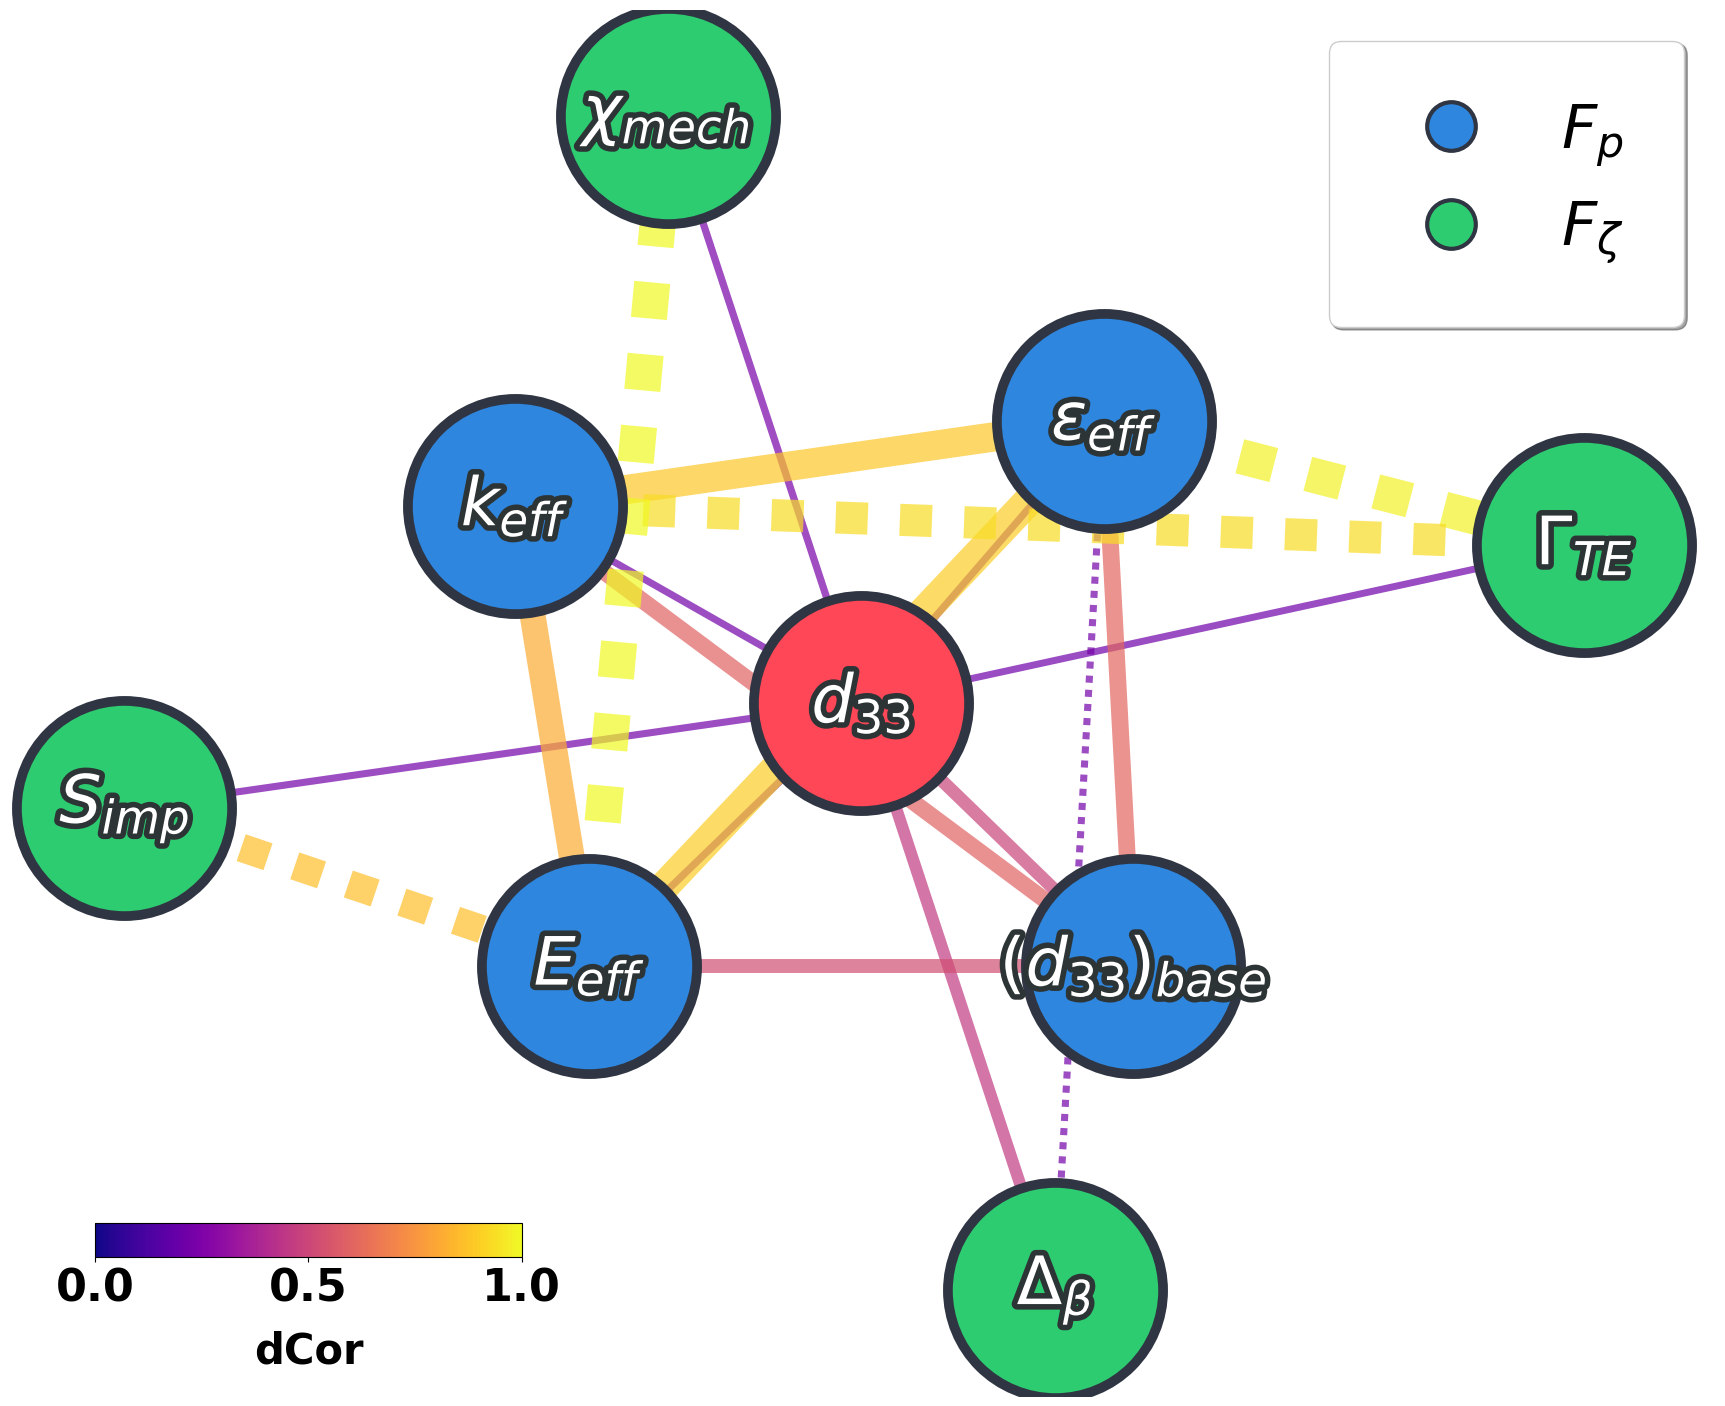

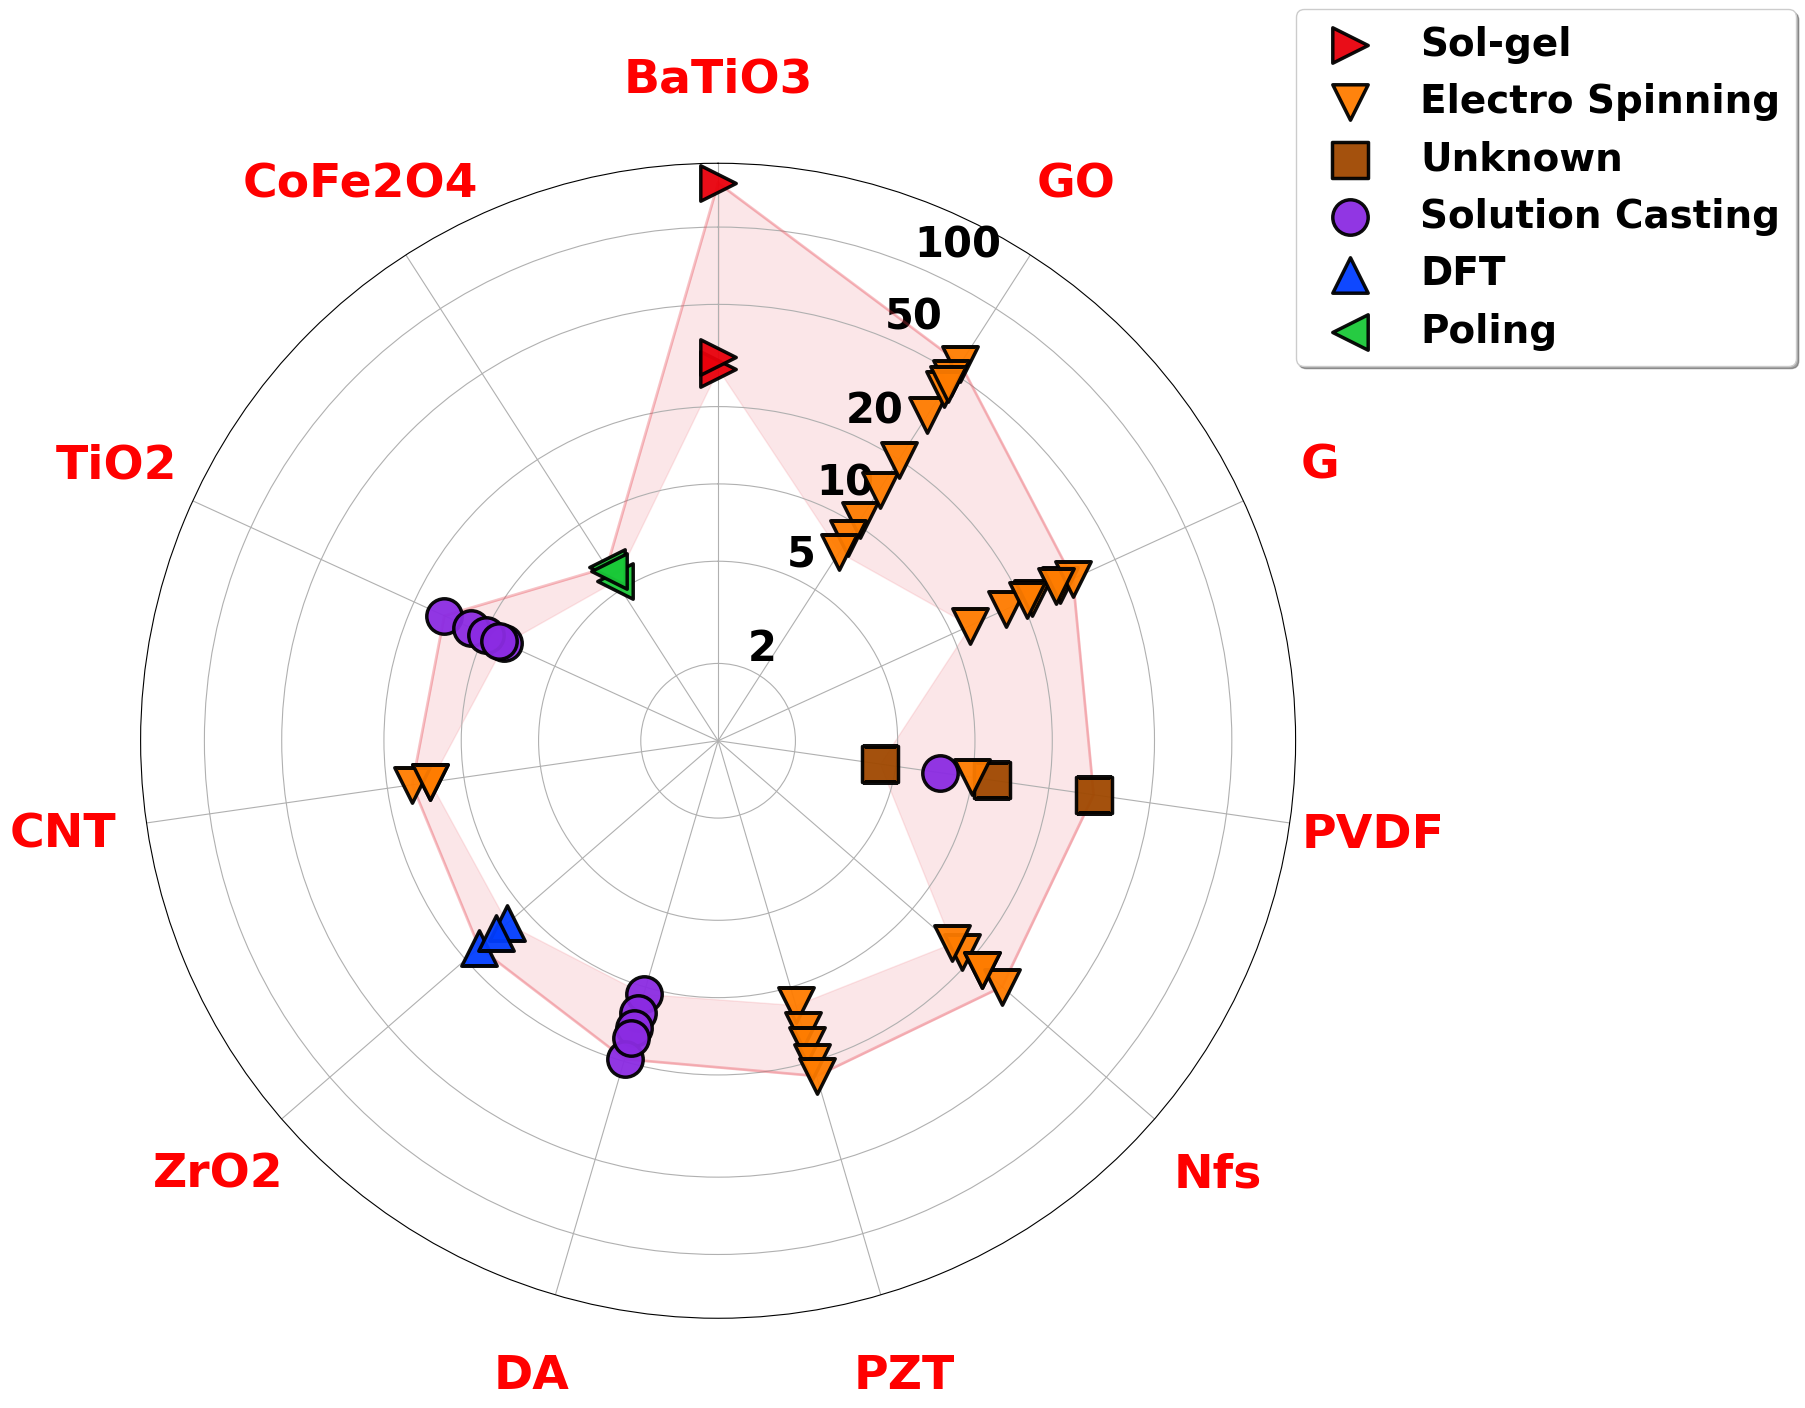

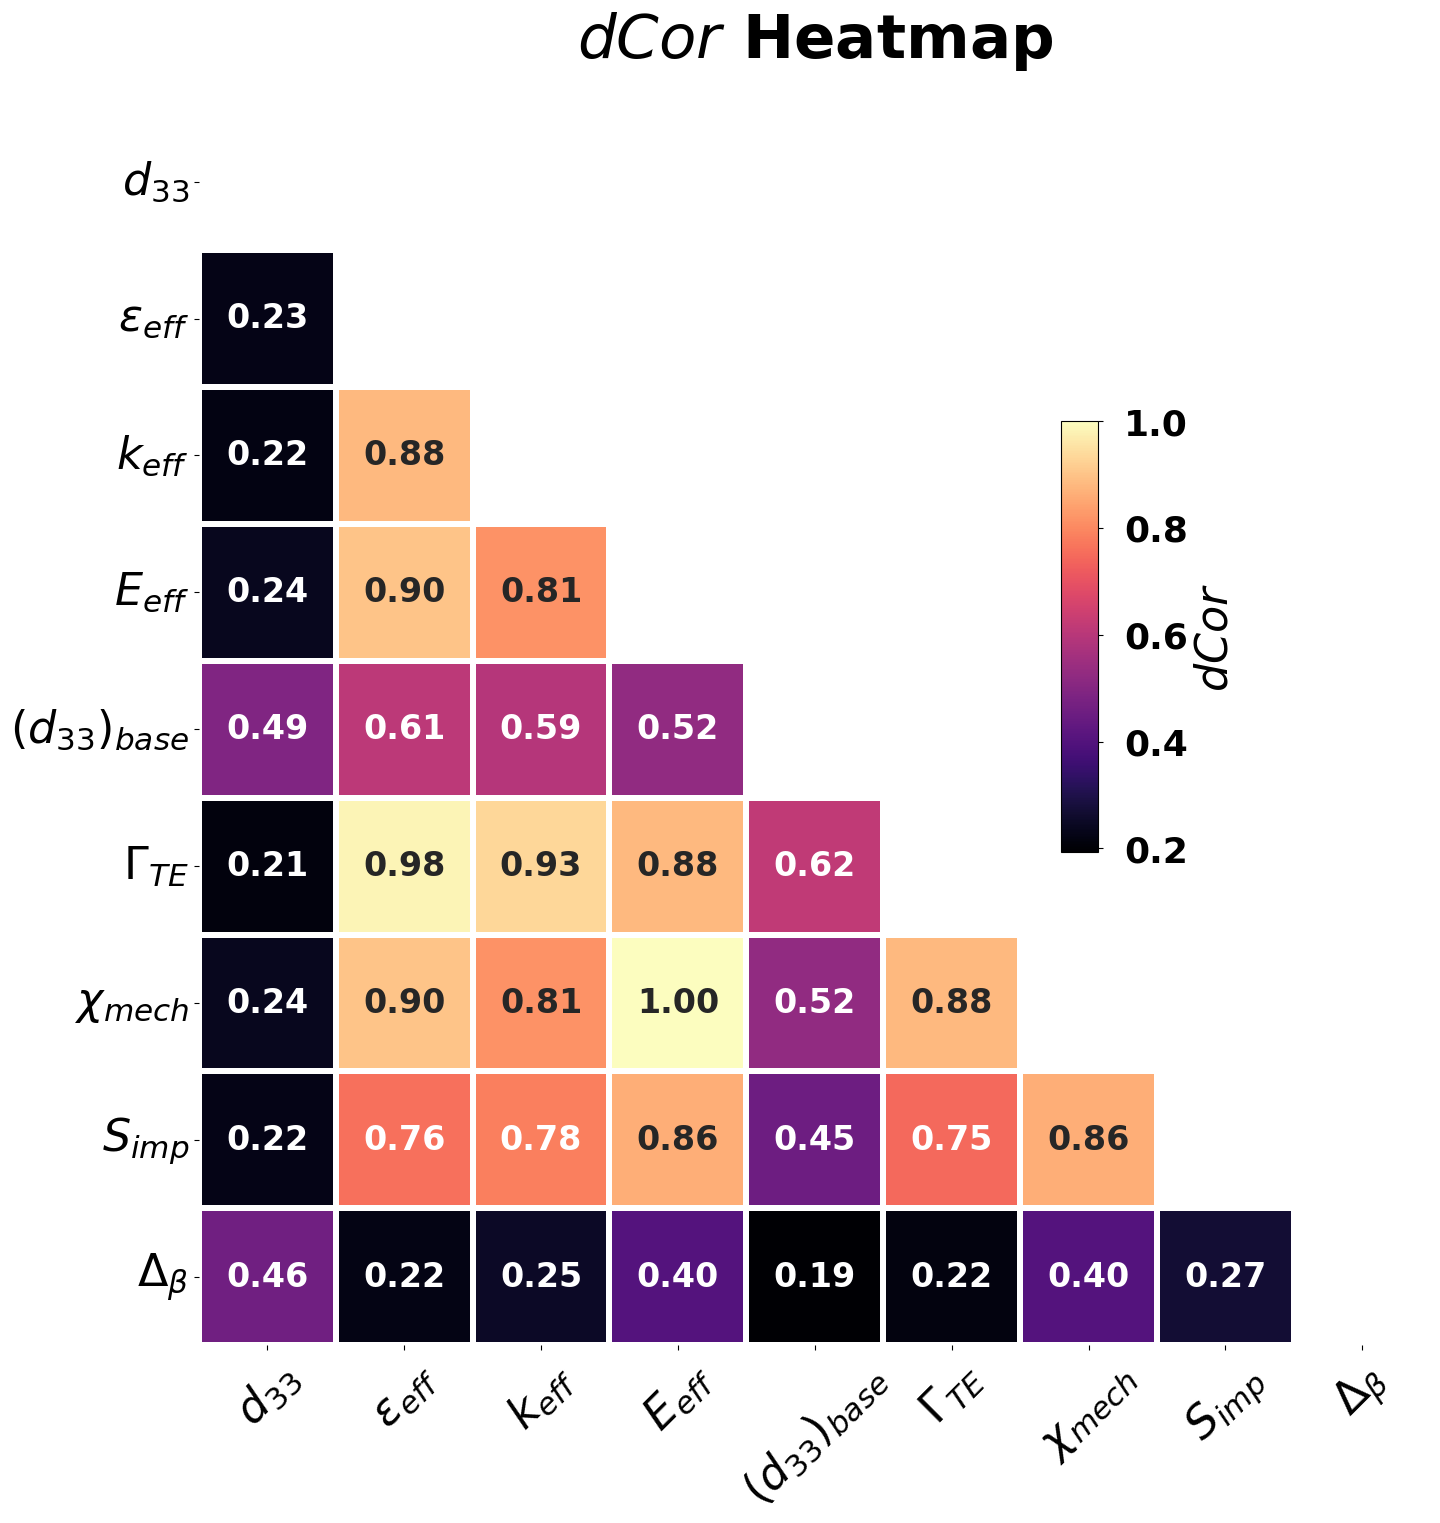

In [30]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import seaborn as sns
from scipy.spatial.distance import pdist, squareform
from matplotlib.lines import Line2D
import json

# --- 1. Load and Clean Data ---
with open('properties.json', 'r') as f:
    properties = json.load(f)
df_csv = pd.read_csv('dopants_composition.csv')

df_clean = df_csv.dropna(subset=['d33']).copy()
df_clean['Fabrication Method'] = df_clean['Fabrication Method'].fillna('Unknown')

# --- 2. Feature Engineering Logic ---
m = properties['PVDF']
engineered_data = []
for _, row in df_clean.iterrows():
    d_name = row['Dopants']
    
    # UNIFICATION: Treat 'PVDF' and NaN (Neat/Matrix) entries as a single 'PVDF' label
    if pd.isnull(d_name) or d_name == 'PVDF':
        label = 'PVDF'
        d_name_lookup = 'PVDF'
    else:
        label = d_name
        d_name_lookup = d_name
        
    phi = (row['Dopants fr'] if pd.notnull(row['Dopants fr']) else 0.0) / 100.0
    fab_method = row['Fabrication Method']
    p = properties.get(d_name_lookup, m)
    
    eps_m, eps_f = m['Dielectric Constant'], p['Dielectric Constant']
    k_m, k_f = m['Thermal Conductivity'], p['Thermal Conductivity']
    E_m, E_f = m['Youngs Modulus'], p['Youngs Modulus']
    d33_m, d33_f = m['Piezoelectric Coefficient (d33)'], p.get('Piezoelectric Coefficient (d33)', 0.0)
    
    eff_eps = eps_m * (1 + (3*phi*(eps_f-eps_m)) / (3*eps_m + (1-phi)*(eps_f-eps_m) + 1e-9))
    eff_k = k_m * (2*k_m + k_f + 2*phi*(k_f-k_m)) / (2*k_m + k_f - phi*(k_f-k_m) + 1e-9)
    aspect = 10 if label in ['CNT', 'GO', 'G', 'Nfs'] else 1
    eta = (E_f/E_m - 1) / (E_f/E_m + aspect + 1e-9)
    eff_E = E_m * (1 + aspect * eta * phi) / (1 - eta * phi + 1e-9)
    
    engineered_data.append({
        'Dopant': label, 'd33': row['d33'], 'Fabrication Method': fab_method,
        'Eff_Dielectric': eff_eps, 'Eff_Thermal': eff_k, 'Eff_Youngs': eff_E, 
        'Piezo_Base': (1-phi)*d33_m + ((3*eps_m)/(eps_f+2*eps_m))*phi*d33_f,
        'Gamma_TE': eff_k * eff_eps, 'Chi_Mech': eff_E / E_m, 
        'S_imp': phi * E_f, 'Delta_Beta': phi * (eps_f / eps_m)
    })

df_feat = pd.DataFrame(engineered_data)
cols = ['d33', 'Eff_Dielectric', 'Eff_Thermal', 'Eff_Youngs', 'Piezo_Base', 'Gamma_TE', 'Chi_Mech', 'S_imp', 'Delta_Beta']
label_map = {
    'Eff_Dielectric': r'$\varepsilon_{eff}$', 'Eff_Thermal': r'$k_{eff}$', 
    'Eff_Youngs': r'$E_{eff}$', 'Piezo_Base': r'$(d_{33})_{base}$', 
    'Gamma_TE': r'$\Gamma_{TE}$', 'Chi_Mech': r'$\chi_{mech}$', 
    'S_imp': r'$S_{imp}$', 'Delta_Beta': r'$\Delta_{\beta}$', 'd33': r'$d_{33}$'
}

def dist_corr(X, Y):
    X, Y = np.atleast_1d(X), np.atleast_1d(Y)
    n = X.shape[0]
    a, b = squareform(pdist(X[:, None] if X.ndim==1 else X)), squareform(pdist(Y[:, None] if Y.ndim==1 else Y))
    A, B = a - a.mean(axis=0)[None, :] - a.mean(axis=1)[:, None] + a.mean(), b - b.mean(axis=0)[None, :] - b.mean(axis=1)[:, None] + b.mean()
    denom = np.sqrt(np.sqrt((A**2).sum()/n**2)*np.sqrt((B**2).sum()/n**2))
    return np.sqrt((A * B).sum() / (n*n)) / (denom + 1e-9)

dcor_mat = pd.DataFrame([[dist_corr(df_feat[c1], df_feat[c2]) for c2 in cols] for c1 in cols], index=cols, columns=cols)

# --- 3. Network Diagram ---
target = 'd33'
primary = ['Eff_Dielectric', 'Eff_Thermal', 'Eff_Youngs', 'Piezo_Base']
secondary = ['Gamma_TE', 'Chi_Mech', 'S_imp', 'Delta_Beta']

pos = {target: np.array([0, 0])}

# Staggered angles for non-collinear layout
r1 = 6.5
angles_p = np.radians([55, 145, 230, 310])
for i, node in enumerate(primary):
    pos[node] = np.array([r1 * np.cos(angles_p[i]), r1 * np.sin(angles_p[i])])

r2 = 11.5
angles_s = np.radians([15, 105, 190, 285])
for i, node in enumerate(secondary):
    pos[node] = np.array([r2 * np.cos(angles_s[i]), r2 * np.sin(angles_s[i])])

fig, ax = plt.subplots(figsize=(22, 18), facecolor='white')
G = nx.Graph()
G.add_nodes_from(cols)

# Edges
edges = []
for node in cols: 
    if node != target: edges.append((target, node, 'solid'))
for i in range(len(primary)):
    for j in range(i+1, len(primary)): edges.append((primary[i], primary[j], 'solid'))
constituent_map = {'Eff_Dielectric': ['Gamma_TE', 'Delta_Beta'], 'Eff_Thermal': ['Gamma_TE'], 'Eff_Youngs': ['Chi_Mech', 'S_imp']}
for p, d_list in constituent_map.items():
    for d in d_list: edges.append((p, d, (0, (1, 1))))

edge_cmap = plt.cm.plasma
for u, v, style in edges:
    w = dcor_mat.loc[u, v]
    rad = 0.2 if u == target or v == target else 0.1
    nx.draw_networkx_edges(G, pos, edgelist=[(u,v)], width=4.0+22*(w**2), edge_color=[edge_cmap(w)], 
                           style=style, connectionstyle=f"arc3,rad={rad}", alpha=0.7, ax=ax)

# Node Colors
c_target = '#ff4757'
c_primary = '#2e86de'
c_secondary = '#2ecc71'

for node in cols:
    color = c_target if node == target else c_primary if node in primary else c_secondary
    nx.draw_networkx_nodes(G, pos, nodelist=[node], node_size=24000, node_color=color, edgecolors='#2f3542', linewidths=7, ax=ax)
    ax.text(pos[node][0], pos[node][1], label_map[node], fontsize=48, fontweight='bold', ha='center', va='center', color='white',
            path_effects=[pe.withStroke(linewidth=8, foreground='#2d3436')])

# Horizontal Colorbar at left bottom (y = 0.1 height of axis)
sm = plt.cm.ScalarMappable(cmap=edge_cmap, norm=plt.Normalize(vmin=0, vmax=1))
cax = ax.inset_axes([0.05, 0.1, 0.25, 0.025]) # [left, bottom, width, height]
cbar = plt.colorbar(sm, cax=cax, orientation='horizontal')
cbar.set_label('dCor', fontsize=30, fontweight='bold', labelpad=15)
cbar.ax.tick_params(labelsize=32)
for t in cbar.ax.get_xticklabels(): t.set_fontweight('bold')

# Node Legend (Primary F_p, Secondary F_zeta, Exclude Target)
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label=r'$F_p$',
           markerfacecolor=c_primary, markersize=35, markeredgewidth=3, markeredgecolor='#2f3542'),
    Line2D([0], [0], marker='o', color='w', label=r'$F_\zeta$',
           markerfacecolor=c_secondary, markersize=35, markeredgewidth=3, markeredgecolor='#2f3542')
]

font_props = {'size': 44, 'weight': 'bold'}
leg = ax.legend(handles=legend_elements, loc='upper right', prop=font_props, frameon=True, shadow=True, borderpad=1)
plt.setp(leg.get_texts(), fontweight='bold')

ax.axis('off')
fig.savefig('network_diagram.png', bbox_inches='tight', dpi=600)

# --- 4. Polar Plot (Unified PVDF Axis) ---
def plot_radial_v6(df, filename):
    summary = df.groupby('Dopant')['d33'].agg(['max', 'min']).sort_values('max', ascending=False)
    labels = summary.index.tolist()
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    angles_closed = angles + [angles[0]]
    
    log_max = np.log10(summary['max'].tolist() + [summary['max'].iloc[0]])
    log_min = np.log10(summary['min'].tolist() + [summary['min'].iloc[0]])

    fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(polar=True))
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    ax.fill_between(angles_closed, log_min, log_max, color='#e63946', alpha=0.12, zorder=1)
    ax.plot(angles_closed, log_max, color='#e63946', linewidth=2, alpha=0.3, zorder=2)

    methods = sorted(df['Fabrication Method'].unique())
    markers = ['^', 'v', '<', '>', 'o', 's', 'D', 'p', 'H', 'X']
    colors = sns.color_palette("bright", len(methods))
    method_map = {m: (markers[i % len(markers)], colors[i]) for i, m in enumerate(methods)}
    
    methods_plotted = set()
    for i, dopant in enumerate(labels):
        pts = df[df['Dopant'] == dopant]
        for _, row in pts.iterrows():
            m_type = row['Fabrication Method']
            marker, color = method_map[m_type]
            lbl = m_type if m_type not in methods_plotted else None
            ax.scatter(angles[i], np.log10(row['d33']), c=[color], s=650, marker=marker, 
                       alpha=0.95, edgecolors='black', linewidths=2.5, zorder=6, label=lbl)
            methods_plotted.add(m_type)

    ax.set_xticks(angles)
    ax.tick_params(axis='x', which='major', pad=50)
    xticklabels = ax.set_xticklabels(labels, fontsize=34, fontweight='bold', color='r')
    
    # for tl in xticklabels:
    #     if tl.get_text() == 'PVDF':
    #         tl.set_color('#1e3799')
    #         tl.set_fontsize(42)
    #         tl.set_bbox(dict(facecolor='#feca57', alpha=0.4, edgecolor='#1e3799', boxstyle='round,pad=1.0'))

    ticks = [2, 5, 10, 20, 50, 100]
    tick_locs = [np.log10(t) for t in ticks if t <= df['d33'].max()*1.5]
    ax.set_rticks(tick_locs)
    ax.set_yticklabels([str(t) for t in ticks if t <= df['d33'].max()*1.5], fontsize=30, fontweight='bold')
    
    handles, plot_labels = ax.get_legend_handles_labels()
    legend = plt.legend(handles, plot_labels, loc='upper right', bbox_to_anchor=(1.45, 1.15), fontsize=28, frameon=True, shadow=True)
    plt.setp(legend.get_texts(), fontweight='bold')
    
    # ax.set_title('Fabrication-Dependent $d_{33}$ Performance', y=1.1, fontsize=54, fontweight='bold')
    fig.savefig(filename, bbox_inches='tight', dpi=600)

plot_radial_v6(df_feat, 'radial_plot.png')

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- 5. Heatmap ---
fig, ax_hm = plt.subplots(figsize=(18, 16))
hm_data = dcor_mat.rename(columns=label_map, index=label_map)
mask = np.triu(np.ones_like(hm_data, dtype=bool))

# 1. Create the heatmap without the default colorbar
sns.heatmap(hm_data, mask=mask, annot=True, cmap='magma', fmt='.2f', square=True, 
            linewidths=4, annot_kws={"size": 24, "weight": "bold"},
            cbar=False, ax=ax_hm) # cbar=False is key here

# 2. Manually define the colorbar position
# [left, bottom, width, height] in terms of axis fraction.
# To move it 20% left, we adjust the 'left' parameter.
cax = ax_hm.inset_axes([0.70, 0.4, 0.03, 0.35]) 

# 3. Create the colorbar in the manual axes
sm = plt.cm.ScalarMappable(cmap='magma', norm=plt.Normalize(vmin=hm_data.min().min(), vmax=hm_data.max().max()))
cbar = fig.colorbar(sm, cax=cax)

# Style the colorbar
cbar.ax.tick_params(labelsize=26, pad=15)
for t in cbar.ax.get_yticklabels(): t.set_fontweight('bold')
cbar.set_label(r'$dCor$', fontsize=32, fontweight='bold')

# Style the heatmap ticks
ax_hm.set_xticklabels(ax_hm.get_xticklabels(), rotation=45, fontsize=32, fontweight='bold')
ax_hm.set_yticklabels(ax_hm.get_yticklabels(), rotation=0, fontsize=32, fontweight='bold')

plt.title(r"$dCor$ Heatmap", fontsize=44, fontweight='bold', pad=40)
plt.savefig('heatmap.png', bbox_inches='tight', dpi=600)